In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader


In [228]:
X = pd.read_pickle('../data/match_features.pkl')
X = X.replace('-', np.nan)
y = pd.read_pickle('../data/match_results.pkl')

X = X.fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# X = np.nan_to_num(X)

train_test_split = int(len(X)*0.75)

X_train = X[:train_test_split]
X_test = X[train_test_split:]

y_train = y.iloc[:train_test_split]
y_test = y.iloc[train_test_split:]


### Random Forest 

In [229]:
clf = RandomForestClassifier(random_state=0, n_estimators=1000)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=0)

In [230]:
y_pred_prob = clf.predict_proba(X_test)


In [231]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:, 1])


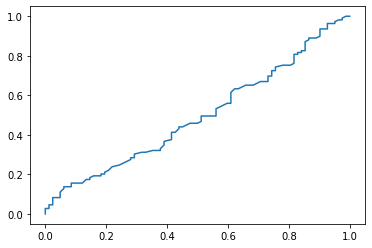

In [232]:

plt.plot(fpr, tpr)



### Simple NN

In [233]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.squeeze(torch.from_numpy(y_train.values.astype('float')).float())

X_test = torch.from_numpy(X_test).float()
y_test = torch.squeeze(torch.from_numpy(y_test.values.astype('float')).float())




In [234]:
# batch_size, epoch and iteration
batch_size = 32

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(X_train,y_train)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)


# Pytorch train and test sets
test = torch.utils.data.TensorDataset(X_test,y_test)

# data loader
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)


In [235]:
class Net(nn.Module):
    
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, 1)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc2(x))

net = Net(X_train.shape[1])


In [236]:
criterion = nn.BCELoss()


In [237]:
optimizer = optim.Adam(net.parameters(), lr=0.000001)


In [241]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

for epoch in range(10000):
    
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data


        y_pred = net(inputs)
        y_pred = torch.squeeze(y_pred)

        train_loss = criterion(y_pred, labels)

        if i % 10 == 0:
            train_acc = calculate_accuracy(labels, y_pred)

            Xt, yt = list(test_loader)[0]
            
            y_test_pred = net(Xt)
            y_test_pred = torch.squeeze(y_test_pred)
            test_loss = criterion(y_test_pred, yt)

            test_acc = calculate_accuracy(yt, y_test_pred)
            print(
            f'''epoch {epoch}
            Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
            Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
            ''')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
    

epoch 0
            Train set - loss: 0.612, accuracy: 0.75
            Test  set - loss: 0.699, accuracy: 0.562
            
epoch 0
            Train set - loss: 0.659, accuracy: 0.625
            Test  set - loss: 0.723, accuracy: 0.562
            
epoch 1
            Train set - loss: 0.701, accuracy: 0.469
            Test  set - loss: 0.651, accuracy: 0.656
            
epoch 1
            Train set - loss: 0.624, accuracy: 0.719
            Test  set - loss: 0.663, accuracy: 0.625
            
epoch 2
            Train set - loss: 0.733, accuracy: 0.469
            Test  set - loss: 0.65, accuracy: 0.688
            
epoch 2
            Train set - loss: 0.65, accuracy: 0.656
            Test  set - loss: 0.61, accuracy: 0.719
            
epoch 3
            Train set - loss: 0.675, accuracy: 0.531
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 3
            Train set - loss: 0.724, accuracy: 0.438
            Test  set - loss: 0.692, accuracy: 0.531
   

epoch 40
            Train set - loss: 0.617, accuracy: 0.688
            Test  set - loss: 0.731, accuracy: 0.594
            
epoch 41
            Train set - loss: 0.749, accuracy: 0.469
            Test  set - loss: 0.724, accuracy: 0.531
            
epoch 41
            Train set - loss: 0.669, accuracy: 0.531
            Test  set - loss: 0.732, accuracy: 0.5
            
epoch 42
            Train set - loss: 0.703, accuracy: 0.594
            Test  set - loss: 0.663, accuracy: 0.656
            
epoch 42
            Train set - loss: 0.676, accuracy: 0.625
            Test  set - loss: 0.643, accuracy: 0.688
            
epoch 43
            Train set - loss: 0.74, accuracy: 0.406
            Test  set - loss: 0.798, accuracy: 0.375
            
epoch 43
            Train set - loss: 0.662, accuracy: 0.562
            Test  set - loss: 0.685, accuracy: 0.594
            
epoch 44
            Train set - loss: 0.661, accuracy: 0.656
            Test  set - loss: 0.646, accuracy

epoch 74
            Train set - loss: 0.704, accuracy: 0.5
            Test  set - loss: 0.735, accuracy: 0.562
            
epoch 75
            Train set - loss: 0.8, accuracy: 0.344
            Test  set - loss: 0.715, accuracy: 0.469
            
epoch 75
            Train set - loss: 0.7, accuracy: 0.469
            Test  set - loss: 0.714, accuracy: 0.531
            
epoch 76
            Train set - loss: 0.714, accuracy: 0.531
            Test  set - loss: 0.682, accuracy: 0.594
            
epoch 76
            Train set - loss: 0.659, accuracy: 0.562
            Test  set - loss: 0.708, accuracy: 0.562
            
epoch 77
            Train set - loss: 0.702, accuracy: 0.438
            Test  set - loss: 0.657, accuracy: 0.656
            
epoch 77
            Train set - loss: 0.665, accuracy: 0.719
            Test  set - loss: 0.669, accuracy: 0.625
            
epoch 78
            Train set - loss: 0.67, accuracy: 0.562
            Test  set - loss: 0.635, accuracy: 0.

epoch 116
            Train set - loss: 0.636, accuracy: 0.656
            Test  set - loss: 0.698, accuracy: 0.531
            
epoch 117
            Train set - loss: 0.638, accuracy: 0.656
            Test  set - loss: 0.714, accuracy: 0.5
            
epoch 117
            Train set - loss: 0.674, accuracy: 0.656
            Test  set - loss: 0.704, accuracy: 0.531
            
epoch 118
            Train set - loss: 0.692, accuracy: 0.531
            Test  set - loss: 0.706, accuracy: 0.562
            
epoch 118
            Train set - loss: 0.616, accuracy: 0.719
            Test  set - loss: 0.63, accuracy: 0.688
            
epoch 119
            Train set - loss: 0.739, accuracy: 0.438
            Test  set - loss: 0.729, accuracy: 0.531
            
epoch 119
            Train set - loss: 0.696, accuracy: 0.625
            Test  set - loss: 0.713, accuracy: 0.562
            
epoch 120
            Train set - loss: 0.627, accuracy: 0.688
            Test  set - loss: 0.666, 

epoch 150
            Train set - loss: 0.717, accuracy: 0.5
            Test  set - loss: 0.729, accuracy: 0.531
            
epoch 151
            Train set - loss: 0.723, accuracy: 0.5
            Test  set - loss: 0.708, accuracy: 0.531
            
epoch 151
            Train set - loss: 0.718, accuracy: 0.562
            Test  set - loss: 0.74, accuracy: 0.469
            
epoch 152
            Train set - loss: 0.65, accuracy: 0.562
            Test  set - loss: 0.712, accuracy: 0.562
            
epoch 152
            Train set - loss: 0.672, accuracy: 0.625
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 153
            Train set - loss: 0.731, accuracy: 0.469
            Test  set - loss: 0.661, accuracy: 0.625
            
epoch 153
            Train set - loss: 0.663, accuracy: 0.625
            Test  set - loss: 0.64, accuracy: 0.656
            
epoch 154
            Train set - loss: 0.69, accuracy: 0.594
            Test  set - loss: 0.714, accur

epoch 184
            Train set - loss: 0.681, accuracy: 0.594
            Test  set - loss: 0.703, accuracy: 0.625
            
epoch 185
            Train set - loss: 0.7, accuracy: 0.594
            Test  set - loss: 0.676, accuracy: 0.562
            
epoch 185
            Train set - loss: 0.704, accuracy: 0.5
            Test  set - loss: 0.654, accuracy: 0.688
            
epoch 186
            Train set - loss: 0.664, accuracy: 0.625
            Test  set - loss: 0.683, accuracy: 0.625
            
epoch 186
            Train set - loss: 0.699, accuracy: 0.562
            Test  set - loss: 0.622, accuracy: 0.688
            
epoch 187
            Train set - loss: 0.682, accuracy: 0.625
            Test  set - loss: 0.777, accuracy: 0.469
            
epoch 187
            Train set - loss: 0.761, accuracy: 0.406
            Test  set - loss: 0.734, accuracy: 0.531
            
epoch 188
            Train set - loss: 0.67, accuracy: 0.656
            Test  set - loss: 0.74, acc

epoch 219
            Train set - loss: 0.629, accuracy: 0.719
            Test  set - loss: 0.678, accuracy: 0.656
            
epoch 219
            Train set - loss: 0.678, accuracy: 0.562
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 220
            Train set - loss: 0.728, accuracy: 0.406
            Test  set - loss: 0.697, accuracy: 0.531
            
epoch 220
            Train set - loss: 0.743, accuracy: 0.438
            Test  set - loss: 0.71, accuracy: 0.562
            
epoch 221
            Train set - loss: 0.659, accuracy: 0.625
            Test  set - loss: 0.694, accuracy: 0.688
            
epoch 221
            Train set - loss: 0.686, accuracy: 0.562
            Test  set - loss: 0.647, accuracy: 0.656
            
epoch 222
            Train set - loss: 0.738, accuracy: 0.5
            Test  set - loss: 0.651, accuracy: 0.594
            
epoch 222
            Train set - loss: 0.702, accuracy: 0.469
            Test  set - loss: 0.7, ac

epoch 253
            Train set - loss: 0.717, accuracy: 0.469
            Test  set - loss: 0.655, accuracy: 0.688
            
epoch 253
            Train set - loss: 0.72, accuracy: 0.469
            Test  set - loss: 0.652, accuracy: 0.594
            
epoch 254
            Train set - loss: 0.662, accuracy: 0.688
            Test  set - loss: 0.647, accuracy: 0.688
            
epoch 254
            Train set - loss: 0.732, accuracy: 0.5
            Test  set - loss: 0.748, accuracy: 0.469
            
epoch 255
            Train set - loss: 0.656, accuracy: 0.625
            Test  set - loss: 0.674, accuracy: 0.594
            
epoch 255
            Train set - loss: 0.661, accuracy: 0.594
            Test  set - loss: 0.676, accuracy: 0.594
            
epoch 256
            Train set - loss: 0.694, accuracy: 0.594
            Test  set - loss: 0.627, accuracy: 0.656
            
epoch 256
            Train set - loss: 0.68, accuracy: 0.531
            Test  set - loss: 0.682, a

epoch 287
            Train set - loss: 0.704, accuracy: 0.469
            Test  set - loss: 0.701, accuracy: 0.562
            
epoch 288
            Train set - loss: 0.645, accuracy: 0.625
            Test  set - loss: 0.674, accuracy: 0.562
            
epoch 288
            Train set - loss: 0.634, accuracy: 0.688
            Test  set - loss: 0.672, accuracy: 0.594
            
epoch 289
            Train set - loss: 0.73, accuracy: 0.438
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 289
            Train set - loss: 0.661, accuracy: 0.656
            Test  set - loss: 0.712, accuracy: 0.562
            
epoch 290
            Train set - loss: 0.681, accuracy: 0.5
            Test  set - loss: 0.67, accuracy: 0.562
            
epoch 290
            Train set - loss: 0.724, accuracy: 0.5
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 291
            Train set - loss: 0.67, accuracy: 0.562
            Test  set - loss: 0.622, accu

epoch 320
            Train set - loss: 0.697, accuracy: 0.562
            Test  set - loss: 0.744, accuracy: 0.5
            
epoch 321
            Train set - loss: 0.688, accuracy: 0.5
            Test  set - loss: 0.655, accuracy: 0.656
            
epoch 321
            Train set - loss: 0.679, accuracy: 0.531
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 322
            Train set - loss: 0.692, accuracy: 0.625
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 322
            Train set - loss: 0.738, accuracy: 0.5
            Test  set - loss: 0.684, accuracy: 0.562
            
epoch 323
            Train set - loss: 0.72, accuracy: 0.5
            Test  set - loss: 0.71, accuracy: 0.469
            
epoch 323
            Train set - loss: 0.737, accuracy: 0.469
            Test  set - loss: 0.638, accuracy: 0.656
            
epoch 324
            Train set - loss: 0.654, accuracy: 0.656
            Test  set - loss: 0.744, accurac

epoch 354
            Train set - loss: 0.762, accuracy: 0.438
            Test  set - loss: 0.683, accuracy: 0.531
            
epoch 355
            Train set - loss: 0.715, accuracy: 0.531
            Test  set - loss: 0.643, accuracy: 0.688
            
epoch 355
            Train set - loss: 0.759, accuracy: 0.469
            Test  set - loss: 0.664, accuracy: 0.625
            
epoch 356
            Train set - loss: 0.69, accuracy: 0.562
            Test  set - loss: 0.723, accuracy: 0.531
            
epoch 356
            Train set - loss: 0.646, accuracy: 0.656
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 357
            Train set - loss: 0.687, accuracy: 0.5
            Test  set - loss: 0.667, accuracy: 0.656
            
epoch 357
            Train set - loss: 0.692, accuracy: 0.594
            Test  set - loss: 0.719, accuracy: 0.469
            
epoch 358
            Train set - loss: 0.678, accuracy: 0.594
            Test  set - loss: 0.727, 

epoch 389
            Train set - loss: 0.664, accuracy: 0.5
            Test  set - loss: 0.754, accuracy: 0.5
            
epoch 389
            Train set - loss: 0.693, accuracy: 0.469
            Test  set - loss: 0.738, accuracy: 0.469
            
epoch 390
            Train set - loss: 0.701, accuracy: 0.562
            Test  set - loss: 0.671, accuracy: 0.656
            
epoch 390
            Train set - loss: 0.617, accuracy: 0.625
            Test  set - loss: 0.639, accuracy: 0.656
            
epoch 391
            Train set - loss: 0.615, accuracy: 0.719
            Test  set - loss: 0.766, accuracy: 0.469
            
epoch 391
            Train set - loss: 0.756, accuracy: 0.375
            Test  set - loss: 0.682, accuracy: 0.438
            
epoch 392
            Train set - loss: 0.757, accuracy: 0.406
            Test  set - loss: 0.811, accuracy: 0.312
            
epoch 392
            Train set - loss: 0.823, accuracy: 0.281
            Test  set - loss: 0.694, a

epoch 423
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.682, accuracy: 0.625
            
epoch 424
            Train set - loss: 0.733, accuracy: 0.469
            Test  set - loss: 0.652, accuracy: 0.625
            
epoch 424
            Train set - loss: 0.687, accuracy: 0.562
            Test  set - loss: 0.695, accuracy: 0.531
            
epoch 425
            Train set - loss: 0.629, accuracy: 0.656
            Test  set - loss: 0.678, accuracy: 0.625
            
epoch 425
            Train set - loss: 0.693, accuracy: 0.5
            Test  set - loss: 0.704, accuracy: 0.562
            
epoch 426
            Train set - loss: 0.65, accuracy: 0.562
            Test  set - loss: 0.692, accuracy: 0.562
            
epoch 426
            Train set - loss: 0.649, accuracy: 0.656
            Test  set - loss: 0.685, accuracy: 0.625
            
epoch 427
            Train set - loss: 0.672, accuracy: 0.594
            Test  set - loss: 0.626, a

epoch 457
            Train set - loss: 0.696, accuracy: 0.625
            Test  set - loss: 0.769, accuracy: 0.469
            
epoch 458
            Train set - loss: 0.65, accuracy: 0.531
            Test  set - loss: 0.633, accuracy: 0.656
            
epoch 458
            Train set - loss: 0.606, accuracy: 0.75
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 459
            Train set - loss: 0.673, accuracy: 0.656
            Test  set - loss: 0.684, accuracy: 0.625
            
epoch 459
            Train set - loss: 0.648, accuracy: 0.625
            Test  set - loss: 0.767, accuracy: 0.562
            
epoch 460
            Train set - loss: 0.695, accuracy: 0.531
            Test  set - loss: 0.631, accuracy: 0.688
            
epoch 460
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.624, accuracy: 0.719
            
epoch 461
            Train set - loss: 0.749, accuracy: 0.375
            Test  set - loss: 0.699, 

epoch 491
            Train set - loss: 0.663, accuracy: 0.594
            Test  set - loss: 0.68, accuracy: 0.656
            
epoch 492
            Train set - loss: 0.628, accuracy: 0.719
            Test  set - loss: 0.707, accuracy: 0.562
            
epoch 492
            Train set - loss: 0.623, accuracy: 0.625
            Test  set - loss: 0.676, accuracy: 0.562
            
epoch 493
            Train set - loss: 0.631, accuracy: 0.656
            Test  set - loss: 0.66, accuracy: 0.625
            
epoch 493
            Train set - loss: 0.688, accuracy: 0.531
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 494
            Train set - loss: 0.676, accuracy: 0.625
            Test  set - loss: 0.672, accuracy: 0.656
            
epoch 494
            Train set - loss: 0.66, accuracy: 0.656
            Test  set - loss: 0.716, accuracy: 0.5
            
epoch 495
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.689, ac

epoch 525
            Train set - loss: 0.671, accuracy: 0.594
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 526
            Train set - loss: 0.694, accuracy: 0.562
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 526
            Train set - loss: 0.694, accuracy: 0.469
            Test  set - loss: 0.71, accuracy: 0.531
            
epoch 527
            Train set - loss: 0.692, accuracy: 0.625
            Test  set - loss: 0.639, accuracy: 0.688
            
epoch 527
            Train set - loss: 0.741, accuracy: 0.5
            Test  set - loss: 0.671, accuracy: 0.656
            
epoch 528
            Train set - loss: 0.661, accuracy: 0.594
            Test  set - loss: 0.735, accuracy: 0.531
            
epoch 528
            Train set - loss: 0.723, accuracy: 0.469
            Test  set - loss: 0.643, accuracy: 0.688
            
epoch 529
            Train set - loss: 0.63, accuracy: 0.625
            Test  set - loss: 0.711, ac

epoch 560
            Train set - loss: 0.643, accuracy: 0.625
            Test  set - loss: 0.697, accuracy: 0.625
            
epoch 560
            Train set - loss: 0.688, accuracy: 0.656
            Test  set - loss: 0.688, accuracy: 0.594
            
epoch 561
            Train set - loss: 0.742, accuracy: 0.5
            Test  set - loss: 0.678, accuracy: 0.562
            
epoch 561
            Train set - loss: 0.74, accuracy: 0.438
            Test  set - loss: 0.726, accuracy: 0.469
            
epoch 562
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss: 0.62, accuracy: 0.688
            
epoch 562
            Train set - loss: 0.646, accuracy: 0.625
            Test  set - loss: 0.699, accuracy: 0.531
            
epoch 563
            Train set - loss: 0.706, accuracy: 0.531
            Test  set - loss: 0.747, accuracy: 0.5
            
epoch 563
            Train set - loss: 0.662, accuracy: 0.656
            Test  set - loss: 0.677, acc

epoch 594
            Train set - loss: 0.706, accuracy: 0.5
            Test  set - loss: 0.712, accuracy: 0.625
            
epoch 594
            Train set - loss: 0.748, accuracy: 0.438
            Test  set - loss: 0.677, accuracy: 0.625
            
epoch 595
            Train set - loss: 0.696, accuracy: 0.562
            Test  set - loss: 0.645, accuracy: 0.719
            
epoch 595
            Train set - loss: 0.658, accuracy: 0.625
            Test  set - loss: 0.712, accuracy: 0.562
            
epoch 596
            Train set - loss: 0.641, accuracy: 0.625
            Test  set - loss: 0.7, accuracy: 0.594
            
epoch 596
            Train set - loss: 0.655, accuracy: 0.656
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 597
            Train set - loss: 0.734, accuracy: 0.5
            Test  set - loss: 0.723, accuracy: 0.562
            
epoch 597
            Train set - loss: 0.632, accuracy: 0.625
            Test  set - loss: 0.714, acc

epoch 628
            Train set - loss: 0.644, accuracy: 0.656
            Test  set - loss: 0.774, accuracy: 0.469
            
epoch 628
            Train set - loss: 0.641, accuracy: 0.625
            Test  set - loss: 0.65, accuracy: 0.656
            
epoch 629
            Train set - loss: 0.677, accuracy: 0.531
            Test  set - loss: 0.71, accuracy: 0.5
            
epoch 629
            Train set - loss: 0.722, accuracy: 0.438
            Test  set - loss: 0.641, accuracy: 0.688
            
epoch 630
            Train set - loss: 0.645, accuracy: 0.594
            Test  set - loss: 0.646, accuracy: 0.688
            
epoch 630
            Train set - loss: 0.605, accuracy: 0.781
            Test  set - loss: 0.702, accuracy: 0.625
            
epoch 631
            Train set - loss: 0.696, accuracy: 0.531
            Test  set - loss: 0.694, accuracy: 0.594
            
epoch 631
            Train set - loss: 0.636, accuracy: 0.688
            Test  set - loss: 0.722, a

epoch 662
            Train set - loss: 0.646, accuracy: 0.656
            Test  set - loss: 0.695, accuracy: 0.625
            
epoch 663
            Train set - loss: 0.665, accuracy: 0.562
            Test  set - loss: 0.664, accuracy: 0.594
            
epoch 663
            Train set - loss: 0.734, accuracy: 0.531
            Test  set - loss: 0.715, accuracy: 0.469
            
epoch 664
            Train set - loss: 0.59, accuracy: 0.812
            Test  set - loss: 0.717, accuracy: 0.562
            
epoch 664
            Train set - loss: 0.69, accuracy: 0.594
            Test  set - loss: 0.712, accuracy: 0.5
            
epoch 665
            Train set - loss: 0.685, accuracy: 0.625
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 665
            Train set - loss: 0.714, accuracy: 0.469
            Test  set - loss: 0.716, accuracy: 0.531
            
epoch 666
            Train set - loss: 0.65, accuracy: 0.625
            Test  set - loss: 0.742, ac

epoch 699
            Train set - loss: 0.694, accuracy: 0.562
            Test  set - loss: 0.648, accuracy: 0.656
            
epoch 699
            Train set - loss: 0.665, accuracy: 0.562
            Test  set - loss: 0.658, accuracy: 0.656
            
epoch 700
            Train set - loss: 0.745, accuracy: 0.375
            Test  set - loss: 0.769, accuracy: 0.469
            
epoch 700
            Train set - loss: 0.609, accuracy: 0.781
            Test  set - loss: 0.726, accuracy: 0.5
            
epoch 701
            Train set - loss: 0.7, accuracy: 0.5
            Test  set - loss: 0.689, accuracy: 0.625
            
epoch 701
            Train set - loss: 0.638, accuracy: 0.688
            Test  set - loss: 0.738, accuracy: 0.438
            
epoch 702
            Train set - loss: 0.633, accuracy: 0.812
            Test  set - loss: 0.7, accuracy: 0.562
            
epoch 702
            Train set - loss: 0.715, accuracy: 0.5
            Test  set - loss: 0.69, accuracy

epoch 733
            Train set - loss: 0.69, accuracy: 0.562
            Test  set - loss: 0.721, accuracy: 0.531
            
epoch 734
            Train set - loss: 0.634, accuracy: 0.656
            Test  set - loss: 0.688, accuracy: 0.594
            
epoch 734
            Train set - loss: 0.649, accuracy: 0.562
            Test  set - loss: 0.72, accuracy: 0.531
            
epoch 735
            Train set - loss: 0.644, accuracy: 0.625
            Test  set - loss: 0.648, accuracy: 0.656
            
epoch 735
            Train set - loss: 0.656, accuracy: 0.594
            Test  set - loss: 0.724, accuracy: 0.625
            
epoch 736
            Train set - loss: 0.657, accuracy: 0.562
            Test  set - loss: 0.719, accuracy: 0.5
            
epoch 736
            Train set - loss: 0.687, accuracy: 0.469
            Test  set - loss: 0.655, accuracy: 0.625
            
epoch 737
            Train set - loss: 0.616, accuracy: 0.625
            Test  set - loss: 0.635, a

epoch 770
            Train set - loss: 0.656, accuracy: 0.625
            Test  set - loss: 0.666, accuracy: 0.594
            
epoch 770
            Train set - loss: 0.732, accuracy: 0.438
            Test  set - loss: 0.706, accuracy: 0.562
            
epoch 771
            Train set - loss: 0.628, accuracy: 0.594
            Test  set - loss: 0.719, accuracy: 0.562
            
epoch 771
            Train set - loss: 0.661, accuracy: 0.594
            Test  set - loss: 0.649, accuracy: 0.656
            
epoch 772
            Train set - loss: 0.644, accuracy: 0.562
            Test  set - loss: 0.686, accuracy: 0.656
            
epoch 772
            Train set - loss: 0.713, accuracy: 0.469
            Test  set - loss: 0.61, accuracy: 0.688
            
epoch 773
            Train set - loss: 0.649, accuracy: 0.594
            Test  set - loss: 0.734, accuracy: 0.469
            
epoch 773
            Train set - loss: 0.71, accuracy: 0.531
            Test  set - loss: 0.685,

epoch 802
            Train set - loss: 0.655, accuracy: 0.594
            Test  set - loss: 0.712, accuracy: 0.5
            
epoch 802
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.692, accuracy: 0.594
            
epoch 803
            Train set - loss: 0.687, accuracy: 0.531
            Test  set - loss: 0.659, accuracy: 0.625
            
epoch 803
            Train set - loss: 0.721, accuracy: 0.5
            Test  set - loss: 0.68, accuracy: 0.625
            
epoch 804
            Train set - loss: 0.709, accuracy: 0.531
            Test  set - loss: 0.669, accuracy: 0.594
            
epoch 804
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.694, accuracy: 0.5
            
epoch 805
            Train set - loss: 0.704, accuracy: 0.562
            Test  set - loss: 0.656, accuracy: 0.625
            
epoch 805
            Train set - loss: 0.671, accuracy: 0.594
            Test  set - loss: 0.673, accu

epoch 836
            Train set - loss: 0.677, accuracy: 0.562
            Test  set - loss: 0.717, accuracy: 0.5
            
epoch 837
            Train set - loss: 0.735, accuracy: 0.438
            Test  set - loss: 0.699, accuracy: 0.594
            
epoch 837
            Train set - loss: 0.643, accuracy: 0.625
            Test  set - loss: 0.658, accuracy: 0.719
            
epoch 838
            Train set - loss: 0.668, accuracy: 0.594
            Test  set - loss: 0.761, accuracy: 0.406
            
epoch 838
            Train set - loss: 0.704, accuracy: 0.562
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 839
            Train set - loss: 0.724, accuracy: 0.5
            Test  set - loss: 0.703, accuracy: 0.531
            
epoch 839
            Train set - loss: 0.698, accuracy: 0.531
            Test  set - loss: 0.785, accuracy: 0.469
            
epoch 840
            Train set - loss: 0.668, accuracy: 0.531
            Test  set - loss: 0.657, a

epoch 869
            Train set - loss: 0.618, accuracy: 0.688
            Test  set - loss: 0.668, accuracy: 0.688
            
epoch 869
            Train set - loss: 0.678, accuracy: 0.562
            Test  set - loss: 0.696, accuracy: 0.594
            
epoch 870
            Train set - loss: 0.69, accuracy: 0.562
            Test  set - loss: 0.748, accuracy: 0.438
            
epoch 870
            Train set - loss: 0.675, accuracy: 0.5
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 871
            Train set - loss: 0.606, accuracy: 0.719
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 871
            Train set - loss: 0.663, accuracy: 0.656
            Test  set - loss: 0.641, accuracy: 0.594
            
epoch 872
            Train set - loss: 0.636, accuracy: 0.688
            Test  set - loss: 0.721, accuracy: 0.5
            
epoch 872
            Train set - loss: 0.678, accuracy: 0.531
            Test  set - loss: 0.692, acc

epoch 903
            Train set - loss: 0.653, accuracy: 0.562
            Test  set - loss: 0.728, accuracy: 0.5
            
epoch 904
            Train set - loss: 0.697, accuracy: 0.531
            Test  set - loss: 0.689, accuracy: 0.625
            
epoch 904
            Train set - loss: 0.712, accuracy: 0.531
            Test  set - loss: 0.719, accuracy: 0.531
            
epoch 905
            Train set - loss: 0.678, accuracy: 0.531
            Test  set - loss: 0.657, accuracy: 0.656
            
epoch 905
            Train set - loss: 0.709, accuracy: 0.531
            Test  set - loss: 0.714, accuracy: 0.469
            
epoch 906
            Train set - loss: 0.655, accuracy: 0.594
            Test  set - loss: 0.689, accuracy: 0.562
            
epoch 906
            Train set - loss: 0.715, accuracy: 0.469
            Test  set - loss: 0.65, accuracy: 0.688
            
epoch 907
            Train set - loss: 0.595, accuracy: 0.781
            Test  set - loss: 0.665, 

epoch 937
            Train set - loss: 0.679, accuracy: 0.531
            Test  set - loss: 0.707, accuracy: 0.594
            
epoch 938
            Train set - loss: 0.588, accuracy: 0.812
            Test  set - loss: 0.617, accuracy: 0.688
            
epoch 938
            Train set - loss: 0.706, accuracy: 0.438
            Test  set - loss: 0.744, accuracy: 0.469
            
epoch 939
            Train set - loss: 0.684, accuracy: 0.562
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 939
            Train set - loss: 0.734, accuracy: 0.5
            Test  set - loss: 0.645, accuracy: 0.656
            
epoch 940
            Train set - loss: 0.639, accuracy: 0.719
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 940
            Train set - loss: 0.619, accuracy: 0.688
            Test  set - loss: 0.689, accuracy: 0.594
            
epoch 941
            Train set - loss: 0.698, accuracy: 0.438
            Test  set - loss: 0.697, a

epoch 969
            Train set - loss: 0.687, accuracy: 0.562
            Test  set - loss: 0.686, accuracy: 0.625
            
epoch 970
            Train set - loss: 0.695, accuracy: 0.469
            Test  set - loss: 0.658, accuracy: 0.656
            
epoch 970
            Train set - loss: 0.697, accuracy: 0.5
            Test  set - loss: 0.705, accuracy: 0.562
            
epoch 971
            Train set - loss: 0.69, accuracy: 0.562
            Test  set - loss: 0.697, accuracy: 0.562
            
epoch 971
            Train set - loss: 0.732, accuracy: 0.5
            Test  set - loss: 0.654, accuracy: 0.594
            
epoch 972
            Train set - loss: 0.681, accuracy: 0.562
            Test  set - loss: 0.683, accuracy: 0.594
            
epoch 972
            Train set - loss: 0.656, accuracy: 0.594
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 973
            Train set - loss: 0.71, accuracy: 0.5
            Test  set - loss: 0.672, accur

epoch 1004
            Train set - loss: 0.704, accuracy: 0.531
            Test  set - loss: 0.662, accuracy: 0.688
            
epoch 1005
            Train set - loss: 0.645, accuracy: 0.656
            Test  set - loss: 0.658, accuracy: 0.719
            
epoch 1005
            Train set - loss: 0.714, accuracy: 0.5
            Test  set - loss: 0.685, accuracy: 0.656
            
epoch 1006
            Train set - loss: 0.683, accuracy: 0.562
            Test  set - loss: 0.726, accuracy: 0.625
            
epoch 1006
            Train set - loss: 0.709, accuracy: 0.562
            Test  set - loss: 0.737, accuracy: 0.469
            
epoch 1007
            Train set - loss: 0.627, accuracy: 0.719
            Test  set - loss: 0.747, accuracy: 0.438
            
epoch 1007
            Train set - loss: 0.642, accuracy: 0.594
            Test  set - loss: 0.698, accuracy: 0.5
            
epoch 1008
            Train set - loss: 0.656, accuracy: 0.562
            Test  set - loss: 

epoch 1040
            Train set - loss: 0.679, accuracy: 0.5
            Test  set - loss: 0.645, accuracy: 0.656
            
epoch 1041
            Train set - loss: 0.647, accuracy: 0.656
            Test  set - loss: 0.72, accuracy: 0.5
            
epoch 1041
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss: 0.774, accuracy: 0.406
            
epoch 1042
            Train set - loss: 0.649, accuracy: 0.625
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 1042
            Train set - loss: 0.664, accuracy: 0.562
            Test  set - loss: 0.647, accuracy: 0.656
            
epoch 1043
            Train set - loss: 0.633, accuracy: 0.688
            Test  set - loss: 0.695, accuracy: 0.531
            
epoch 1043
            Train set - loss: 0.663, accuracy: 0.562
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 1044
            Train set - loss: 0.673, accuracy: 0.594
            Test  set - loss: 0.6

epoch 1075
            Train set - loss: 0.631, accuracy: 0.656
            Test  set - loss: 0.679, accuracy: 0.625
            
epoch 1076
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.69, accuracy: 0.594
            
epoch 1076
            Train set - loss: 0.638, accuracy: 0.688
            Test  set - loss: 0.729, accuracy: 0.5
            
epoch 1077
            Train set - loss: 0.686, accuracy: 0.531
            Test  set - loss: 0.687, accuracy: 0.562
            
epoch 1077
            Train set - loss: 0.65, accuracy: 0.594
            Test  set - loss: 0.63, accuracy: 0.688
            
epoch 1078
            Train set - loss: 0.734, accuracy: 0.469
            Test  set - loss: 0.684, accuracy: 0.625
            
epoch 1078
            Train set - loss: 0.696, accuracy: 0.562
            Test  set - loss: 0.728, accuracy: 0.562
            
epoch 1079
            Train set - loss: 0.65, accuracy: 0.594
            Test  set - loss: 0.

epoch 1109
            Train set - loss: 0.665, accuracy: 0.594
            Test  set - loss: 0.632, accuracy: 0.75
            
epoch 1109
            Train set - loss: 0.622, accuracy: 0.656
            Test  set - loss: 0.72, accuracy: 0.594
            
epoch 1110
            Train set - loss: 0.651, accuracy: 0.625
            Test  set - loss: 0.691, accuracy: 0.594
            
epoch 1110
            Train set - loss: 0.653, accuracy: 0.719
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 1111
            Train set - loss: 0.675, accuracy: 0.5
            Test  set - loss: 0.776, accuracy: 0.406
            
epoch 1111
            Train set - loss: 0.637, accuracy: 0.719
            Test  set - loss: 0.781, accuracy: 0.344
            
epoch 1112
            Train set - loss: 0.681, accuracy: 0.531
            Test  set - loss: 0.685, accuracy: 0.594
            
epoch 1112
            Train set - loss: 0.609, accuracy: 0.719
            Test  set - loss: 

epoch 1142
            Train set - loss: 0.69, accuracy: 0.531
            Test  set - loss: 0.715, accuracy: 0.594
            
epoch 1142
            Train set - loss: 0.73, accuracy: 0.438
            Test  set - loss: 0.707, accuracy: 0.531
            
epoch 1143
            Train set - loss: 0.64, accuracy: 0.594
            Test  set - loss: 0.685, accuracy: 0.625
            
epoch 1143
            Train set - loss: 0.68, accuracy: 0.594
            Test  set - loss: 0.705, accuracy: 0.562
            
epoch 1144
            Train set - loss: 0.655, accuracy: 0.594
            Test  set - loss: 0.644, accuracy: 0.688
            
epoch 1144
            Train set - loss: 0.673, accuracy: 0.594
            Test  set - loss: 0.666, accuracy: 0.531
            
epoch 1145
            Train set - loss: 0.689, accuracy: 0.5
            Test  set - loss: 0.667, accuracy: 0.688
            
epoch 1145
            Train set - loss: 0.685, accuracy: 0.594
            Test  set - loss: 0.

epoch 1184
            Train set - loss: 0.587, accuracy: 0.75
            Test  set - loss: 0.749, accuracy: 0.5
            
epoch 1184
            Train set - loss: 0.759, accuracy: 0.375
            Test  set - loss: 0.645, accuracy: 0.719
            
epoch 1185
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.678, accuracy: 0.625
            
epoch 1185
            Train set - loss: 0.68, accuracy: 0.562
            Test  set - loss: 0.668, accuracy: 0.625
            
epoch 1186
            Train set - loss: 0.703, accuracy: 0.5
            Test  set - loss: 0.63, accuracy: 0.75
            
epoch 1186
            Train set - loss: 0.678, accuracy: 0.594
            Test  set - loss: 0.614, accuracy: 0.75
            
epoch 1187
            Train set - loss: 0.734, accuracy: 0.469
            Test  set - loss: 0.706, accuracy: 0.531
            
epoch 1187
            Train set - loss: 0.603, accuracy: 0.719
            Test  set - loss: 0.678

epoch 1217
            Train set - loss: 0.626, accuracy: 0.688
            Test  set - loss: 0.704, accuracy: 0.656
            
epoch 1217
            Train set - loss: 0.622, accuracy: 0.625
            Test  set - loss: 0.698, accuracy: 0.562
            
epoch 1218
            Train set - loss: 0.671, accuracy: 0.625
            Test  set - loss: 0.638, accuracy: 0.656
            
epoch 1218
            Train set - loss: 0.707, accuracy: 0.469
            Test  set - loss: 0.613, accuracy: 0.812
            
epoch 1219
            Train set - loss: 0.707, accuracy: 0.531
            Test  set - loss: 0.692, accuracy: 0.562
            
epoch 1219
            Train set - loss: 0.629, accuracy: 0.688
            Test  set - loss: 0.678, accuracy: 0.625
            
epoch 1220
            Train set - loss: 0.653, accuracy: 0.562
            Test  set - loss: 0.738, accuracy: 0.531
            
epoch 1220
            Train set - loss: 0.746, accuracy: 0.438
            Test  set - lo

epoch 1252
            Train set - loss: 0.737, accuracy: 0.438
            Test  set - loss: 0.682, accuracy: 0.625
            
epoch 1253
            Train set - loss: 0.596, accuracy: 0.719
            Test  set - loss: 0.704, accuracy: 0.5
            
epoch 1253
            Train set - loss: 0.749, accuracy: 0.438
            Test  set - loss: 0.641, accuracy: 0.656
            
epoch 1254
            Train set - loss: 0.665, accuracy: 0.594
            Test  set - loss: 0.696, accuracy: 0.562
            
epoch 1254
            Train set - loss: 0.649, accuracy: 0.688
            Test  set - loss: 0.654, accuracy: 0.625
            
epoch 1255
            Train set - loss: 0.729, accuracy: 0.5
            Test  set - loss: 0.72, accuracy: 0.594
            
epoch 1255
            Train set - loss: 0.773, accuracy: 0.406
            Test  set - loss: 0.703, accuracy: 0.625
            
epoch 1256
            Train set - loss: 0.715, accuracy: 0.531
            Test  set - loss: 0

epoch 1294
            Train set - loss: 0.716, accuracy: 0.469
            Test  set - loss: 0.689, accuracy: 0.625
            
epoch 1294
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.677, accuracy: 0.562
            
epoch 1295
            Train set - loss: 0.632, accuracy: 0.688
            Test  set - loss: 0.679, accuracy: 0.625
            
epoch 1295
            Train set - loss: 0.686, accuracy: 0.531
            Test  set - loss: 0.663, accuracy: 0.625
            
epoch 1296
            Train set - loss: 0.71, accuracy: 0.5
            Test  set - loss: 0.796, accuracy: 0.438
            
epoch 1296
            Train set - loss: 0.693, accuracy: 0.5
            Test  set - loss: 0.691, accuracy: 0.625
            
epoch 1297
            Train set - loss: 0.665, accuracy: 0.625
            Test  set - loss: 0.723, accuracy: 0.469
            
epoch 1297
            Train set - loss: 0.623, accuracy: 0.625
            Test  set - loss: 0

epoch 1327
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss: 0.755, accuracy: 0.438
            
epoch 1328
            Train set - loss: 0.66, accuracy: 0.562
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 1328
            Train set - loss: 0.671, accuracy: 0.531
            Test  set - loss: 0.758, accuracy: 0.469
            
epoch 1329
            Train set - loss: 0.663, accuracy: 0.656
            Test  set - loss: 0.734, accuracy: 0.469
            
epoch 1329
            Train set - loss: 0.63, accuracy: 0.719
            Test  set - loss: 0.647, accuracy: 0.719
            
epoch 1330
            Train set - loss: 0.673, accuracy: 0.625
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 1330
            Train set - loss: 0.652, accuracy: 0.594
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 1331
            Train set - loss: 0.716, accuracy: 0.469
            Test  set - loss: 

epoch 1361
            Train set - loss: 0.633, accuracy: 0.625
            Test  set - loss: 0.708, accuracy: 0.5
            
epoch 1361
            Train set - loss: 0.653, accuracy: 0.562
            Test  set - loss: 0.784, accuracy: 0.406
            
epoch 1362
            Train set - loss: 0.583, accuracy: 0.656
            Test  set - loss: 0.698, accuracy: 0.594
            
epoch 1362
            Train set - loss: 0.658, accuracy: 0.594
            Test  set - loss: 0.653, accuracy: 0.719
            
epoch 1363
            Train set - loss: 0.658, accuracy: 0.594
            Test  set - loss: 0.665, accuracy: 0.625
            
epoch 1363
            Train set - loss: 0.654, accuracy: 0.594
            Test  set - loss: 0.718, accuracy: 0.594
            
epoch 1364
            Train set - loss: 0.589, accuracy: 0.781
            Test  set - loss: 0.703, accuracy: 0.562
            
epoch 1364
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss

epoch 1394
            Train set - loss: 0.671, accuracy: 0.562
            Test  set - loss: 0.713, accuracy: 0.438
            
epoch 1395
            Train set - loss: 0.65, accuracy: 0.594
            Test  set - loss: 0.626, accuracy: 0.688
            
epoch 1395
            Train set - loss: 0.664, accuracy: 0.562
            Test  set - loss: 0.745, accuracy: 0.375
            
epoch 1396
            Train set - loss: 0.66, accuracy: 0.562
            Test  set - loss: 0.742, accuracy: 0.531
            
epoch 1396
            Train set - loss: 0.694, accuracy: 0.5
            Test  set - loss: 0.664, accuracy: 0.594
            
epoch 1397
            Train set - loss: 0.628, accuracy: 0.688
            Test  set - loss: 0.698, accuracy: 0.594
            
epoch 1397
            Train set - loss: 0.677, accuracy: 0.531
            Test  set - loss: 0.642, accuracy: 0.688
            
epoch 1398
            Train set - loss: 0.671, accuracy: 0.562
            Test  set - loss: 

epoch 1429
            Train set - loss: 0.628, accuracy: 0.656
            Test  set - loss: 0.673, accuracy: 0.625
            
epoch 1429
            Train set - loss: 0.706, accuracy: 0.469
            Test  set - loss: 0.73, accuracy: 0.531
            
epoch 1430
            Train set - loss: 0.606, accuracy: 0.719
            Test  set - loss: 0.749, accuracy: 0.438
            
epoch 1430
            Train set - loss: 0.662, accuracy: 0.625
            Test  set - loss: 0.669, accuracy: 0.594
            
epoch 1431
            Train set - loss: 0.664, accuracy: 0.594
            Test  set - loss: 0.644, accuracy: 0.625
            
epoch 1431
            Train set - loss: 0.664, accuracy: 0.531
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 1432
            Train set - loss: 0.597, accuracy: 0.688
            Test  set - loss: 0.726, accuracy: 0.5
            
epoch 1432
            Train set - loss: 0.616, accuracy: 0.625
            Test  set - loss:

epoch 1462
            Train set - loss: 0.71, accuracy: 0.531
            Test  set - loss: 0.729, accuracy: 0.469
            
epoch 1463
            Train set - loss: 0.641, accuracy: 0.656
            Test  set - loss: 0.691, accuracy: 0.5
            
epoch 1463
            Train set - loss: 0.612, accuracy: 0.688
            Test  set - loss: 0.593, accuracy: 0.75
            
epoch 1464
            Train set - loss: 0.698, accuracy: 0.469
            Test  set - loss: 0.665, accuracy: 0.625
            
epoch 1464
            Train set - loss: 0.626, accuracy: 0.656
            Test  set - loss: 0.697, accuracy: 0.625
            
epoch 1465
            Train set - loss: 0.679, accuracy: 0.656
            Test  set - loss: 0.718, accuracy: 0.531
            
epoch 1465
            Train set - loss: 0.608, accuracy: 0.625
            Test  set - loss: 0.76, accuracy: 0.438
            
epoch 1466
            Train set - loss: 0.642, accuracy: 0.656
            Test  set - loss: 0

epoch 1496
            Train set - loss: 0.669, accuracy: 0.656
            Test  set - loss: 0.642, accuracy: 0.688
            
epoch 1496
            Train set - loss: 0.627, accuracy: 0.719
            Test  set - loss: 0.618, accuracy: 0.75
            
epoch 1497
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.66, accuracy: 0.562
            
epoch 1497
            Train set - loss: 0.698, accuracy: 0.594
            Test  set - loss: 0.659, accuracy: 0.625
            
epoch 1498
            Train set - loss: 0.658, accuracy: 0.625
            Test  set - loss: 0.682, accuracy: 0.594
            
epoch 1498
            Train set - loss: 0.642, accuracy: 0.656
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 1499
            Train set - loss: 0.702, accuracy: 0.5
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 1499
            Train set - loss: 0.64, accuracy: 0.625
            Test  set - loss: 0

epoch 1529
            Train set - loss: 0.621, accuracy: 0.719
            Test  set - loss: 0.719, accuracy: 0.531
            
epoch 1530
            Train set - loss: 0.695, accuracy: 0.531
            Test  set - loss: 0.721, accuracy: 0.531
            
epoch 1530
            Train set - loss: 0.66, accuracy: 0.625
            Test  set - loss: 0.7, accuracy: 0.594
            
epoch 1531
            Train set - loss: 0.647, accuracy: 0.656
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 1531
            Train set - loss: 0.678, accuracy: 0.594
            Test  set - loss: 0.655, accuracy: 0.656
            
epoch 1532
            Train set - loss: 0.692, accuracy: 0.5
            Test  set - loss: 0.705, accuracy: 0.5
            
epoch 1532
            Train set - loss: 0.733, accuracy: 0.438
            Test  set - loss: 0.702, accuracy: 0.594
            
epoch 1533
            Train set - loss: 0.598, accuracy: 0.719
            Test  set - loss: 0.6

epoch 1563
            Train set - loss: 0.652, accuracy: 0.625
            Test  set - loss: 0.736, accuracy: 0.438
            
epoch 1564
            Train set - loss: 0.692, accuracy: 0.5
            Test  set - loss: 0.686, accuracy: 0.531
            
epoch 1564
            Train set - loss: 0.617, accuracy: 0.75
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 1565
            Train set - loss: 0.662, accuracy: 0.531
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 1565
            Train set - loss: 0.651, accuracy: 0.594
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 1566
            Train set - loss: 0.663, accuracy: 0.562
            Test  set - loss: 0.733, accuracy: 0.562
            
epoch 1566
            Train set - loss: 0.753, accuracy: 0.438
            Test  set - loss: 0.694, accuracy: 0.5
            
epoch 1567
            Train set - loss: 0.665, accuracy: 0.594
            Test  set - loss: 0.6

epoch 1597
            Train set - loss: 0.64, accuracy: 0.656
            Test  set - loss: 0.757, accuracy: 0.406
            
epoch 1597
            Train set - loss: 0.625, accuracy: 0.625
            Test  set - loss: 0.665, accuracy: 0.688
            
epoch 1598
            Train set - loss: 0.673, accuracy: 0.531
            Test  set - loss: 0.71, accuracy: 0.531
            
epoch 1598
            Train set - loss: 0.649, accuracy: 0.594
            Test  set - loss: 0.649, accuracy: 0.688
            
epoch 1599
            Train set - loss: 0.668, accuracy: 0.562
            Test  set - loss: 0.732, accuracy: 0.469
            
epoch 1599
            Train set - loss: 0.73, accuracy: 0.469
            Test  set - loss: 0.722, accuracy: 0.5
            
epoch 1600
            Train set - loss: 0.673, accuracy: 0.531
            Test  set - loss: 0.656, accuracy: 0.688
            
epoch 1600
            Train set - loss: 0.751, accuracy: 0.344
            Test  set - loss: 0

epoch 1633
            Train set - loss: 0.586, accuracy: 0.781
            Test  set - loss: 0.698, accuracy: 0.562
            
epoch 1633
            Train set - loss: 0.711, accuracy: 0.438
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 1634
            Train set - loss: 0.655, accuracy: 0.531
            Test  set - loss: 0.7, accuracy: 0.625
            
epoch 1634
            Train set - loss: 0.624, accuracy: 0.656
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 1635
            Train set - loss: 0.577, accuracy: 0.75
            Test  set - loss: 0.728, accuracy: 0.531
            
epoch 1635
            Train set - loss: 0.683, accuracy: 0.562
            Test  set - loss: 0.771, accuracy: 0.375
            
epoch 1636
            Train set - loss: 0.611, accuracy: 0.656
            Test  set - loss: 0.651, accuracy: 0.656
            
epoch 1636
            Train set - loss: 0.625, accuracy: 0.656
            Test  set - loss:

epoch 1667
            Train set - loss: 0.636, accuracy: 0.656
            Test  set - loss: 0.661, accuracy: 0.594
            
epoch 1667
            Train set - loss: 0.672, accuracy: 0.531
            Test  set - loss: 0.766, accuracy: 0.469
            
epoch 1668
            Train set - loss: 0.625, accuracy: 0.656
            Test  set - loss: 0.756, accuracy: 0.469
            
epoch 1668
            Train set - loss: 0.665, accuracy: 0.594
            Test  set - loss: 0.711, accuracy: 0.562
            
epoch 1669
            Train set - loss: 0.76, accuracy: 0.375
            Test  set - loss: 0.721, accuracy: 0.562
            
epoch 1669
            Train set - loss: 0.673, accuracy: 0.562
            Test  set - loss: 0.636, accuracy: 0.688
            
epoch 1670
            Train set - loss: 0.602, accuracy: 0.719
            Test  set - loss: 0.662, accuracy: 0.562
            
epoch 1670
            Train set - loss: 0.712, accuracy: 0.531
            Test  set - los

epoch 1701
            Train set - loss: 0.606, accuracy: 0.75
            Test  set - loss: 0.591, accuracy: 0.719
            
epoch 1702
            Train set - loss: 0.587, accuracy: 0.656
            Test  set - loss: 0.659, accuracy: 0.531
            
epoch 1702
            Train set - loss: 0.631, accuracy: 0.719
            Test  set - loss: 0.718, accuracy: 0.406
            
epoch 1703
            Train set - loss: 0.676, accuracy: 0.562
            Test  set - loss: 0.751, accuracy: 0.406
            
epoch 1703
            Train set - loss: 0.651, accuracy: 0.656
            Test  set - loss: 0.721, accuracy: 0.531
            
epoch 1704
            Train set - loss: 0.63, accuracy: 0.625
            Test  set - loss: 0.714, accuracy: 0.5
            
epoch 1704
            Train set - loss: 0.647, accuracy: 0.719
            Test  set - loss: 0.723, accuracy: 0.531
            
epoch 1705
            Train set - loss: 0.602, accuracy: 0.688
            Test  set - loss: 

epoch 1734
            Train set - loss: 0.655, accuracy: 0.594
            Test  set - loss: 0.658, accuracy: 0.656
            
epoch 1734
            Train set - loss: 0.688, accuracy: 0.469
            Test  set - loss: 0.677, accuracy: 0.594
            
epoch 1735
            Train set - loss: 0.714, accuracy: 0.531
            Test  set - loss: 0.678, accuracy: 0.562
            
epoch 1735
            Train set - loss: 0.708, accuracy: 0.5
            Test  set - loss: 0.635, accuracy: 0.719
            
epoch 1736
            Train set - loss: 0.629, accuracy: 0.719
            Test  set - loss: 0.647, accuracy: 0.656
            
epoch 1736
            Train set - loss: 0.6, accuracy: 0.75
            Test  set - loss: 0.689, accuracy: 0.5
            
epoch 1737
            Train set - loss: 0.663, accuracy: 0.625
            Test  set - loss: 0.636, accuracy: 0.688
            
epoch 1737
            Train set - loss: 0.63, accuracy: 0.688
            Test  set - loss: 0.68

epoch 1768
            Train set - loss: 0.626, accuracy: 0.688
            Test  set - loss: 0.722, accuracy: 0.469
            
epoch 1769
            Train set - loss: 0.603, accuracy: 0.656
            Test  set - loss: 0.661, accuracy: 0.656
            
epoch 1769
            Train set - loss: 0.599, accuracy: 0.656
            Test  set - loss: 0.655, accuracy: 0.625
            
epoch 1770
            Train set - loss: 0.65, accuracy: 0.562
            Test  set - loss: 0.711, accuracy: 0.594
            
epoch 1770
            Train set - loss: 0.705, accuracy: 0.531
            Test  set - loss: 0.667, accuracy: 0.594
            
epoch 1771
            Train set - loss: 0.662, accuracy: 0.531
            Test  set - loss: 0.707, accuracy: 0.594
            
epoch 1771
            Train set - loss: 0.633, accuracy: 0.656
            Test  set - loss: 0.727, accuracy: 0.5
            
epoch 1772
            Train set - loss: 0.642, accuracy: 0.625
            Test  set - loss:

epoch 1804
            Train set - loss: 0.702, accuracy: 0.531
            Test  set - loss: 0.774, accuracy: 0.469
            
epoch 1804
            Train set - loss: 0.673, accuracy: 0.562
            Test  set - loss: 0.71, accuracy: 0.594
            
epoch 1805
            Train set - loss: 0.727, accuracy: 0.531
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 1805
            Train set - loss: 0.674, accuracy: 0.594
            Test  set - loss: 0.662, accuracy: 0.688
            
epoch 1806
            Train set - loss: 0.677, accuracy: 0.625
            Test  set - loss: 0.701, accuracy: 0.562
            
epoch 1806
            Train set - loss: 0.674, accuracy: 0.5
            Test  set - loss: 0.704, accuracy: 0.562
            
epoch 1807
            Train set - loss: 0.694, accuracy: 0.438
            Test  set - loss: 0.702, accuracy: 0.5
            
epoch 1807
            Train set - loss: 0.644, accuracy: 0.625
            Test  set - loss: 0

epoch 1846
            Train set - loss: 0.599, accuracy: 0.719
            Test  set - loss: 0.75, accuracy: 0.375
            
epoch 1847
            Train set - loss: 0.669, accuracy: 0.594
            Test  set - loss: 0.655, accuracy: 0.625
            
epoch 1847
            Train set - loss: 0.704, accuracy: 0.5
            Test  set - loss: 0.725, accuracy: 0.562
            
epoch 1848
            Train set - loss: 0.614, accuracy: 0.625
            Test  set - loss: 0.729, accuracy: 0.594
            
epoch 1848
            Train set - loss: 0.659, accuracy: 0.656
            Test  set - loss: 0.668, accuracy: 0.625
            
epoch 1849
            Train set - loss: 0.687, accuracy: 0.562
            Test  set - loss: 0.673, accuracy: 0.625
            
epoch 1849
            Train set - loss: 0.656, accuracy: 0.656
            Test  set - loss: 0.643, accuracy: 0.688
            
epoch 1850
            Train set - loss: 0.631, accuracy: 0.719
            Test  set - loss:

epoch 1882
            Train set - loss: 0.65, accuracy: 0.531
            Test  set - loss: 0.671, accuracy: 0.688
            
epoch 1882
            Train set - loss: 0.689, accuracy: 0.5
            Test  set - loss: 0.67, accuracy: 0.656
            
epoch 1883
            Train set - loss: 0.631, accuracy: 0.688
            Test  set - loss: 0.7, accuracy: 0.688
            
epoch 1883
            Train set - loss: 0.656, accuracy: 0.625
            Test  set - loss: 0.718, accuracy: 0.562
            
epoch 1884
            Train set - loss: 0.625, accuracy: 0.719
            Test  set - loss: 0.693, accuracy: 0.625
            
epoch 1884
            Train set - loss: 0.693, accuracy: 0.531
            Test  set - loss: 0.737, accuracy: 0.438
            
epoch 1885
            Train set - loss: 0.638, accuracy: 0.594
            Test  set - loss: 0.743, accuracy: 0.438
            
epoch 1885
            Train set - loss: 0.648, accuracy: 0.625
            Test  set - loss: 0.

epoch 1916
            Train set - loss: 0.684, accuracy: 0.625
            Test  set - loss: 0.675, accuracy: 0.625
            
epoch 1917
            Train set - loss: 0.662, accuracy: 0.594
            Test  set - loss: 0.685, accuracy: 0.625
            
epoch 1917
            Train set - loss: 0.672, accuracy: 0.562
            Test  set - loss: 0.708, accuracy: 0.531
            
epoch 1918
            Train set - loss: 0.66, accuracy: 0.656
            Test  set - loss: 0.656, accuracy: 0.625
            
epoch 1918
            Train set - loss: 0.67, accuracy: 0.531
            Test  set - loss: 0.695, accuracy: 0.562
            
epoch 1919
            Train set - loss: 0.631, accuracy: 0.688
            Test  set - loss: 0.665, accuracy: 0.594
            
epoch 1919
            Train set - loss: 0.602, accuracy: 0.719
            Test  set - loss: 0.739, accuracy: 0.5
            
epoch 1920
            Train set - loss: 0.65, accuracy: 0.656
            Test  set - loss: 0

epoch 1951
            Train set - loss: 0.655, accuracy: 0.688
            Test  set - loss: 0.687, accuracy: 0.562
            
epoch 1951
            Train set - loss: 0.667, accuracy: 0.625
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 1952
            Train set - loss: 0.666, accuracy: 0.562
            Test  set - loss: 0.747, accuracy: 0.469
            
epoch 1952
            Train set - loss: 0.635, accuracy: 0.656
            Test  set - loss: 0.682, accuracy: 0.562
            
epoch 1953
            Train set - loss: 0.578, accuracy: 0.75
            Test  set - loss: 0.711, accuracy: 0.469
            
epoch 1953
            Train set - loss: 0.64, accuracy: 0.625
            Test  set - loss: 0.654, accuracy: 0.625
            
epoch 1954
            Train set - loss: 0.661, accuracy: 0.531
            Test  set - loss: 0.65, accuracy: 0.688
            
epoch 1954
            Train set - loss: 0.649, accuracy: 0.625
            Test  set - loss:

epoch 1984
            Train set - loss: 0.568, accuracy: 0.812
            Test  set - loss: 0.71, accuracy: 0.531
            
epoch 1985
            Train set - loss: 0.708, accuracy: 0.594
            Test  set - loss: 0.699, accuracy: 0.5
            
epoch 1985
            Train set - loss: 0.637, accuracy: 0.719
            Test  set - loss: 0.725, accuracy: 0.438
            
epoch 1986
            Train set - loss: 0.676, accuracy: 0.531
            Test  set - loss: 0.601, accuracy: 0.75
            
epoch 1986
            Train set - loss: 0.676, accuracy: 0.469
            Test  set - loss: 0.667, accuracy: 0.625
            
epoch 1987
            Train set - loss: 0.667, accuracy: 0.562
            Test  set - loss: 0.702, accuracy: 0.562
            
epoch 1987
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 1988
            Train set - loss: 0.653, accuracy: 0.625
            Test  set - loss: 

epoch 2019
            Train set - loss: 0.633, accuracy: 0.594
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 2020
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.706, accuracy: 0.5
            
epoch 2020
            Train set - loss: 0.637, accuracy: 0.75
            Test  set - loss: 0.727, accuracy: 0.5
            
epoch 2021
            Train set - loss: 0.605, accuracy: 0.656
            Test  set - loss: 0.674, accuracy: 0.594
            
epoch 2021
            Train set - loss: 0.641, accuracy: 0.688
            Test  set - loss: 0.708, accuracy: 0.594
            
epoch 2022
            Train set - loss: 0.593, accuracy: 0.719
            Test  set - loss: 0.671, accuracy: 0.594
            
epoch 2022
            Train set - loss: 0.662, accuracy: 0.656
            Test  set - loss: 0.675, accuracy: 0.594
            
epoch 2023
            Train set - loss: 0.632, accuracy: 0.719
            Test  set - loss: 0.

epoch 2054
            Train set - loss: 0.689, accuracy: 0.531
            Test  set - loss: 0.74, accuracy: 0.562
            
epoch 2054
            Train set - loss: 0.636, accuracy: 0.594
            Test  set - loss: 0.639, accuracy: 0.656
            
epoch 2055
            Train set - loss: 0.597, accuracy: 0.812
            Test  set - loss: 0.742, accuracy: 0.469
            
epoch 2055
            Train set - loss: 0.722, accuracy: 0.5
            Test  set - loss: 0.723, accuracy: 0.562
            
epoch 2056
            Train set - loss: 0.638, accuracy: 0.625
            Test  set - loss: 0.7, accuracy: 0.469
            
epoch 2056
            Train set - loss: 0.714, accuracy: 0.469
            Test  set - loss: 0.649, accuracy: 0.656
            
epoch 2057
            Train set - loss: 0.656, accuracy: 0.625
            Test  set - loss: 0.726, accuracy: 0.5
            
epoch 2057
            Train set - loss: 0.674, accuracy: 0.625
            Test  set - loss: 0.6

epoch 2088
            Train set - loss: 0.648, accuracy: 0.594
            Test  set - loss: 0.613, accuracy: 0.719
            
epoch 2089
            Train set - loss: 0.642, accuracy: 0.656
            Test  set - loss: 0.666, accuracy: 0.594
            
epoch 2089
            Train set - loss: 0.683, accuracy: 0.5
            Test  set - loss: 0.753, accuracy: 0.438
            
epoch 2090
            Train set - loss: 0.666, accuracy: 0.625
            Test  set - loss: 0.674, accuracy: 0.562
            
epoch 2090
            Train set - loss: 0.597, accuracy: 0.75
            Test  set - loss: 0.721, accuracy: 0.594
            
epoch 2091
            Train set - loss: 0.658, accuracy: 0.625
            Test  set - loss: 0.709, accuracy: 0.562
            
epoch 2091
            Train set - loss: 0.683, accuracy: 0.562
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 2092
            Train set - loss: 0.658, accuracy: 0.625
            Test  set - loss: 

epoch 2122
            Train set - loss: 0.648, accuracy: 0.594
            Test  set - loss: 0.715, accuracy: 0.469
            
epoch 2123
            Train set - loss: 0.68, accuracy: 0.469
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 2123
            Train set - loss: 0.623, accuracy: 0.688
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 2124
            Train set - loss: 0.607, accuracy: 0.688
            Test  set - loss: 0.655, accuracy: 0.688
            
epoch 2124
            Train set - loss: 0.637, accuracy: 0.625
            Test  set - loss: 0.699, accuracy: 0.531
            
epoch 2125
            Train set - loss: 0.734, accuracy: 0.469
            Test  set - loss: 0.761, accuracy: 0.375
            
epoch 2125
            Train set - loss: 0.629, accuracy: 0.656
            Test  set - loss: 0.692, accuracy: 0.594
            
epoch 2126
            Train set - loss: 0.657, accuracy: 0.594
            Test  set - loss

epoch 2158
            Train set - loss: 0.621, accuracy: 0.688
            Test  set - loss: 0.747, accuracy: 0.5
            
epoch 2158
            Train set - loss: 0.653, accuracy: 0.594
            Test  set - loss: 0.747, accuracy: 0.5
            
epoch 2159
            Train set - loss: 0.693, accuracy: 0.469
            Test  set - loss: 0.685, accuracy: 0.562
            
epoch 2159
            Train set - loss: 0.579, accuracy: 0.719
            Test  set - loss: 0.692, accuracy: 0.531
            
epoch 2160
            Train set - loss: 0.735, accuracy: 0.469
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 2160
            Train set - loss: 0.75, accuracy: 0.375
            Test  set - loss: 0.754, accuracy: 0.406
            
epoch 2161
            Train set - loss: 0.701, accuracy: 0.531
            Test  set - loss: 0.675, accuracy: 0.531
            
epoch 2161
            Train set - loss: 0.659, accuracy: 0.594
            Test  set - loss: 0

epoch 2191
            Train set - loss: 0.688, accuracy: 0.5
            Test  set - loss: 0.586, accuracy: 0.844
            
epoch 2192
            Train set - loss: 0.642, accuracy: 0.562
            Test  set - loss: 0.753, accuracy: 0.469
            
epoch 2192
            Train set - loss: 0.663, accuracy: 0.594
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 2193
            Train set - loss: 0.615, accuracy: 0.656
            Test  set - loss: 0.74, accuracy: 0.531
            
epoch 2193
            Train set - loss: 0.664, accuracy: 0.594
            Test  set - loss: 0.682, accuracy: 0.625
            
epoch 2194
            Train set - loss: 0.608, accuracy: 0.719
            Test  set - loss: 0.656, accuracy: 0.562
            
epoch 2194
            Train set - loss: 0.676, accuracy: 0.531
            Test  set - loss: 0.622, accuracy: 0.719
            
epoch 2195
            Train set - loss: 0.662, accuracy: 0.625
            Test  set - loss: 

epoch 2225
            Train set - loss: 0.663, accuracy: 0.594
            Test  set - loss: 0.667, accuracy: 0.656
            
epoch 2226
            Train set - loss: 0.705, accuracy: 0.531
            Test  set - loss: 0.656, accuracy: 0.625
            
epoch 2226
            Train set - loss: 0.626, accuracy: 0.625
            Test  set - loss: 0.723, accuracy: 0.438
            
epoch 2227
            Train set - loss: 0.585, accuracy: 0.719
            Test  set - loss: 0.729, accuracy: 0.469
            
epoch 2227
            Train set - loss: 0.586, accuracy: 0.719
            Test  set - loss: 0.717, accuracy: 0.531
            
epoch 2228
            Train set - loss: 0.654, accuracy: 0.625
            Test  set - loss: 0.647, accuracy: 0.719
            
epoch 2228
            Train set - loss: 0.691, accuracy: 0.562
            Test  set - loss: 0.709, accuracy: 0.562
            
epoch 2229
            Train set - loss: 0.703, accuracy: 0.531
            Test  set - lo

epoch 2260
            Train set - loss: 0.645, accuracy: 0.594
            Test  set - loss: 0.639, accuracy: 0.719
            
epoch 2260
            Train set - loss: 0.708, accuracy: 0.5
            Test  set - loss: 0.787, accuracy: 0.375
            
epoch 2261
            Train set - loss: 0.642, accuracy: 0.594
            Test  set - loss: 0.703, accuracy: 0.562
            
epoch 2261
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.624, accuracy: 0.688
            
epoch 2262
            Train set - loss: 0.678, accuracy: 0.562
            Test  set - loss: 0.711, accuracy: 0.531
            
epoch 2262
            Train set - loss: 0.627, accuracy: 0.656
            Test  set - loss: 0.7, accuracy: 0.5
            
epoch 2263
            Train set - loss: 0.668, accuracy: 0.531
            Test  set - loss: 0.696, accuracy: 0.656
            
epoch 2263
            Train set - loss: 0.659, accuracy: 0.656
            Test  set - loss: 0.

epoch 2297
            Train set - loss: 0.624, accuracy: 0.719
            Test  set - loss: 0.631, accuracy: 0.688
            
epoch 2298
            Train set - loss: 0.656, accuracy: 0.625
            Test  set - loss: 0.669, accuracy: 0.594
            
epoch 2298
            Train set - loss: 0.653, accuracy: 0.594
            Test  set - loss: 0.676, accuracy: 0.562
            
epoch 2299
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.663, accuracy: 0.656
            
epoch 2299
            Train set - loss: 0.657, accuracy: 0.625
            Test  set - loss: 0.652, accuracy: 0.625
            
epoch 2300
            Train set - loss: 0.623, accuracy: 0.656
            Test  set - loss: 0.662, accuracy: 0.594
            
epoch 2300
            Train set - loss: 0.663, accuracy: 0.625
            Test  set - loss: 0.722, accuracy: 0.406
            
epoch 2301
            Train set - loss: 0.675, accuracy: 0.562
            Test  set - lo

epoch 2335
            Train set - loss: 0.742, accuracy: 0.438
            Test  set - loss: 0.691, accuracy: 0.531
            
epoch 2335
            Train set - loss: 0.601, accuracy: 0.719
            Test  set - loss: 0.735, accuracy: 0.531
            
epoch 2336
            Train set - loss: 0.609, accuracy: 0.688
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 2336
            Train set - loss: 0.608, accuracy: 0.75
            Test  set - loss: 0.641, accuracy: 0.625
            
epoch 2337
            Train set - loss: 0.62, accuracy: 0.625
            Test  set - loss: 0.709, accuracy: 0.438
            
epoch 2337
            Train set - loss: 0.625, accuracy: 0.719
            Test  set - loss: 0.671, accuracy: 0.688
            
epoch 2338
            Train set - loss: 0.65, accuracy: 0.719
            Test  set - loss: 0.68, accuracy: 0.594
            
epoch 2338
            Train set - loss: 0.668, accuracy: 0.531
            Test  set - loss: 

epoch 2373
            Train set - loss: 0.656, accuracy: 0.562
            Test  set - loss: 0.662, accuracy: 0.625
            
epoch 2374
            Train set - loss: 0.728, accuracy: 0.469
            Test  set - loss: 0.678, accuracy: 0.531
            
epoch 2374
            Train set - loss: 0.62, accuracy: 0.75
            Test  set - loss: 0.643, accuracy: 0.688
            
epoch 2375
            Train set - loss: 0.686, accuracy: 0.531
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 2375
            Train set - loss: 0.681, accuracy: 0.562
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 2376
            Train set - loss: 0.673, accuracy: 0.531
            Test  set - loss: 0.63, accuracy: 0.719
            
epoch 2376
            Train set - loss: 0.713, accuracy: 0.531
            Test  set - loss: 0.699, accuracy: 0.531
            
epoch 2377
            Train set - loss: 0.658, accuracy: 0.594
            Test  set - loss:

epoch 2410
            Train set - loss: 0.673, accuracy: 0.469
            Test  set - loss: 0.766, accuracy: 0.5
            
epoch 2411
            Train set - loss: 0.634, accuracy: 0.625
            Test  set - loss: 0.67, accuracy: 0.656
            
epoch 2411
            Train set - loss: 0.594, accuracy: 0.719
            Test  set - loss: 0.664, accuracy: 0.562
            
epoch 2412
            Train set - loss: 0.665, accuracy: 0.5
            Test  set - loss: 0.677, accuracy: 0.594
            
epoch 2412
            Train set - loss: 0.671, accuracy: 0.625
            Test  set - loss: 0.691, accuracy: 0.531
            
epoch 2413
            Train set - loss: 0.54, accuracy: 0.812
            Test  set - loss: 0.661, accuracy: 0.562
            
epoch 2413
            Train set - loss: 0.709, accuracy: 0.562
            Test  set - loss: 0.702, accuracy: 0.5
            
epoch 2414
            Train set - loss: 0.657, accuracy: 0.531
            Test  set - loss: 0.67

epoch 2454
            Train set - loss: 0.682, accuracy: 0.562
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 2455
            Train set - loss: 0.688, accuracy: 0.562
            Test  set - loss: 0.675, accuracy: 0.531
            
epoch 2455
            Train set - loss: 0.623, accuracy: 0.719
            Test  set - loss: 0.719, accuracy: 0.562
            
epoch 2456
            Train set - loss: 0.658, accuracy: 0.656
            Test  set - loss: 0.739, accuracy: 0.5
            
epoch 2456
            Train set - loss: 0.665, accuracy: 0.531
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 2457
            Train set - loss: 0.672, accuracy: 0.469
            Test  set - loss: 0.66, accuracy: 0.594
            
epoch 2457
            Train set - loss: 0.631, accuracy: 0.656
            Test  set - loss: 0.656, accuracy: 0.594
            
epoch 2458
            Train set - loss: 0.59, accuracy: 0.688
            Test  set - loss: 

epoch 2492
            Train set - loss: 0.643, accuracy: 0.656
            Test  set - loss: 0.727, accuracy: 0.531
            
epoch 2493
            Train set - loss: 0.667, accuracy: 0.5
            Test  set - loss: 0.65, accuracy: 0.688
            
epoch 2493
            Train set - loss: 0.716, accuracy: 0.594
            Test  set - loss: 0.725, accuracy: 0.5
            
epoch 2494
            Train set - loss: 0.581, accuracy: 0.719
            Test  set - loss: 0.681, accuracy: 0.531
            
epoch 2494
            Train set - loss: 0.754, accuracy: 0.438
            Test  set - loss: 0.716, accuracy: 0.594
            
epoch 2495
            Train set - loss: 0.583, accuracy: 0.719
            Test  set - loss: 0.734, accuracy: 0.469
            
epoch 2495
            Train set - loss: 0.704, accuracy: 0.5
            Test  set - loss: 0.636, accuracy: 0.656
            
epoch 2496
            Train set - loss: 0.709, accuracy: 0.469
            Test  set - loss: 0.6

epoch 2528
            Train set - loss: 0.658, accuracy: 0.562
            Test  set - loss: 0.666, accuracy: 0.562
            
epoch 2529
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.649, accuracy: 0.656
            
epoch 2529
            Train set - loss: 0.547, accuracy: 0.781
            Test  set - loss: 0.71, accuracy: 0.531
            
epoch 2530
            Train set - loss: 0.715, accuracy: 0.469
            Test  set - loss: 0.695, accuracy: 0.562
            
epoch 2530
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.648, accuracy: 0.656
            
epoch 2531
            Train set - loss: 0.738, accuracy: 0.406
            Test  set - loss: 0.66, accuracy: 0.625
            
epoch 2531
            Train set - loss: 0.608, accuracy: 0.656
            Test  set - loss: 0.668, accuracy: 0.594
            
epoch 2532
            Train set - loss: 0.67, accuracy: 0.562
            Test  set - loss: 

epoch 2568
            Train set - loss: 0.598, accuracy: 0.719
            Test  set - loss: 0.593, accuracy: 0.688
            
epoch 2568
            Train set - loss: 0.692, accuracy: 0.438
            Test  set - loss: 0.731, accuracy: 0.531
            
epoch 2569
            Train set - loss: 0.64, accuracy: 0.562
            Test  set - loss: 0.69, accuracy: 0.625
            
epoch 2569
            Train set - loss: 0.669, accuracy: 0.688
            Test  set - loss: 0.643, accuracy: 0.719
            
epoch 2570
            Train set - loss: 0.648, accuracy: 0.562
            Test  set - loss: 0.765, accuracy: 0.438
            
epoch 2570
            Train set - loss: 0.632, accuracy: 0.688
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 2571
            Train set - loss: 0.685, accuracy: 0.5
            Test  set - loss: 0.724, accuracy: 0.531
            
epoch 2571
            Train set - loss: 0.66, accuracy: 0.594
            Test  set - loss: 0

epoch 2606
            Train set - loss: 0.607, accuracy: 0.594
            Test  set - loss: 0.66, accuracy: 0.625
            
epoch 2607
            Train set - loss: 0.572, accuracy: 0.844
            Test  set - loss: 0.745, accuracy: 0.531
            
epoch 2607
            Train set - loss: 0.661, accuracy: 0.594
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 2608
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 2608
            Train set - loss: 0.61, accuracy: 0.719
            Test  set - loss: 0.757, accuracy: 0.469
            
epoch 2609
            Train set - loss: 0.657, accuracy: 0.594
            Test  set - loss: 0.76, accuracy: 0.406
            
epoch 2609
            Train set - loss: 0.689, accuracy: 0.562
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 2610
            Train set - loss: 0.627, accuracy: 0.75
            Test  set - loss: 

epoch 2645
            Train set - loss: 0.637, accuracy: 0.625
            Test  set - loss: 0.666, accuracy: 0.625
            
epoch 2646
            Train set - loss: 0.651, accuracy: 0.656
            Test  set - loss: 0.748, accuracy: 0.469
            
epoch 2646
            Train set - loss: 0.595, accuracy: 0.719
            Test  set - loss: 0.692, accuracy: 0.625
            
epoch 2647
            Train set - loss: 0.658, accuracy: 0.562
            Test  set - loss: 0.738, accuracy: 0.531
            
epoch 2647
            Train set - loss: 0.683, accuracy: 0.562
            Test  set - loss: 0.716, accuracy: 0.5
            
epoch 2648
            Train set - loss: 0.649, accuracy: 0.625
            Test  set - loss: 0.647, accuracy: 0.719
            
epoch 2648
            Train set - loss: 0.679, accuracy: 0.531
            Test  set - loss: 0.78, accuracy: 0.438
            
epoch 2649
            Train set - loss: 0.608, accuracy: 0.688
            Test  set - loss:

epoch 2684
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.648, accuracy: 0.688
            
epoch 2685
            Train set - loss: 0.626, accuracy: 0.688
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 2685
            Train set - loss: 0.72, accuracy: 0.562
            Test  set - loss: 0.731, accuracy: 0.531
            
epoch 2686
            Train set - loss: 0.629, accuracy: 0.594
            Test  set - loss: 0.701, accuracy: 0.531
            
epoch 2686
            Train set - loss: 0.569, accuracy: 0.781
            Test  set - loss: 0.75, accuracy: 0.5
            
epoch 2687
            Train set - loss: 0.662, accuracy: 0.594
            Test  set - loss: 0.687, accuracy: 0.562
            
epoch 2687
            Train set - loss: 0.66, accuracy: 0.531
            Test  set - loss: 0.714, accuracy: 0.562
            
epoch 2688
            Train set - loss: 0.674, accuracy: 0.562
            Test  set - loss: 0

epoch 2721
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.645, accuracy: 0.688
            
epoch 2722
            Train set - loss: 0.609, accuracy: 0.719
            Test  set - loss: 0.665, accuracy: 0.656
            
epoch 2722
            Train set - loss: 0.647, accuracy: 0.594
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 2723
            Train set - loss: 0.639, accuracy: 0.688
            Test  set - loss: 0.667, accuracy: 0.625
            
epoch 2723
            Train set - loss: 0.643, accuracy: 0.594
            Test  set - loss: 0.806, accuracy: 0.344
            
epoch 2724
            Train set - loss: 0.591, accuracy: 0.656
            Test  set - loss: 0.632, accuracy: 0.688
            
epoch 2724
            Train set - loss: 0.615, accuracy: 0.688
            Test  set - loss: 0.694, accuracy: 0.562
            
epoch 2725
            Train set - loss: 0.619, accuracy: 0.75
            Test  set - loss

epoch 2760
            Train set - loss: 0.663, accuracy: 0.562
            Test  set - loss: 0.764, accuracy: 0.406
            
epoch 2760
            Train set - loss: 0.673, accuracy: 0.531
            Test  set - loss: 0.755, accuracy: 0.438
            
epoch 2761
            Train set - loss: 0.611, accuracy: 0.719
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 2761
            Train set - loss: 0.62, accuracy: 0.625
            Test  set - loss: 0.672, accuracy: 0.625
            
epoch 2762
            Train set - loss: 0.59, accuracy: 0.75
            Test  set - loss: 0.691, accuracy: 0.594
            
epoch 2762
            Train set - loss: 0.587, accuracy: 0.719
            Test  set - loss: 0.686, accuracy: 0.625
            
epoch 2763
            Train set - loss: 0.635, accuracy: 0.594
            Test  set - loss: 0.658, accuracy: 0.562
            
epoch 2763
            Train set - loss: 0.616, accuracy: 0.625
            Test  set - loss:

epoch 2798
            Train set - loss: 0.577, accuracy: 0.781
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 2799
            Train set - loss: 0.648, accuracy: 0.625
            Test  set - loss: 0.667, accuracy: 0.562
            
epoch 2799
            Train set - loss: 0.633, accuracy: 0.656
            Test  set - loss: 0.682, accuracy: 0.562
            
epoch 2800
            Train set - loss: 0.646, accuracy: 0.594
            Test  set - loss: 0.714, accuracy: 0.531
            
epoch 2800
            Train set - loss: 0.616, accuracy: 0.812
            Test  set - loss: 0.684, accuracy: 0.562
            
epoch 2801
            Train set - loss: 0.634, accuracy: 0.625
            Test  set - loss: 0.748, accuracy: 0.5
            
epoch 2801
            Train set - loss: 0.655, accuracy: 0.656
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 2802
            Train set - loss: 0.675, accuracy: 0.625
            Test  set - loss

epoch 2837
            Train set - loss: 0.594, accuracy: 0.75
            Test  set - loss: 0.73, accuracy: 0.5
            
epoch 2838
            Train set - loss: 0.642, accuracy: 0.562
            Test  set - loss: 0.696, accuracy: 0.562
            
epoch 2838
            Train set - loss: 0.615, accuracy: 0.719
            Test  set - loss: 0.702, accuracy: 0.531
            
epoch 2839
            Train set - loss: 0.58, accuracy: 0.719
            Test  set - loss: 0.719, accuracy: 0.562
            
epoch 2839
            Train set - loss: 0.614, accuracy: 0.688
            Test  set - loss: 0.8, accuracy: 0.375
            
epoch 2840
            Train set - loss: 0.65, accuracy: 0.625
            Test  set - loss: 0.739, accuracy: 0.5
            
epoch 2840
            Train set - loss: 0.681, accuracy: 0.562
            Test  set - loss: 0.651, accuracy: 0.688
            
epoch 2841
            Train set - loss: 0.617, accuracy: 0.656
            Test  set - loss: 0.708,

epoch 2876
            Train set - loss: 0.645, accuracy: 0.625
            Test  set - loss: 0.74, accuracy: 0.531
            
epoch 2877
            Train set - loss: 0.652, accuracy: 0.562
            Test  set - loss: 0.721, accuracy: 0.5
            
epoch 2877
            Train set - loss: 0.652, accuracy: 0.594
            Test  set - loss: 0.713, accuracy: 0.531
            
epoch 2878
            Train set - loss: 0.571, accuracy: 0.781
            Test  set - loss: 0.708, accuracy: 0.531
            
epoch 2878
            Train set - loss: 0.637, accuracy: 0.594
            Test  set - loss: 0.767, accuracy: 0.469
            
epoch 2879
            Train set - loss: 0.665, accuracy: 0.531
            Test  set - loss: 0.655, accuracy: 0.625
            
epoch 2879
            Train set - loss: 0.668, accuracy: 0.531
            Test  set - loss: 0.747, accuracy: 0.406
            
epoch 2880
            Train set - loss: 0.564, accuracy: 0.812
            Test  set - loss:

epoch 2916
            Train set - loss: 0.581, accuracy: 0.781
            Test  set - loss: 0.683, accuracy: 0.531
            
epoch 2917
            Train set - loss: 0.646, accuracy: 0.656
            Test  set - loss: 0.661, accuracy: 0.594
            
epoch 2917
            Train set - loss: 0.56, accuracy: 0.844
            Test  set - loss: 0.671, accuracy: 0.625
            
epoch 2918
            Train set - loss: 0.615, accuracy: 0.688
            Test  set - loss: 0.649, accuracy: 0.688
            
epoch 2918
            Train set - loss: 0.625, accuracy: 0.656
            Test  set - loss: 0.683, accuracy: 0.594
            
epoch 2919
            Train set - loss: 0.648, accuracy: 0.625
            Test  set - loss: 0.699, accuracy: 0.594
            
epoch 2919
            Train set - loss: 0.665, accuracy: 0.594
            Test  set - loss: 0.699, accuracy: 0.5
            
epoch 2920
            Train set - loss: 0.682, accuracy: 0.594
            Test  set - loss:

epoch 2955
            Train set - loss: 0.678, accuracy: 0.594
            Test  set - loss: 0.703, accuracy: 0.531
            
epoch 2956
            Train set - loss: 0.624, accuracy: 0.656
            Test  set - loss: 0.773, accuracy: 0.312
            
epoch 2956
            Train set - loss: 0.627, accuracy: 0.594
            Test  set - loss: 0.694, accuracy: 0.562
            
epoch 2957
            Train set - loss: 0.631, accuracy: 0.75
            Test  set - loss: 0.663, accuracy: 0.625
            
epoch 2957
            Train set - loss: 0.606, accuracy: 0.625
            Test  set - loss: 0.672, accuracy: 0.656
            
epoch 2958
            Train set - loss: 0.568, accuracy: 0.781
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 2958
            Train set - loss: 0.622, accuracy: 0.688
            Test  set - loss: 0.707, accuracy: 0.594
            
epoch 2959
            Train set - loss: 0.567, accuracy: 0.75
            Test  set - loss

epoch 2994
            Train set - loss: 0.636, accuracy: 0.562
            Test  set - loss: 0.728, accuracy: 0.438
            
epoch 2995
            Train set - loss: 0.717, accuracy: 0.562
            Test  set - loss: 0.733, accuracy: 0.469
            
epoch 2995
            Train set - loss: 0.682, accuracy: 0.5
            Test  set - loss: 0.716, accuracy: 0.562
            
epoch 2996
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.753, accuracy: 0.438
            
epoch 2996
            Train set - loss: 0.673, accuracy: 0.531
            Test  set - loss: 0.698, accuracy: 0.594
            
epoch 2997
            Train set - loss: 0.581, accuracy: 0.781
            Test  set - loss: 0.708, accuracy: 0.562
            
epoch 2997
            Train set - loss: 0.595, accuracy: 0.75
            Test  set - loss: 0.712, accuracy: 0.5
            
epoch 2998
            Train set - loss: 0.605, accuracy: 0.688
            Test  set - loss: 0

epoch 3033
            Train set - loss: 0.548, accuracy: 0.812
            Test  set - loss: 0.728, accuracy: 0.562
            
epoch 3033
            Train set - loss: 0.695, accuracy: 0.5
            Test  set - loss: 0.698, accuracy: 0.625
            
epoch 3034
            Train set - loss: 0.623, accuracy: 0.594
            Test  set - loss: 0.7, accuracy: 0.594
            
epoch 3034
            Train set - loss: 0.656, accuracy: 0.594
            Test  set - loss: 0.727, accuracy: 0.562
            
epoch 3035
            Train set - loss: 0.6, accuracy: 0.594
            Test  set - loss: 0.657, accuracy: 0.688
            
epoch 3035
            Train set - loss: 0.627, accuracy: 0.719
            Test  set - loss: 0.598, accuracy: 0.781
            
epoch 3036
            Train set - loss: 0.651, accuracy: 0.656
            Test  set - loss: 0.666, accuracy: 0.594
            
epoch 3036
            Train set - loss: 0.752, accuracy: 0.438
            Test  set - loss: 0.

epoch 3071
            Train set - loss: 0.612, accuracy: 0.719
            Test  set - loss: 0.659, accuracy: 0.625
            
epoch 3071
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss: 0.68, accuracy: 0.656
            
epoch 3072
            Train set - loss: 0.665, accuracy: 0.625
            Test  set - loss: 0.659, accuracy: 0.656
            
epoch 3072
            Train set - loss: 0.644, accuracy: 0.594
            Test  set - loss: 0.733, accuracy: 0.5
            
epoch 3073
            Train set - loss: 0.596, accuracy: 0.719
            Test  set - loss: 0.685, accuracy: 0.531
            
epoch 3073
            Train set - loss: 0.588, accuracy: 0.812
            Test  set - loss: 0.713, accuracy: 0.469
            
epoch 3074
            Train set - loss: 0.592, accuracy: 0.75
            Test  set - loss: 0.687, accuracy: 0.625
            
epoch 3074
            Train set - loss: 0.612, accuracy: 0.719
            Test  set - loss: 

epoch 3109
            Train set - loss: 0.665, accuracy: 0.562
            Test  set - loss: 0.646, accuracy: 0.656
            
epoch 3110
            Train set - loss: 0.636, accuracy: 0.688
            Test  set - loss: 0.683, accuracy: 0.625
            
epoch 3110
            Train set - loss: 0.622, accuracy: 0.656
            Test  set - loss: 0.728, accuracy: 0.5
            
epoch 3111
            Train set - loss: 0.647, accuracy: 0.562
            Test  set - loss: 0.686, accuracy: 0.656
            
epoch 3111
            Train set - loss: 0.616, accuracy: 0.719
            Test  set - loss: 0.714, accuracy: 0.5
            
epoch 3112
            Train set - loss: 0.613, accuracy: 0.656
            Test  set - loss: 0.685, accuracy: 0.625
            
epoch 3112
            Train set - loss: 0.716, accuracy: 0.406
            Test  set - loss: 0.705, accuracy: 0.5
            
epoch 3113
            Train set - loss: 0.616, accuracy: 0.688
            Test  set - loss: 0.

epoch 3148
            Train set - loss: 0.601, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.531
            
epoch 3148
            Train set - loss: 0.66, accuracy: 0.562
            Test  set - loss: 0.67, accuracy: 0.656
            
epoch 3149
            Train set - loss: 0.61, accuracy: 0.719
            Test  set - loss: 0.718, accuracy: 0.531
            
epoch 3149
            Train set - loss: 0.661, accuracy: 0.625
            Test  set - loss: 0.731, accuracy: 0.5
            
epoch 3150
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.703, accuracy: 0.562
            
epoch 3150
            Train set - loss: 0.644, accuracy: 0.688
            Test  set - loss: 0.661, accuracy: 0.594
            
epoch 3151
            Train set - loss: 0.585, accuracy: 0.719
            Test  set - loss: 0.648, accuracy: 0.625
            
epoch 3151
            Train set - loss: 0.609, accuracy: 0.594
            Test  set - loss: 0

epoch 3186
            Train set - loss: 0.614, accuracy: 0.656
            Test  set - loss: 0.703, accuracy: 0.625
            
epoch 3186
            Train set - loss: 0.692, accuracy: 0.5
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 3187
            Train set - loss: 0.688, accuracy: 0.562
            Test  set - loss: 0.747, accuracy: 0.5
            
epoch 3187
            Train set - loss: 0.654, accuracy: 0.625
            Test  set - loss: 0.64, accuracy: 0.656
            
epoch 3188
            Train set - loss: 0.633, accuracy: 0.625
            Test  set - loss: 0.714, accuracy: 0.5
            
epoch 3188
            Train set - loss: 0.577, accuracy: 0.75
            Test  set - loss: 0.716, accuracy: 0.531
            
epoch 3189
            Train set - loss: 0.659, accuracy: 0.594
            Test  set - loss: 0.74, accuracy: 0.5
            
epoch 3189
            Train set - loss: 0.698, accuracy: 0.5
            Test  set - loss: 0.677, ac

epoch 3225
            Train set - loss: 0.648, accuracy: 0.594
            Test  set - loss: 0.667, accuracy: 0.625
            
epoch 3225
            Train set - loss: 0.65, accuracy: 0.625
            Test  set - loss: 0.704, accuracy: 0.531
            
epoch 3226
            Train set - loss: 0.616, accuracy: 0.625
            Test  set - loss: 0.697, accuracy: 0.5
            
epoch 3226
            Train set - loss: 0.644, accuracy: 0.594
            Test  set - loss: 0.667, accuracy: 0.688
            
epoch 3227
            Train set - loss: 0.613, accuracy: 0.688
            Test  set - loss: 0.746, accuracy: 0.469
            
epoch 3227
            Train set - loss: 0.618, accuracy: 0.75
            Test  set - loss: 0.668, accuracy: 0.656
            
epoch 3228
            Train set - loss: 0.629, accuracy: 0.719
            Test  set - loss: 0.657, accuracy: 0.656
            
epoch 3228
            Train set - loss: 0.659, accuracy: 0.594
            Test  set - loss: 

epoch 3264
            Train set - loss: 0.593, accuracy: 0.688
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 3265
            Train set - loss: 0.677, accuracy: 0.562
            Test  set - loss: 0.792, accuracy: 0.438
            
epoch 3265
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss: 0.632, accuracy: 0.625
            
epoch 3266
            Train set - loss: 0.606, accuracy: 0.812
            Test  set - loss: 0.698, accuracy: 0.594
            
epoch 3266
            Train set - loss: 0.653, accuracy: 0.688
            Test  set - loss: 0.636, accuracy: 0.656
            
epoch 3267
            Train set - loss: 0.551, accuracy: 0.781
            Test  set - loss: 0.684, accuracy: 0.562
            
epoch 3267
            Train set - loss: 0.586, accuracy: 0.75
            Test  set - loss: 0.769, accuracy: 0.406
            
epoch 3268
            Train set - loss: 0.639, accuracy: 0.656
            Test  set - loss

epoch 3303
            Train set - loss: 0.658, accuracy: 0.562
            Test  set - loss: 0.661, accuracy: 0.625
            
epoch 3304
            Train set - loss: 0.615, accuracy: 0.719
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 3304
            Train set - loss: 0.599, accuracy: 0.688
            Test  set - loss: 0.755, accuracy: 0.562
            
epoch 3305
            Train set - loss: 0.661, accuracy: 0.562
            Test  set - loss: 0.706, accuracy: 0.562
            
epoch 3305
            Train set - loss: 0.648, accuracy: 0.688
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 3306
            Train set - loss: 0.658, accuracy: 0.625
            Test  set - loss: 0.688, accuracy: 0.562
            
epoch 3306
            Train set - loss: 0.694, accuracy: 0.594
            Test  set - loss: 0.644, accuracy: 0.719
            
epoch 3307
            Train set - loss: 0.652, accuracy: 0.688
            Test  set - lo

epoch 3341
            Train set - loss: 0.541, accuracy: 0.875
            Test  set - loss: 0.698, accuracy: 0.469
            
epoch 3341
            Train set - loss: 0.6, accuracy: 0.688
            Test  set - loss: 0.693, accuracy: 0.531
            
epoch 3342
            Train set - loss: 0.631, accuracy: 0.719
            Test  set - loss: 0.613, accuracy: 0.75
            
epoch 3342
            Train set - loss: 0.593, accuracy: 0.719
            Test  set - loss: 0.718, accuracy: 0.531
            
epoch 3343
            Train set - loss: 0.702, accuracy: 0.469
            Test  set - loss: 0.677, accuracy: 0.625
            
epoch 3343
            Train set - loss: 0.639, accuracy: 0.656
            Test  set - loss: 0.73, accuracy: 0.531
            
epoch 3344
            Train set - loss: 0.557, accuracy: 0.75
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 3344
            Train set - loss: 0.638, accuracy: 0.594
            Test  set - loss: 0

epoch 3379
            Train set - loss: 0.65, accuracy: 0.531
            Test  set - loss: 0.712, accuracy: 0.625
            
epoch 3380
            Train set - loss: 0.709, accuracy: 0.5
            Test  set - loss: 0.671, accuracy: 0.531
            
epoch 3380
            Train set - loss: 0.606, accuracy: 0.688
            Test  set - loss: 0.665, accuracy: 0.625
            
epoch 3381
            Train set - loss: 0.628, accuracy: 0.719
            Test  set - loss: 0.653, accuracy: 0.625
            
epoch 3381
            Train set - loss: 0.675, accuracy: 0.625
            Test  set - loss: 0.656, accuracy: 0.625
            
epoch 3382
            Train set - loss: 0.573, accuracy: 0.75
            Test  set - loss: 0.728, accuracy: 0.531
            
epoch 3382
            Train set - loss: 0.611, accuracy: 0.594
            Test  set - loss: 0.678, accuracy: 0.625
            
epoch 3383
            Train set - loss: 0.637, accuracy: 0.625
            Test  set - loss: 

epoch 3418
            Train set - loss: 0.678, accuracy: 0.625
            Test  set - loss: 0.671, accuracy: 0.656
            
epoch 3419
            Train set - loss: 0.675, accuracy: 0.562
            Test  set - loss: 0.673, accuracy: 0.5
            
epoch 3419
            Train set - loss: 0.538, accuracy: 0.781
            Test  set - loss: 0.717, accuracy: 0.531
            
epoch 3420
            Train set - loss: 0.647, accuracy: 0.656
            Test  set - loss: 0.699, accuracy: 0.5
            
epoch 3420
            Train set - loss: 0.589, accuracy: 0.812
            Test  set - loss: 0.699, accuracy: 0.656
            
epoch 3421
            Train set - loss: 0.593, accuracy: 0.75
            Test  set - loss: 0.676, accuracy: 0.594
            
epoch 3421
            Train set - loss: 0.61, accuracy: 0.75
            Test  set - loss: 0.702, accuracy: 0.562
            
epoch 3422
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss: 0.67

epoch 3457
            Train set - loss: 0.673, accuracy: 0.594
            Test  set - loss: 0.65, accuracy: 0.656
            
epoch 3458
            Train set - loss: 0.6, accuracy: 0.688
            Test  set - loss: 0.697, accuracy: 0.594
            
epoch 3458
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.61, accuracy: 0.688
            
epoch 3459
            Train set - loss: 0.601, accuracy: 0.656
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 3459
            Train set - loss: 0.666, accuracy: 0.625
            Test  set - loss: 0.724, accuracy: 0.562
            
epoch 3460
            Train set - loss: 0.651, accuracy: 0.594
            Test  set - loss: 0.661, accuracy: 0.625
            
epoch 3460
            Train set - loss: 0.629, accuracy: 0.688
            Test  set - loss: 0.754, accuracy: 0.531
            
epoch 3461
            Train set - loss: 0.616, accuracy: 0.688
            Test  set - loss: 0

epoch 3495
            Train set - loss: 0.672, accuracy: 0.5
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 3496
            Train set - loss: 0.645, accuracy: 0.656
            Test  set - loss: 0.699, accuracy: 0.625
            
epoch 3496
            Train set - loss: 0.733, accuracy: 0.5
            Test  set - loss: 0.693, accuracy: 0.531
            
epoch 3497
            Train set - loss: 0.654, accuracy: 0.594
            Test  set - loss: 0.699, accuracy: 0.594
            
epoch 3497
            Train set - loss: 0.67, accuracy: 0.594
            Test  set - loss: 0.77, accuracy: 0.406
            
epoch 3498
            Train set - loss: 0.639, accuracy: 0.656
            Test  set - loss: 0.65, accuracy: 0.562
            
epoch 3498
            Train set - loss: 0.647, accuracy: 0.562
            Test  set - loss: 0.655, accuracy: 0.594
            
epoch 3499
            Train set - loss: 0.627, accuracy: 0.594
            Test  set - loss: 0.6

epoch 3534
            Train set - loss: 0.685, accuracy: 0.562
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 3534
            Train set - loss: 0.592, accuracy: 0.719
            Test  set - loss: 0.682, accuracy: 0.5
            
epoch 3535
            Train set - loss: 0.682, accuracy: 0.594
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 3535
            Train set - loss: 0.635, accuracy: 0.688
            Test  set - loss: 0.722, accuracy: 0.531
            
epoch 3536
            Train set - loss: 0.606, accuracy: 0.719
            Test  set - loss: 0.685, accuracy: 0.562
            
epoch 3536
            Train set - loss: 0.668, accuracy: 0.469
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 3537
            Train set - loss: 0.616, accuracy: 0.75
            Test  set - loss: 0.688, accuracy: 0.562
            
epoch 3537
            Train set - loss: 0.631, accuracy: 0.625
            Test  set - loss:

epoch 3573
            Train set - loss: 0.597, accuracy: 0.719
            Test  set - loss: 0.69, accuracy: 0.562
            
epoch 3574
            Train set - loss: 0.583, accuracy: 0.719
            Test  set - loss: 0.679, accuracy: 0.531
            
epoch 3574
            Train set - loss: 0.634, accuracy: 0.656
            Test  set - loss: 0.695, accuracy: 0.5
            
epoch 3575
            Train set - loss: 0.675, accuracy: 0.562
            Test  set - loss: 0.691, accuracy: 0.594
            
epoch 3575
            Train set - loss: 0.673, accuracy: 0.594
            Test  set - loss: 0.765, accuracy: 0.438
            
epoch 3576
            Train set - loss: 0.654, accuracy: 0.594
            Test  set - loss: 0.688, accuracy: 0.531
            
epoch 3576
            Train set - loss: 0.675, accuracy: 0.5
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 3577
            Train set - loss: 0.638, accuracy: 0.625
            Test  set - loss: 0.

epoch 3612
            Train set - loss: 0.639, accuracy: 0.75
            Test  set - loss: 0.671, accuracy: 0.531
            
epoch 3613
            Train set - loss: 0.642, accuracy: 0.531
            Test  set - loss: 0.698, accuracy: 0.438
            
epoch 3613
            Train set - loss: 0.658, accuracy: 0.656
            Test  set - loss: 0.638, accuracy: 0.656
            
epoch 3614
            Train set - loss: 0.631, accuracy: 0.688
            Test  set - loss: 0.685, accuracy: 0.625
            
epoch 3614
            Train set - loss: 0.721, accuracy: 0.469
            Test  set - loss: 0.703, accuracy: 0.594
            
epoch 3615
            Train set - loss: 0.629, accuracy: 0.656
            Test  set - loss: 0.746, accuracy: 0.469
            
epoch 3615
            Train set - loss: 0.636, accuracy: 0.656
            Test  set - loss: 0.761, accuracy: 0.562
            
epoch 3616
            Train set - loss: 0.522, accuracy: 0.875
            Test  set - los

epoch 3652
            Train set - loss: 0.575, accuracy: 0.75
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 3653
            Train set - loss: 0.531, accuracy: 0.812
            Test  set - loss: 0.681, accuracy: 0.562
            
epoch 3653
            Train set - loss: 0.579, accuracy: 0.781
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 3654
            Train set - loss: 0.579, accuracy: 0.781
            Test  set - loss: 0.751, accuracy: 0.438
            
epoch 3654
            Train set - loss: 0.651, accuracy: 0.688
            Test  set - loss: 0.653, accuracy: 0.625
            
epoch 3655
            Train set - loss: 0.508, accuracy: 0.844
            Test  set - loss: 0.662, accuracy: 0.625
            
epoch 3655
            Train set - loss: 0.61, accuracy: 0.688
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 3656
            Train set - loss: 0.66, accuracy: 0.562
            Test  set - loss: 

epoch 3690
            Train set - loss: 0.615, accuracy: 0.688
            Test  set - loss: 0.601, accuracy: 0.75
            
epoch 3690
            Train set - loss: 0.568, accuracy: 0.781
            Test  set - loss: 0.677, accuracy: 0.625
            
epoch 3691
            Train set - loss: 0.606, accuracy: 0.625
            Test  set - loss: 0.645, accuracy: 0.688
            
epoch 3691
            Train set - loss: 0.626, accuracy: 0.719
            Test  set - loss: 0.659, accuracy: 0.625
            
epoch 3692
            Train set - loss: 0.624, accuracy: 0.656
            Test  set - loss: 0.724, accuracy: 0.531
            
epoch 3692
            Train set - loss: 0.65, accuracy: 0.656
            Test  set - loss: 0.811, accuracy: 0.438
            
epoch 3693
            Train set - loss: 0.729, accuracy: 0.594
            Test  set - loss: 0.648, accuracy: 0.625
            
epoch 3693
            Train set - loss: 0.591, accuracy: 0.75
            Test  set - loss:

epoch 3727
            Train set - loss: 0.624, accuracy: 0.625
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 3728
            Train set - loss: 0.67, accuracy: 0.594
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 3728
            Train set - loss: 0.586, accuracy: 0.719
            Test  set - loss: 0.724, accuracy: 0.531
            
epoch 3729
            Train set - loss: 0.675, accuracy: 0.5
            Test  set - loss: 0.743, accuracy: 0.5
            
epoch 3729
            Train set - loss: 0.616, accuracy: 0.719
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 3730
            Train set - loss: 0.579, accuracy: 0.719
            Test  set - loss: 0.627, accuracy: 0.719
            
epoch 3730
            Train set - loss: 0.641, accuracy: 0.688
            Test  set - loss: 0.691, accuracy: 0.562
            
epoch 3731
            Train set - loss: 0.645, accuracy: 0.594
            Test  set - loss: 0

epoch 3763
            Train set - loss: 0.677, accuracy: 0.531
            Test  set - loss: 0.63, accuracy: 0.656
            
epoch 3764
            Train set - loss: 0.571, accuracy: 0.781
            Test  set - loss: 0.656, accuracy: 0.688
            
epoch 3764
            Train set - loss: 0.685, accuracy: 0.5
            Test  set - loss: 0.664, accuracy: 0.625
            
epoch 3765
            Train set - loss: 0.597, accuracy: 0.719
            Test  set - loss: 0.685, accuracy: 0.594
            
epoch 3765
            Train set - loss: 0.57, accuracy: 0.781
            Test  set - loss: 0.66, accuracy: 0.562
            
epoch 3766
            Train set - loss: 0.658, accuracy: 0.625
            Test  set - loss: 0.693, accuracy: 0.5
            
epoch 3766
            Train set - loss: 0.615, accuracy: 0.625
            Test  set - loss: 0.669, accuracy: 0.531
            
epoch 3767
            Train set - loss: 0.655, accuracy: 0.562
            Test  set - loss: 0.7

epoch 3800
            Train set - loss: 0.607, accuracy: 0.688
            Test  set - loss: 0.695, accuracy: 0.438
            
epoch 3800
            Train set - loss: 0.618, accuracy: 0.688
            Test  set - loss: 0.69, accuracy: 0.531
            
epoch 3801
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.704, accuracy: 0.656
            
epoch 3801
            Train set - loss: 0.607, accuracy: 0.688
            Test  set - loss: 0.724, accuracy: 0.406
            
epoch 3802
            Train set - loss: 0.633, accuracy: 0.594
            Test  set - loss: 0.704, accuracy: 0.625
            
epoch 3802
            Train set - loss: 0.601, accuracy: 0.781
            Test  set - loss: 0.77, accuracy: 0.438
            
epoch 3803
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss: 0.675, accuracy: 0.656
            
epoch 3803
            Train set - loss: 0.586, accuracy: 0.719
            Test  set - loss

epoch 3838
            Train set - loss: 0.695, accuracy: 0.531
            Test  set - loss: 0.687, accuracy: 0.625
            
epoch 3839
            Train set - loss: 0.683, accuracy: 0.656
            Test  set - loss: 0.703, accuracy: 0.562
            
epoch 3839
            Train set - loss: 0.611, accuracy: 0.594
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 3840
            Train set - loss: 0.606, accuracy: 0.656
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 3840
            Train set - loss: 0.615, accuracy: 0.656
            Test  set - loss: 0.717, accuracy: 0.531
            
epoch 3841
            Train set - loss: 0.682, accuracy: 0.625
            Test  set - loss: 0.727, accuracy: 0.5
            
epoch 3841
            Train set - loss: 0.635, accuracy: 0.656
            Test  set - loss: 0.757, accuracy: 0.5
            
epoch 3842
            Train set - loss: 0.584, accuracy: 0.719
            Test  set - loss: 

epoch 3871
            Train set - loss: 0.627, accuracy: 0.656
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 3871
            Train set - loss: 0.652, accuracy: 0.594
            Test  set - loss: 0.688, accuracy: 0.562
            
epoch 3872
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 3872
            Train set - loss: 0.601, accuracy: 0.719
            Test  set - loss: 0.645, accuracy: 0.625
            
epoch 3873
            Train set - loss: 0.694, accuracy: 0.562
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 3873
            Train set - loss: 0.622, accuracy: 0.688
            Test  set - loss: 0.682, accuracy: 0.594
            
epoch 3874
            Train set - loss: 0.523, accuracy: 0.812
            Test  set - loss: 0.694, accuracy: 0.562
            
epoch 3874
            Train set - loss: 0.603, accuracy: 0.656
            Test  set - loss: 

epoch 3905
            Train set - loss: 0.68, accuracy: 0.531
            Test  set - loss: 0.673, accuracy: 0.656
            
epoch 3905
            Train set - loss: 0.642, accuracy: 0.688
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 3906
            Train set - loss: 0.677, accuracy: 0.562
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 3906
            Train set - loss: 0.585, accuracy: 0.781
            Test  set - loss: 0.646, accuracy: 0.625
            
epoch 3907
            Train set - loss: 0.672, accuracy: 0.594
            Test  set - loss: 0.731, accuracy: 0.5
            
epoch 3907
            Train set - loss: 0.583, accuracy: 0.688
            Test  set - loss: 0.69, accuracy: 0.5
            
epoch 3908
            Train set - loss: 0.649, accuracy: 0.594
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 3908
            Train set - loss: 0.585, accuracy: 0.656
            Test  set - loss: 0.

epoch 3941
            Train set - loss: 0.594, accuracy: 0.719
            Test  set - loss: 0.701, accuracy: 0.625
            
epoch 3941
            Train set - loss: 0.649, accuracy: 0.656
            Test  set - loss: 0.699, accuracy: 0.562
            
epoch 3942
            Train set - loss: 0.652, accuracy: 0.625
            Test  set - loss: 0.699, accuracy: 0.594
            
epoch 3942
            Train set - loss: 0.623, accuracy: 0.656
            Test  set - loss: 0.679, accuracy: 0.656
            
epoch 3943
            Train set - loss: 0.584, accuracy: 0.75
            Test  set - loss: 0.641, accuracy: 0.656
            
epoch 3943
            Train set - loss: 0.577, accuracy: 0.719
            Test  set - loss: 0.718, accuracy: 0.406
            
epoch 3944
            Train set - loss: 0.625, accuracy: 0.625
            Test  set - loss: 0.666, accuracy: 0.594
            
epoch 3944
            Train set - loss: 0.613, accuracy: 0.719
            Test  set - los

epoch 3980
            Train set - loss: 0.633, accuracy: 0.562
            Test  set - loss: 0.668, accuracy: 0.562
            
epoch 3981
            Train set - loss: 0.695, accuracy: 0.5
            Test  set - loss: 0.697, accuracy: 0.562
            
epoch 3981
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.701, accuracy: 0.531
            
epoch 3982
            Train set - loss: 0.591, accuracy: 0.688
            Test  set - loss: 0.695, accuracy: 0.562
            
epoch 3982
            Train set - loss: 0.643, accuracy: 0.656
            Test  set - loss: 0.66, accuracy: 0.625
            
epoch 3983
            Train set - loss: 0.635, accuracy: 0.625
            Test  set - loss: 0.7, accuracy: 0.5
            
epoch 3983
            Train set - loss: 0.586, accuracy: 0.688
            Test  set - loss: 0.729, accuracy: 0.562
            
epoch 3984
            Train set - loss: 0.584, accuracy: 0.719
            Test  set - loss: 0.7

epoch 4019
            Train set - loss: 0.537, accuracy: 0.812
            Test  set - loss: 0.764, accuracy: 0.469
            
epoch 4020
            Train set - loss: 0.606, accuracy: 0.688
            Test  set - loss: 0.683, accuracy: 0.625
            
epoch 4020
            Train set - loss: 0.584, accuracy: 0.719
            Test  set - loss: 0.733, accuracy: 0.594
            
epoch 4021
            Train set - loss: 0.701, accuracy: 0.594
            Test  set - loss: 0.724, accuracy: 0.469
            
epoch 4021
            Train set - loss: 0.645, accuracy: 0.594
            Test  set - loss: 0.671, accuracy: 0.656
            
epoch 4022
            Train set - loss: 0.651, accuracy: 0.656
            Test  set - loss: 0.7, accuracy: 0.531
            
epoch 4022
            Train set - loss: 0.581, accuracy: 0.75
            Test  set - loss: 0.719, accuracy: 0.531
            
epoch 4023
            Train set - loss: 0.663, accuracy: 0.562
            Test  set - loss:

epoch 4058
            Train set - loss: 0.648, accuracy: 0.531
            Test  set - loss: 0.703, accuracy: 0.656
            
epoch 4058
            Train set - loss: 0.584, accuracy: 0.75
            Test  set - loss: 0.661, accuracy: 0.625
            
epoch 4059
            Train set - loss: 0.611, accuracy: 0.656
            Test  set - loss: 0.728, accuracy: 0.469
            
epoch 4059
            Train set - loss: 0.617, accuracy: 0.625
            Test  set - loss: 0.677, accuracy: 0.594
            
epoch 4060
            Train set - loss: 0.558, accuracy: 0.75
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 4060
            Train set - loss: 0.592, accuracy: 0.781
            Test  set - loss: 0.623, accuracy: 0.594
            
epoch 4061
            Train set - loss: 0.608, accuracy: 0.656
            Test  set - loss: 0.741, accuracy: 0.469
            
epoch 4061
            Train set - loss: 0.657, accuracy: 0.594
            Test  set - loss: 

epoch 4094
            Train set - loss: 0.635, accuracy: 0.594
            Test  set - loss: 0.71, accuracy: 0.438
            
epoch 4095
            Train set - loss: 0.537, accuracy: 0.812
            Test  set - loss: 0.658, accuracy: 0.688
            
epoch 4095
            Train set - loss: 0.639, accuracy: 0.688
            Test  set - loss: 0.759, accuracy: 0.531
            
epoch 4096
            Train set - loss: 0.625, accuracy: 0.656
            Test  set - loss: 0.692, accuracy: 0.594
            
epoch 4096
            Train set - loss: 0.629, accuracy: 0.594
            Test  set - loss: 0.707, accuracy: 0.531
            
epoch 4097
            Train set - loss: 0.631, accuracy: 0.625
            Test  set - loss: 0.632, accuracy: 0.625
            
epoch 4097
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.739, accuracy: 0.469
            
epoch 4098
            Train set - loss: 0.669, accuracy: 0.594
            Test  set - loss

epoch 4138
            Train set - loss: 0.601, accuracy: 0.75
            Test  set - loss: 0.655, accuracy: 0.656
            
epoch 4139
            Train set - loss: 0.645, accuracy: 0.625
            Test  set - loss: 0.695, accuracy: 0.656
            
epoch 4139
            Train set - loss: 0.63, accuracy: 0.625
            Test  set - loss: 0.697, accuracy: 0.469
            
epoch 4140
            Train set - loss: 0.55, accuracy: 0.844
            Test  set - loss: 0.714, accuracy: 0.625
            
epoch 4140
            Train set - loss: 0.585, accuracy: 0.688
            Test  set - loss: 0.726, accuracy: 0.562
            
epoch 4141
            Train set - loss: 0.593, accuracy: 0.781
            Test  set - loss: 0.748, accuracy: 0.5
            
epoch 4141
            Train set - loss: 0.554, accuracy: 0.781
            Test  set - loss: 0.611, accuracy: 0.625
            
epoch 4142
            Train set - loss: 0.649, accuracy: 0.562
            Test  set - loss: 0

epoch 4174
            Train set - loss: 0.634, accuracy: 0.625
            Test  set - loss: 0.661, accuracy: 0.625
            
epoch 4174
            Train set - loss: 0.572, accuracy: 0.75
            Test  set - loss: 0.731, accuracy: 0.562
            
epoch 4175
            Train set - loss: 0.557, accuracy: 0.812
            Test  set - loss: 0.642, accuracy: 0.75
            
epoch 4175
            Train set - loss: 0.674, accuracy: 0.562
            Test  set - loss: 0.671, accuracy: 0.562
            
epoch 4176
            Train set - loss: 0.597, accuracy: 0.656
            Test  set - loss: 0.737, accuracy: 0.531
            
epoch 4176
            Train set - loss: 0.633, accuracy: 0.719
            Test  set - loss: 0.717, accuracy: 0.469
            
epoch 4177
            Train set - loss: 0.589, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.625
            
epoch 4177
            Train set - loss: 0.575, accuracy: 0.719
            Test  set - loss

epoch 4211
            Train set - loss: 0.647, accuracy: 0.594
            Test  set - loss: 0.818, accuracy: 0.312
            
epoch 4212
            Train set - loss: 0.614, accuracy: 0.688
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 4212
            Train set - loss: 0.577, accuracy: 0.688
            Test  set - loss: 0.732, accuracy: 0.531
            
epoch 4213
            Train set - loss: 0.579, accuracy: 0.812
            Test  set - loss: 0.72, accuracy: 0.594
            
epoch 4213
            Train set - loss: 0.589, accuracy: 0.719
            Test  set - loss: 0.682, accuracy: 0.562
            
epoch 4214
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 4214
            Train set - loss: 0.717, accuracy: 0.531
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 4215
            Train set - loss: 0.628, accuracy: 0.562
            Test  set - loss:

epoch 4245
            Train set - loss: 0.615, accuracy: 0.656
            Test  set - loss: 0.696, accuracy: 0.594
            
epoch 4246
            Train set - loss: 0.629, accuracy: 0.625
            Test  set - loss: 0.679, accuracy: 0.625
            
epoch 4246
            Train set - loss: 0.644, accuracy: 0.594
            Test  set - loss: 0.726, accuracy: 0.406
            
epoch 4247
            Train set - loss: 0.661, accuracy: 0.625
            Test  set - loss: 0.613, accuracy: 0.781
            
epoch 4247
            Train set - loss: 0.66, accuracy: 0.688
            Test  set - loss: 0.64, accuracy: 0.594
            
epoch 4248
            Train set - loss: 0.663, accuracy: 0.531
            Test  set - loss: 0.609, accuracy: 0.688
            
epoch 4248
            Train set - loss: 0.579, accuracy: 0.75
            Test  set - loss: 0.715, accuracy: 0.469
            
epoch 4249
            Train set - loss: 0.636, accuracy: 0.656
            Test  set - loss:

epoch 4280
            Train set - loss: 0.609, accuracy: 0.656
            Test  set - loss: 0.68, accuracy: 0.594
            
epoch 4280
            Train set - loss: 0.642, accuracy: 0.625
            Test  set - loss: 0.74, accuracy: 0.5
            
epoch 4281
            Train set - loss: 0.662, accuracy: 0.625
            Test  set - loss: 0.661, accuracy: 0.562
            
epoch 4281
            Train set - loss: 0.618, accuracy: 0.562
            Test  set - loss: 0.73, accuracy: 0.5
            
epoch 4282
            Train set - loss: 0.567, accuracy: 0.75
            Test  set - loss: 0.669, accuracy: 0.625
            
epoch 4282
            Train set - loss: 0.642, accuracy: 0.688
            Test  set - loss: 0.7, accuracy: 0.625
            
epoch 4283
            Train set - loss: 0.642, accuracy: 0.625
            Test  set - loss: 0.665, accuracy: 0.688
            
epoch 4283
            Train set - loss: 0.637, accuracy: 0.594
            Test  set - loss: 0.678,

epoch 4313
            Train set - loss: 0.552, accuracy: 0.75
            Test  set - loss: 0.661, accuracy: 0.656
            
epoch 4313
            Train set - loss: 0.702, accuracy: 0.438
            Test  set - loss: 0.701, accuracy: 0.531
            
epoch 4314
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 4314
            Train set - loss: 0.612, accuracy: 0.625
            Test  set - loss: 0.75, accuracy: 0.531
            
epoch 4315
            Train set - loss: 0.617, accuracy: 0.656
            Test  set - loss: 0.706, accuracy: 0.562
            
epoch 4315
            Train set - loss: 0.685, accuracy: 0.562
            Test  set - loss: 0.712, accuracy: 0.594
            
epoch 4316
            Train set - loss: 0.655, accuracy: 0.531
            Test  set - loss: 0.637, accuracy: 0.688
            
epoch 4316
            Train set - loss: 0.599, accuracy: 0.75
            Test  set - loss:

epoch 4345
            Train set - loss: 0.605, accuracy: 0.594
            Test  set - loss: 0.637, accuracy: 0.594
            
epoch 4345
            Train set - loss: 0.642, accuracy: 0.625
            Test  set - loss: 0.735, accuracy: 0.375
            
epoch 4346
            Train set - loss: 0.547, accuracy: 0.781
            Test  set - loss: 0.665, accuracy: 0.656
            
epoch 4346
            Train set - loss: 0.578, accuracy: 0.719
            Test  set - loss: 0.718, accuracy: 0.562
            
epoch 4347
            Train set - loss: 0.668, accuracy: 0.562
            Test  set - loss: 0.639, accuracy: 0.625
            
epoch 4347
            Train set - loss: 0.633, accuracy: 0.656
            Test  set - loss: 0.713, accuracy: 0.5
            
epoch 4348
            Train set - loss: 0.588, accuracy: 0.75
            Test  set - loss: 0.688, accuracy: 0.531
            
epoch 4348
            Train set - loss: 0.655, accuracy: 0.625
            Test  set - loss:

epoch 4384
            Train set - loss: 0.674, accuracy: 0.562
            Test  set - loss: 0.732, accuracy: 0.406
            
epoch 4385
            Train set - loss: 0.627, accuracy: 0.625
            Test  set - loss: 0.639, accuracy: 0.656
            
epoch 4385
            Train set - loss: 0.628, accuracy: 0.594
            Test  set - loss: 0.775, accuracy: 0.438
            
epoch 4386
            Train set - loss: 0.608, accuracy: 0.625
            Test  set - loss: 0.697, accuracy: 0.562
            
epoch 4386
            Train set - loss: 0.66, accuracy: 0.625
            Test  set - loss: 0.759, accuracy: 0.469
            
epoch 4387
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 4387
            Train set - loss: 0.628, accuracy: 0.656
            Test  set - loss: 0.649, accuracy: 0.625
            
epoch 4388
            Train set - loss: 0.651, accuracy: 0.688
            Test  set - los

epoch 4426
            Train set - loss: 0.642, accuracy: 0.656
            Test  set - loss: 0.648, accuracy: 0.719
            
epoch 4426
            Train set - loss: 0.588, accuracy: 0.688
            Test  set - loss: 0.685, accuracy: 0.531
            
epoch 4427
            Train set - loss: 0.609, accuracy: 0.656
            Test  set - loss: 0.697, accuracy: 0.531
            
epoch 4427
            Train set - loss: 0.639, accuracy: 0.719
            Test  set - loss: 0.651, accuracy: 0.594
            
epoch 4428
            Train set - loss: 0.609, accuracy: 0.688
            Test  set - loss: 0.713, accuracy: 0.469
            
epoch 4428
            Train set - loss: 0.598, accuracy: 0.719
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 4429
            Train set - loss: 0.619, accuracy: 0.625
            Test  set - loss: 0.719, accuracy: 0.469
            
epoch 4429
            Train set - loss: 0.643, accuracy: 0.594
            Test  set - lo

epoch 4460
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.789, accuracy: 0.406
            
epoch 4461
            Train set - loss: 0.668, accuracy: 0.562
            Test  set - loss: 0.719, accuracy: 0.469
            
epoch 4461
            Train set - loss: 0.633, accuracy: 0.625
            Test  set - loss: 0.77, accuracy: 0.438
            
epoch 4462
            Train set - loss: 0.565, accuracy: 0.656
            Test  set - loss: 0.707, accuracy: 0.562
            
epoch 4462
            Train set - loss: 0.691, accuracy: 0.469
            Test  set - loss: 0.648, accuracy: 0.656
            
epoch 4463
            Train set - loss: 0.599, accuracy: 0.688
            Test  set - loss: 0.721, accuracy: 0.531
            
epoch 4463
            Train set - loss: 0.602, accuracy: 0.688
            Test  set - loss: 0.698, accuracy: 0.5
            
epoch 4464
            Train set - loss: 0.619, accuracy: 0.625
            Test  set - loss:

epoch 4496
            Train set - loss: 0.678, accuracy: 0.469
            Test  set - loss: 0.696, accuracy: 0.656
            
epoch 4497
            Train set - loss: 0.642, accuracy: 0.688
            Test  set - loss: 0.644, accuracy: 0.719
            
epoch 4497
            Train set - loss: 0.542, accuracy: 0.719
            Test  set - loss: 0.607, accuracy: 0.75
            
epoch 4498
            Train set - loss: 0.57, accuracy: 0.688
            Test  set - loss: 0.688, accuracy: 0.625
            
epoch 4498
            Train set - loss: 0.552, accuracy: 0.812
            Test  set - loss: 0.656, accuracy: 0.562
            
epoch 4499
            Train set - loss: 0.594, accuracy: 0.688
            Test  set - loss: 0.711, accuracy: 0.469
            
epoch 4499
            Train set - loss: 0.6, accuracy: 0.594
            Test  set - loss: 0.695, accuracy: 0.5
            
epoch 4500
            Train set - loss: 0.609, accuracy: 0.656
            Test  set - loss: 0.

epoch 4531
            Train set - loss: 0.66, accuracy: 0.562
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 4531
            Train set - loss: 0.57, accuracy: 0.75
            Test  set - loss: 0.7, accuracy: 0.531
            
epoch 4532
            Train set - loss: 0.585, accuracy: 0.781
            Test  set - loss: 0.713, accuracy: 0.531
            
epoch 4532
            Train set - loss: 0.649, accuracy: 0.562
            Test  set - loss: 0.707, accuracy: 0.5
            
epoch 4533
            Train set - loss: 0.533, accuracy: 0.781
            Test  set - loss: 0.778, accuracy: 0.469
            
epoch 4533
            Train set - loss: 0.618, accuracy: 0.688
            Test  set - loss: 0.729, accuracy: 0.438
            
epoch 4534
            Train set - loss: 0.646, accuracy: 0.719
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 4534
            Train set - loss: 0.583, accuracy: 0.781
            Test  set - loss: 0.7

epoch 4566
            Train set - loss: 0.639, accuracy: 0.656
            Test  set - loss: 0.713, accuracy: 0.594
            
epoch 4566
            Train set - loss: 0.623, accuracy: 0.656
            Test  set - loss: 0.695, accuracy: 0.5
            
epoch 4567
            Train set - loss: 0.561, accuracy: 0.781
            Test  set - loss: 0.718, accuracy: 0.5
            
epoch 4567
            Train set - loss: 0.663, accuracy: 0.5
            Test  set - loss: 0.689, accuracy: 0.5
            
epoch 4568
            Train set - loss: 0.569, accuracy: 0.75
            Test  set - loss: 0.706, accuracy: 0.594
            
epoch 4568
            Train set - loss: 0.721, accuracy: 0.438
            Test  set - loss: 0.669, accuracy: 0.625
            
epoch 4569
            Train set - loss: 0.645, accuracy: 0.625
            Test  set - loss: 0.698, accuracy: 0.531
            
epoch 4569
            Train set - loss: 0.644, accuracy: 0.531
            Test  set - loss: 0.77,

epoch 4605
            Train set - loss: 0.578, accuracy: 0.656
            Test  set - loss: 0.667, accuracy: 0.562
            
epoch 4606
            Train set - loss: 0.596, accuracy: 0.75
            Test  set - loss: 0.689, accuracy: 0.625
            
epoch 4606
            Train set - loss: 0.657, accuracy: 0.656
            Test  set - loss: 0.76, accuracy: 0.438
            
epoch 4607
            Train set - loss: 0.649, accuracy: 0.531
            Test  set - loss: 0.715, accuracy: 0.469
            
epoch 4607
            Train set - loss: 0.611, accuracy: 0.656
            Test  set - loss: 0.706, accuracy: 0.5
            
epoch 4608
            Train set - loss: 0.591, accuracy: 0.688
            Test  set - loss: 0.764, accuracy: 0.531
            
epoch 4608
            Train set - loss: 0.701, accuracy: 0.5
            Test  set - loss: 0.638, accuracy: 0.688
            
epoch 4609
            Train set - loss: 0.648, accuracy: 0.625
            Test  set - loss: 0.

epoch 4644
            Train set - loss: 0.593, accuracy: 0.625
            Test  set - loss: 0.698, accuracy: 0.562
            
epoch 4645
            Train set - loss: 0.637, accuracy: 0.625
            Test  set - loss: 0.663, accuracy: 0.594
            
epoch 4645
            Train set - loss: 0.627, accuracy: 0.625
            Test  set - loss: 0.699, accuracy: 0.594
            
epoch 4646
            Train set - loss: 0.56, accuracy: 0.719
            Test  set - loss: 0.694, accuracy: 0.594
            
epoch 4646
            Train set - loss: 0.603, accuracy: 0.719
            Test  set - loss: 0.695, accuracy: 0.562
            
epoch 4647
            Train set - loss: 0.616, accuracy: 0.594
            Test  set - loss: 0.716, accuracy: 0.594
            
epoch 4647
            Train set - loss: 0.606, accuracy: 0.719
            Test  set - loss: 0.659, accuracy: 0.656
            
epoch 4648
            Train set - loss: 0.646, accuracy: 0.625
            Test  set - los

epoch 4685
            Train set - loss: 0.699, accuracy: 0.469
            Test  set - loss: 0.752, accuracy: 0.469
            
epoch 4685
            Train set - loss: 0.534, accuracy: 0.781
            Test  set - loss: 0.674, accuracy: 0.625
            
epoch 4686
            Train set - loss: 0.627, accuracy: 0.625
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 4686
            Train set - loss: 0.561, accuracy: 0.719
            Test  set - loss: 0.752, accuracy: 0.406
            
epoch 4687
            Train set - loss: 0.612, accuracy: 0.656
            Test  set - loss: 0.639, accuracy: 0.656
            
epoch 4687
            Train set - loss: 0.561, accuracy: 0.781
            Test  set - loss: 0.758, accuracy: 0.406
            
epoch 4688
            Train set - loss: 0.586, accuracy: 0.688
            Test  set - loss: 0.684, accuracy: 0.531
            
epoch 4688
            Train set - loss: 0.64, accuracy: 0.625
            Test  set - los

epoch 4724
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.718, accuracy: 0.594
            
epoch 4724
            Train set - loss: 0.624, accuracy: 0.625
            Test  set - loss: 0.666, accuracy: 0.562
            
epoch 4725
            Train set - loss: 0.505, accuracy: 0.844
            Test  set - loss: 0.628, accuracy: 0.688
            
epoch 4725
            Train set - loss: 0.619, accuracy: 0.594
            Test  set - loss: 0.657, accuracy: 0.594
            
epoch 4726
            Train set - loss: 0.539, accuracy: 0.75
            Test  set - loss: 0.731, accuracy: 0.406
            
epoch 4726
            Train set - loss: 0.595, accuracy: 0.688
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 4727
            Train set - loss: 0.704, accuracy: 0.5
            Test  set - loss: 0.657, accuracy: 0.562
            
epoch 4727
            Train set - loss: 0.584, accuracy: 0.719
            Test  set - loss:

epoch 4760
            Train set - loss: 0.628, accuracy: 0.688
            Test  set - loss: 0.734, accuracy: 0.5
            
epoch 4760
            Train set - loss: 0.656, accuracy: 0.625
            Test  set - loss: 0.613, accuracy: 0.688
            
epoch 4761
            Train set - loss: 0.598, accuracy: 0.656
            Test  set - loss: 0.701, accuracy: 0.531
            
epoch 4761
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.656, accuracy: 0.625
            
epoch 4762
            Train set - loss: 0.65, accuracy: 0.531
            Test  set - loss: 0.721, accuracy: 0.594
            
epoch 4762
            Train set - loss: 0.52, accuracy: 0.781
            Test  set - loss: 0.66, accuracy: 0.656
            
epoch 4763
            Train set - loss: 0.671, accuracy: 0.562
            Test  set - loss: 0.642, accuracy: 0.625
            
epoch 4763
            Train set - loss: 0.666, accuracy: 0.625
            Test  set - loss: 0

epoch 4795
            Train set - loss: 0.636, accuracy: 0.562
            Test  set - loss: 0.657, accuracy: 0.562
            
epoch 4795
            Train set - loss: 0.596, accuracy: 0.781
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 4796
            Train set - loss: 0.545, accuracy: 0.75
            Test  set - loss: 0.72, accuracy: 0.531
            
epoch 4796
            Train set - loss: 0.6, accuracy: 0.719
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 4797
            Train set - loss: 0.653, accuracy: 0.594
            Test  set - loss: 0.733, accuracy: 0.531
            
epoch 4797
            Train set - loss: 0.633, accuracy: 0.688
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 4798
            Train set - loss: 0.64, accuracy: 0.594
            Test  set - loss: 0.682, accuracy: 0.656
            
epoch 4798
            Train set - loss: 0.55, accuracy: 0.75
            Test  set - loss: 0.6

epoch 4831
            Train set - loss: 0.68, accuracy: 0.531
            Test  set - loss: 0.738, accuracy: 0.469
            
epoch 4831
            Train set - loss: 0.597, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.531
            
epoch 4832
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.707, accuracy: 0.594
            
epoch 4832
            Train set - loss: 0.569, accuracy: 0.781
            Test  set - loss: 0.656, accuracy: 0.656
            
epoch 4833
            Train set - loss: 0.586, accuracy: 0.688
            Test  set - loss: 0.69, accuracy: 0.531
            
epoch 4833
            Train set - loss: 0.548, accuracy: 0.719
            Test  set - loss: 0.697, accuracy: 0.531
            
epoch 4834
            Train set - loss: 0.664, accuracy: 0.625
            Test  set - loss: 0.687, accuracy: 0.5
            
epoch 4834
            Train set - loss: 0.586, accuracy: 0.719
            Test  set - loss: 

epoch 4870
            Train set - loss: 0.658, accuracy: 0.531
            Test  set - loss: 0.715, accuracy: 0.5
            
epoch 4870
            Train set - loss: 0.692, accuracy: 0.5
            Test  set - loss: 0.684, accuracy: 0.562
            
epoch 4871
            Train set - loss: 0.661, accuracy: 0.562
            Test  set - loss: 0.716, accuracy: 0.594
            
epoch 4871
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.742, accuracy: 0.5
            
epoch 4872
            Train set - loss: 0.592, accuracy: 0.719
            Test  set - loss: 0.657, accuracy: 0.594
            
epoch 4872
            Train set - loss: 0.612, accuracy: 0.688
            Test  set - loss: 0.704, accuracy: 0.531
            
epoch 4873
            Train set - loss: 0.61, accuracy: 0.625
            Test  set - loss: 0.625, accuracy: 0.688
            
epoch 4873
            Train set - loss: 0.65, accuracy: 0.625
            Test  set - loss: 0.73

epoch 4910
            Train set - loss: 0.59, accuracy: 0.75
            Test  set - loss: 0.661, accuracy: 0.594
            
epoch 4910
            Train set - loss: 0.578, accuracy: 0.75
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 4911
            Train set - loss: 0.604, accuracy: 0.719
            Test  set - loss: 0.707, accuracy: 0.594
            
epoch 4911
            Train set - loss: 0.696, accuracy: 0.531
            Test  set - loss: 0.682, accuracy: 0.594
            
epoch 4912
            Train set - loss: 0.573, accuracy: 0.688
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 4912
            Train set - loss: 0.637, accuracy: 0.688
            Test  set - loss: 0.745, accuracy: 0.531
            
epoch 4913
            Train set - loss: 0.593, accuracy: 0.719
            Test  set - loss: 0.653, accuracy: 0.656
            
epoch 4913
            Train set - loss: 0.606, accuracy: 0.625
            Test  set - loss: 

epoch 4950
            Train set - loss: 0.612, accuracy: 0.719
            Test  set - loss: 0.688, accuracy: 0.531
            
epoch 4950
            Train set - loss: 0.631, accuracy: 0.719
            Test  set - loss: 0.724, accuracy: 0.5
            
epoch 4951
            Train set - loss: 0.592, accuracy: 0.75
            Test  set - loss: 0.706, accuracy: 0.531
            
epoch 4951
            Train set - loss: 0.552, accuracy: 0.781
            Test  set - loss: 0.723, accuracy: 0.531
            
epoch 4952
            Train set - loss: 0.624, accuracy: 0.688
            Test  set - loss: 0.754, accuracy: 0.469
            
epoch 4952
            Train set - loss: 0.594, accuracy: 0.781
            Test  set - loss: 0.709, accuracy: 0.656
            
epoch 4953
            Train set - loss: 0.629, accuracy: 0.594
            Test  set - loss: 0.654, accuracy: 0.656
            
epoch 4953
            Train set - loss: 0.596, accuracy: 0.719
            Test  set - loss:

epoch 4987
            Train set - loss: 0.59, accuracy: 0.781
            Test  set - loss: 0.693, accuracy: 0.5
            
epoch 4988
            Train set - loss: 0.63, accuracy: 0.656
            Test  set - loss: 0.657, accuracy: 0.531
            
epoch 4988
            Train set - loss: 0.634, accuracy: 0.688
            Test  set - loss: 0.75, accuracy: 0.375
            
epoch 4989
            Train set - loss: 0.6, accuracy: 0.625
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 4989
            Train set - loss: 0.561, accuracy: 0.719
            Test  set - loss: 0.618, accuracy: 0.688
            
epoch 4990
            Train set - loss: 0.699, accuracy: 0.594
            Test  set - loss: 0.725, accuracy: 0.469
            
epoch 4990
            Train set - loss: 0.671, accuracy: 0.594
            Test  set - loss: 0.631, accuracy: 0.625
            
epoch 4991
            Train set - loss: 0.632, accuracy: 0.625
            Test  set - loss: 0.6

epoch 5026
            Train set - loss: 0.537, accuracy: 0.781
            Test  set - loss: 0.616, accuracy: 0.719
            
epoch 5026
            Train set - loss: 0.562, accuracy: 0.812
            Test  set - loss: 0.747, accuracy: 0.469
            
epoch 5027
            Train set - loss: 0.682, accuracy: 0.594
            Test  set - loss: 0.633, accuracy: 0.719
            
epoch 5027
            Train set - loss: 0.646, accuracy: 0.656
            Test  set - loss: 0.773, accuracy: 0.469
            
epoch 5028
            Train set - loss: 0.559, accuracy: 0.75
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 5028
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 5029
            Train set - loss: 0.685, accuracy: 0.531
            Test  set - loss: 0.736, accuracy: 0.531
            
epoch 5029
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss

epoch 5065
            Train set - loss: 0.587, accuracy: 0.688
            Test  set - loss: 0.726, accuracy: 0.625
            
epoch 5066
            Train set - loss: 0.589, accuracy: 0.688
            Test  set - loss: 0.7, accuracy: 0.562
            
epoch 5066
            Train set - loss: 0.614, accuracy: 0.719
            Test  set - loss: 0.676, accuracy: 0.562
            
epoch 5067
            Train set - loss: 0.611, accuracy: 0.625
            Test  set - loss: 0.75, accuracy: 0.594
            
epoch 5067
            Train set - loss: 0.582, accuracy: 0.719
            Test  set - loss: 0.71, accuracy: 0.562
            
epoch 5068
            Train set - loss: 0.602, accuracy: 0.75
            Test  set - loss: 0.781, accuracy: 0.375
            
epoch 5068
            Train set - loss: 0.582, accuracy: 0.656
            Test  set - loss: 0.671, accuracy: 0.625
            
epoch 5069
            Train set - loss: 0.625, accuracy: 0.656
            Test  set - loss: 0

epoch 5105
            Train set - loss: 0.66, accuracy: 0.562
            Test  set - loss: 0.651, accuracy: 0.656
            
epoch 5105
            Train set - loss: 0.552, accuracy: 0.812
            Test  set - loss: 0.72, accuracy: 0.5
            
epoch 5106
            Train set - loss: 0.661, accuracy: 0.562
            Test  set - loss: 0.64, accuracy: 0.656
            
epoch 5106
            Train set - loss: 0.564, accuracy: 0.781
            Test  set - loss: 0.651, accuracy: 0.625
            
epoch 5107
            Train set - loss: 0.587, accuracy: 0.75
            Test  set - loss: 0.691, accuracy: 0.594
            
epoch 5107
            Train set - loss: 0.641, accuracy: 0.625
            Test  set - loss: 0.703, accuracy: 0.625
            
epoch 5108
            Train set - loss: 0.576, accuracy: 0.719
            Test  set - loss: 0.681, accuracy: 0.656
            
epoch 5108
            Train set - loss: 0.625, accuracy: 0.625
            Test  set - loss: 0.

epoch 5137
            Train set - loss: 0.626, accuracy: 0.781
            Test  set - loss: 0.696, accuracy: 0.562
            
epoch 5138
            Train set - loss: 0.547, accuracy: 0.719
            Test  set - loss: 0.739, accuracy: 0.531
            
epoch 5138
            Train set - loss: 0.665, accuracy: 0.531
            Test  set - loss: 0.725, accuracy: 0.469
            
epoch 5139
            Train set - loss: 0.645, accuracy: 0.5
            Test  set - loss: 0.766, accuracy: 0.406
            
epoch 5139
            Train set - loss: 0.518, accuracy: 0.812
            Test  set - loss: 0.703, accuracy: 0.594
            
epoch 5140
            Train set - loss: 0.647, accuracy: 0.594
            Test  set - loss: 0.754, accuracy: 0.469
            
epoch 5140
            Train set - loss: 0.653, accuracy: 0.625
            Test  set - loss: 0.753, accuracy: 0.5
            
epoch 5141
            Train set - loss: 0.631, accuracy: 0.562
            Test  set - loss: 

epoch 5180
            Train set - loss: 0.636, accuracy: 0.594
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 5181
            Train set - loss: 0.659, accuracy: 0.531
            Test  set - loss: 0.705, accuracy: 0.469
            
epoch 5181
            Train set - loss: 0.635, accuracy: 0.594
            Test  set - loss: 0.721, accuracy: 0.5
            
epoch 5182
            Train set - loss: 0.633, accuracy: 0.625
            Test  set - loss: 0.633, accuracy: 0.656
            
epoch 5182
            Train set - loss: 0.568, accuracy: 0.719
            Test  set - loss: 0.786, accuracy: 0.5
            
epoch 5183
            Train set - loss: 0.591, accuracy: 0.594
            Test  set - loss: 0.719, accuracy: 0.594
            
epoch 5183
            Train set - loss: 0.588, accuracy: 0.656
            Test  set - loss: 0.724, accuracy: 0.5
            
epoch 5184
            Train set - loss: 0.603, accuracy: 0.688
            Test  set - loss: 0.

epoch 5214
            Train set - loss: 0.618, accuracy: 0.594
            Test  set - loss: 0.707, accuracy: 0.562
            
epoch 5215
            Train set - loss: 0.675, accuracy: 0.5
            Test  set - loss: 0.711, accuracy: 0.562
            
epoch 5215
            Train set - loss: 0.601, accuracy: 0.688
            Test  set - loss: 0.738, accuracy: 0.469
            
epoch 5216
            Train set - loss: 0.647, accuracy: 0.594
            Test  set - loss: 0.665, accuracy: 0.562
            
epoch 5216
            Train set - loss: 0.607, accuracy: 0.656
            Test  set - loss: 0.752, accuracy: 0.594
            
epoch 5217
            Train set - loss: 0.581, accuracy: 0.688
            Test  set - loss: 0.701, accuracy: 0.562
            
epoch 5217
            Train set - loss: 0.599, accuracy: 0.625
            Test  set - loss: 0.764, accuracy: 0.438
            
epoch 5218
            Train set - loss: 0.62, accuracy: 0.75
            Test  set - loss: 

epoch 5251
            Train set - loss: 0.625, accuracy: 0.625
            Test  set - loss: 0.677, accuracy: 0.688
            
epoch 5252
            Train set - loss: 0.697, accuracy: 0.594
            Test  set - loss: 0.762, accuracy: 0.5
            
epoch 5252
            Train set - loss: 0.592, accuracy: 0.75
            Test  set - loss: 0.633, accuracy: 0.594
            
epoch 5253
            Train set - loss: 0.581, accuracy: 0.75
            Test  set - loss: 0.695, accuracy: 0.656
            
epoch 5253
            Train set - loss: 0.661, accuracy: 0.562
            Test  set - loss: 0.759, accuracy: 0.438
            
epoch 5254
            Train set - loss: 0.551, accuracy: 0.75
            Test  set - loss: 0.668, accuracy: 0.5
            
epoch 5254
            Train set - loss: 0.549, accuracy: 0.75
            Test  set - loss: 0.801, accuracy: 0.406
            
epoch 5255
            Train set - loss: 0.567, accuracy: 0.75
            Test  set - loss: 0.706

epoch 5286
            Train set - loss: 0.623, accuracy: 0.594
            Test  set - loss: 0.711, accuracy: 0.5
            
epoch 5287
            Train set - loss: 0.65, accuracy: 0.625
            Test  set - loss: 0.676, accuracy: 0.562
            
epoch 5287
            Train set - loss: 0.63, accuracy: 0.594
            Test  set - loss: 0.626, accuracy: 0.688
            
epoch 5288
            Train set - loss: 0.621, accuracy: 0.625
            Test  set - loss: 0.681, accuracy: 0.5
            
epoch 5288
            Train set - loss: 0.567, accuracy: 0.75
            Test  set - loss: 0.701, accuracy: 0.5
            
epoch 5289
            Train set - loss: 0.566, accuracy: 0.75
            Test  set - loss: 0.645, accuracy: 0.594
            
epoch 5289
            Train set - loss: 0.589, accuracy: 0.688
            Test  set - loss: 0.709, accuracy: 0.5
            
epoch 5290
            Train set - loss: 0.581, accuracy: 0.781
            Test  set - loss: 0.598, a

epoch 5326
            Train set - loss: 0.625, accuracy: 0.688
            Test  set - loss: 0.72, accuracy: 0.562
            
epoch 5326
            Train set - loss: 0.738, accuracy: 0.469
            Test  set - loss: 0.642, accuracy: 0.781
            
epoch 5327
            Train set - loss: 0.596, accuracy: 0.688
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 5327
            Train set - loss: 0.589, accuracy: 0.656
            Test  set - loss: 0.718, accuracy: 0.438
            
epoch 5328
            Train set - loss: 0.639, accuracy: 0.688
            Test  set - loss: 0.702, accuracy: 0.531
            
epoch 5328
            Train set - loss: 0.581, accuracy: 0.719
            Test  set - loss: 0.676, accuracy: 0.562
            
epoch 5329
            Train set - loss: 0.577, accuracy: 0.688
            Test  set - loss: 0.687, accuracy: 0.531
            
epoch 5329
            Train set - loss: 0.591, accuracy: 0.656
            Test  set - los

epoch 5360
            Train set - loss: 0.585, accuracy: 0.719
            Test  set - loss: 0.753, accuracy: 0.5
            
epoch 5361
            Train set - loss: 0.671, accuracy: 0.625
            Test  set - loss: 0.697, accuracy: 0.438
            
epoch 5361
            Train set - loss: 0.633, accuracy: 0.656
            Test  set - loss: 0.669, accuracy: 0.594
            
epoch 5362
            Train set - loss: 0.595, accuracy: 0.625
            Test  set - loss: 0.641, accuracy: 0.656
            
epoch 5362
            Train set - loss: 0.602, accuracy: 0.625
            Test  set - loss: 0.6, accuracy: 0.688
            
epoch 5363
            Train set - loss: 0.582, accuracy: 0.688
            Test  set - loss: 0.721, accuracy: 0.562
            
epoch 5363
            Train set - loss: 0.649, accuracy: 0.625
            Test  set - loss: 0.633, accuracy: 0.594
            
epoch 5364
            Train set - loss: 0.618, accuracy: 0.594
            Test  set - loss: 

epoch 5398
            Train set - loss: 0.601, accuracy: 0.688
            Test  set - loss: 0.776, accuracy: 0.406
            
epoch 5399
            Train set - loss: 0.611, accuracy: 0.656
            Test  set - loss: 0.638, accuracy: 0.656
            
epoch 5399
            Train set - loss: 0.606, accuracy: 0.781
            Test  set - loss: 0.66, accuracy: 0.719
            
epoch 5400
            Train set - loss: 0.599, accuracy: 0.656
            Test  set - loss: 0.69, accuracy: 0.562
            
epoch 5400
            Train set - loss: 0.609, accuracy: 0.688
            Test  set - loss: 0.732, accuracy: 0.5
            
epoch 5401
            Train set - loss: 0.594, accuracy: 0.719
            Test  set - loss: 0.699, accuracy: 0.531
            
epoch 5401
            Train set - loss: 0.65, accuracy: 0.531
            Test  set - loss: 0.762, accuracy: 0.469
            
epoch 5402
            Train set - loss: 0.52, accuracy: 0.781
            Test  set - loss: 0.

epoch 5435
            Train set - loss: 0.555, accuracy: 0.688
            Test  set - loss: 0.687, accuracy: 0.531
            
epoch 5436
            Train set - loss: 0.597, accuracy: 0.656
            Test  set - loss: 0.714, accuracy: 0.594
            
epoch 5436
            Train set - loss: 0.554, accuracy: 0.75
            Test  set - loss: 0.753, accuracy: 0.531
            
epoch 5437
            Train set - loss: 0.652, accuracy: 0.625
            Test  set - loss: 0.763, accuracy: 0.469
            
epoch 5437
            Train set - loss: 0.504, accuracy: 0.781
            Test  set - loss: 0.733, accuracy: 0.438
            
epoch 5438
            Train set - loss: 0.615, accuracy: 0.625
            Test  set - loss: 0.786, accuracy: 0.312
            
epoch 5438
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.676, accuracy: 0.594
            
epoch 5439
            Train set - loss: 0.647, accuracy: 0.656
            Test  set - los

epoch 5471
            Train set - loss: 0.589, accuracy: 0.75
            Test  set - loss: 0.68, accuracy: 0.5
            
epoch 5472
            Train set - loss: 0.624, accuracy: 0.594
            Test  set - loss: 0.723, accuracy: 0.594
            
epoch 5472
            Train set - loss: 0.615, accuracy: 0.594
            Test  set - loss: 0.724, accuracy: 0.531
            
epoch 5473
            Train set - loss: 0.651, accuracy: 0.562
            Test  set - loss: 0.74, accuracy: 0.5
            
epoch 5473
            Train set - loss: 0.576, accuracy: 0.625
            Test  set - loss: 0.757, accuracy: 0.438
            
epoch 5474
            Train set - loss: 0.587, accuracy: 0.594
            Test  set - loss: 0.754, accuracy: 0.469
            
epoch 5474
            Train set - loss: 0.609, accuracy: 0.625
            Test  set - loss: 0.666, accuracy: 0.656
            
epoch 5475
            Train set - loss: 0.626, accuracy: 0.625
            Test  set - loss: 0.7

epoch 5511
            Train set - loss: 0.588, accuracy: 0.656
            Test  set - loss: 0.645, accuracy: 0.625
            
epoch 5512
            Train set - loss: 0.621, accuracy: 0.594
            Test  set - loss: 0.611, accuracy: 0.719
            
epoch 5512
            Train set - loss: 0.61, accuracy: 0.719
            Test  set - loss: 0.708, accuracy: 0.5
            
epoch 5513
            Train set - loss: 0.537, accuracy: 0.812
            Test  set - loss: 0.685, accuracy: 0.562
            
epoch 5513
            Train set - loss: 0.615, accuracy: 0.656
            Test  set - loss: 0.64, accuracy: 0.625
            
epoch 5514
            Train set - loss: 0.612, accuracy: 0.656
            Test  set - loss: 0.621, accuracy: 0.719
            
epoch 5514
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.718, accuracy: 0.469
            
epoch 5515
            Train set - loss: 0.569, accuracy: 0.656
            Test  set - loss: 0

epoch 5551
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.671, accuracy: 0.594
            
epoch 5551
            Train set - loss: 0.592, accuracy: 0.625
            Test  set - loss: 0.609, accuracy: 0.625
            
epoch 5552
            Train set - loss: 0.603, accuracy: 0.656
            Test  set - loss: 0.674, accuracy: 0.594
            
epoch 5552
            Train set - loss: 0.54, accuracy: 0.688
            Test  set - loss: 0.715, accuracy: 0.562
            
epoch 5553
            Train set - loss: 0.639, accuracy: 0.562
            Test  set - loss: 0.704, accuracy: 0.594
            
epoch 5553
            Train set - loss: 0.628, accuracy: 0.656
            Test  set - loss: 0.624, accuracy: 0.656
            
epoch 5554
            Train set - loss: 0.681, accuracy: 0.562
            Test  set - loss: 0.687, accuracy: 0.562
            
epoch 5554
            Train set - loss: 0.599, accuracy: 0.688
            Test  set - los

epoch 5588
            Train set - loss: 0.586, accuracy: 0.719
            Test  set - loss: 0.727, accuracy: 0.5
            
epoch 5588
            Train set - loss: 0.579, accuracy: 0.688
            Test  set - loss: 0.701, accuracy: 0.562
            
epoch 5589
            Train set - loss: 0.572, accuracy: 0.781
            Test  set - loss: 0.72, accuracy: 0.469
            
epoch 5589
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss: 0.686, accuracy: 0.531
            
epoch 5590
            Train set - loss: 0.616, accuracy: 0.656
            Test  set - loss: 0.756, accuracy: 0.469
            
epoch 5590
            Train set - loss: 0.617, accuracy: 0.656
            Test  set - loss: 0.642, accuracy: 0.625
            
epoch 5591
            Train set - loss: 0.557, accuracy: 0.656
            Test  set - loss: 0.79, accuracy: 0.312
            
epoch 5591
            Train set - loss: 0.648, accuracy: 0.656
            Test  set - loss: 

epoch 5627
            Train set - loss: 0.629, accuracy: 0.594
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 5627
            Train set - loss: 0.547, accuracy: 0.75
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 5628
            Train set - loss: 0.581, accuracy: 0.719
            Test  set - loss: 0.713, accuracy: 0.562
            
epoch 5628
            Train set - loss: 0.576, accuracy: 0.75
            Test  set - loss: 0.624, accuracy: 0.656
            
epoch 5629
            Train set - loss: 0.606, accuracy: 0.688
            Test  set - loss: 0.723, accuracy: 0.5
            
epoch 5629
            Train set - loss: 0.624, accuracy: 0.625
            Test  set - loss: 0.733, accuracy: 0.531
            
epoch 5630
            Train set - loss: 0.633, accuracy: 0.656
            Test  set - loss: 0.688, accuracy: 0.562
            
epoch 5630
            Train set - loss: 0.554, accuracy: 0.75
            Test  set - loss: 0.

epoch 5665
            Train set - loss: 0.585, accuracy: 0.75
            Test  set - loss: 0.672, accuracy: 0.562
            
epoch 5665
            Train set - loss: 0.586, accuracy: 0.719
            Test  set - loss: 0.749, accuracy: 0.531
            
epoch 5666
            Train set - loss: 0.571, accuracy: 0.781
            Test  set - loss: 0.728, accuracy: 0.5
            
epoch 5666
            Train set - loss: 0.646, accuracy: 0.562
            Test  set - loss: 0.665, accuracy: 0.594
            
epoch 5667
            Train set - loss: 0.605, accuracy: 0.719
            Test  set - loss: 0.73, accuracy: 0.438
            
epoch 5667
            Train set - loss: 0.591, accuracy: 0.656
            Test  set - loss: 0.685, accuracy: 0.656
            
epoch 5668
            Train set - loss: 0.639, accuracy: 0.531
            Test  set - loss: 0.651, accuracy: 0.656
            
epoch 5668
            Train set - loss: 0.561, accuracy: 0.812
            Test  set - loss: 

epoch 5703
            Train set - loss: 0.656, accuracy: 0.594
            Test  set - loss: 0.639, accuracy: 0.656
            
epoch 5704
            Train set - loss: 0.589, accuracy: 0.719
            Test  set - loss: 0.689, accuracy: 0.562
            
epoch 5704
            Train set - loss: 0.562, accuracy: 0.812
            Test  set - loss: 0.688, accuracy: 0.531
            
epoch 5705
            Train set - loss: 0.496, accuracy: 0.875
            Test  set - loss: 0.658, accuracy: 0.625
            
epoch 5705
            Train set - loss: 0.687, accuracy: 0.531
            Test  set - loss: 0.69, accuracy: 0.438
            
epoch 5706
            Train set - loss: 0.647, accuracy: 0.562
            Test  set - loss: 0.709, accuracy: 0.656
            
epoch 5706
            Train set - loss: 0.641, accuracy: 0.656
            Test  set - loss: 0.637, accuracy: 0.688
            
epoch 5707
            Train set - loss: 0.523, accuracy: 0.844
            Test  set - los

epoch 5740
            Train set - loss: 0.652, accuracy: 0.625
            Test  set - loss: 0.681, accuracy: 0.562
            
epoch 5741
            Train set - loss: 0.585, accuracy: 0.688
            Test  set - loss: 0.664, accuracy: 0.688
            
epoch 5741
            Train set - loss: 0.578, accuracy: 0.781
            Test  set - loss: 0.654, accuracy: 0.562
            
epoch 5742
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.759, accuracy: 0.562
            
epoch 5742
            Train set - loss: 0.609, accuracy: 0.719
            Test  set - loss: 0.698, accuracy: 0.594
            
epoch 5743
            Train set - loss: 0.625, accuracy: 0.656
            Test  set - loss: 0.723, accuracy: 0.5
            
epoch 5743
            Train set - loss: 0.606, accuracy: 0.594
            Test  set - loss: 0.694, accuracy: 0.562
            
epoch 5744
            Train set - loss: 0.683, accuracy: 0.594
            Test  set - loss:

epoch 5779
            Train set - loss: 0.617, accuracy: 0.656
            Test  set - loss: 0.648, accuracy: 0.656
            
epoch 5780
            Train set - loss: 0.643, accuracy: 0.594
            Test  set - loss: 0.774, accuracy: 0.438
            
epoch 5780
            Train set - loss: 0.63, accuracy: 0.625
            Test  set - loss: 0.75, accuracy: 0.594
            
epoch 5781
            Train set - loss: 0.641, accuracy: 0.625
            Test  set - loss: 0.756, accuracy: 0.438
            
epoch 5781
            Train set - loss: 0.601, accuracy: 0.719
            Test  set - loss: 0.693, accuracy: 0.5
            
epoch 5782
            Train set - loss: 0.6, accuracy: 0.625
            Test  set - loss: 0.744, accuracy: 0.438
            
epoch 5782
            Train set - loss: 0.645, accuracy: 0.594
            Test  set - loss: 0.597, accuracy: 0.688
            
epoch 5783
            Train set - loss: 0.551, accuracy: 0.781
            Test  set - loss: 0.

epoch 5818
            Train set - loss: 0.612, accuracy: 0.688
            Test  set - loss: 0.736, accuracy: 0.469
            
epoch 5818
            Train set - loss: 0.545, accuracy: 0.844
            Test  set - loss: 0.692, accuracy: 0.5
            
epoch 5819
            Train set - loss: 0.637, accuracy: 0.562
            Test  set - loss: 0.712, accuracy: 0.531
            
epoch 5819
            Train set - loss: 0.64, accuracy: 0.656
            Test  set - loss: 0.622, accuracy: 0.656
            
epoch 5820
            Train set - loss: 0.631, accuracy: 0.625
            Test  set - loss: 0.727, accuracy: 0.594
            
epoch 5820
            Train set - loss: 0.649, accuracy: 0.656
            Test  set - loss: 0.606, accuracy: 0.719
            
epoch 5821
            Train set - loss: 0.641, accuracy: 0.594
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 5821
            Train set - loss: 0.53, accuracy: 0.781
            Test  set - loss: 

epoch 5857
            Train set - loss: 0.642, accuracy: 0.656
            Test  set - loss: 0.755, accuracy: 0.469
            
epoch 5858
            Train set - loss: 0.593, accuracy: 0.656
            Test  set - loss: 0.672, accuracy: 0.625
            
epoch 5858
            Train set - loss: 0.693, accuracy: 0.438
            Test  set - loss: 0.74, accuracy: 0.562
            
epoch 5859
            Train set - loss: 0.661, accuracy: 0.656
            Test  set - loss: 0.708, accuracy: 0.5
            
epoch 5859
            Train set - loss: 0.609, accuracy: 0.75
            Test  set - loss: 0.714, accuracy: 0.469
            
epoch 5860
            Train set - loss: 0.596, accuracy: 0.719
            Test  set - loss: 0.684, accuracy: 0.5
            
epoch 5860
            Train set - loss: 0.595, accuracy: 0.594
            Test  set - loss: 0.654, accuracy: 0.562
            
epoch 5861
            Train set - loss: 0.555, accuracy: 0.75
            Test  set - loss: 0.6

epoch 5897
            Train set - loss: 0.533, accuracy: 0.75
            Test  set - loss: 0.735, accuracy: 0.438
            
epoch 5897
            Train set - loss: 0.642, accuracy: 0.594
            Test  set - loss: 0.644, accuracy: 0.688
            
epoch 5898
            Train set - loss: 0.678, accuracy: 0.562
            Test  set - loss: 0.627, accuracy: 0.656
            
epoch 5898
            Train set - loss: 0.627, accuracy: 0.562
            Test  set - loss: 0.788, accuracy: 0.438
            
epoch 5899
            Train set - loss: 0.669, accuracy: 0.625
            Test  set - loss: 0.74, accuracy: 0.531
            
epoch 5899
            Train set - loss: 0.635, accuracy: 0.656
            Test  set - loss: 0.675, accuracy: 0.625
            
epoch 5900
            Train set - loss: 0.659, accuracy: 0.594
            Test  set - loss: 0.769, accuracy: 0.531
            
epoch 5900
            Train set - loss: 0.518, accuracy: 0.75
            Test  set - loss:

epoch 5935
            Train set - loss: 0.521, accuracy: 0.781
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 5935
            Train set - loss: 0.577, accuracy: 0.75
            Test  set - loss: 0.658, accuracy: 0.594
            
epoch 5936
            Train set - loss: 0.698, accuracy: 0.656
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 5936
            Train set - loss: 0.578, accuracy: 0.75
            Test  set - loss: 0.778, accuracy: 0.469
            
epoch 5937
            Train set - loss: 0.599, accuracy: 0.656
            Test  set - loss: 0.701, accuracy: 0.562
            
epoch 5937
            Train set - loss: 0.636, accuracy: 0.656
            Test  set - loss: 0.719, accuracy: 0.594
            
epoch 5938
            Train set - loss: 0.634, accuracy: 0.562
            Test  set - loss: 0.734, accuracy: 0.5
            
epoch 5938
            Train set - loss: 0.623, accuracy: 0.688
            Test  set - loss: 0

epoch 5967
            Train set - loss: 0.578, accuracy: 0.688
            Test  set - loss: 0.677, accuracy: 0.562
            
epoch 5968
            Train set - loss: 0.635, accuracy: 0.562
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 5968
            Train set - loss: 0.611, accuracy: 0.562
            Test  set - loss: 0.725, accuracy: 0.531
            
epoch 5969
            Train set - loss: 0.648, accuracy: 0.531
            Test  set - loss: 0.643, accuracy: 0.625
            
epoch 5969
            Train set - loss: 0.603, accuracy: 0.719
            Test  set - loss: 0.76, accuracy: 0.406
            
epoch 5970
            Train set - loss: 0.608, accuracy: 0.594
            Test  set - loss: 0.736, accuracy: 0.5
            
epoch 5970
            Train set - loss: 0.631, accuracy: 0.625
            Test  set - loss: 0.725, accuracy: 0.5
            
epoch 5971
            Train set - loss: 0.635, accuracy: 0.625
            Test  set - loss: 0

epoch 6010
            Train set - loss: 0.591, accuracy: 0.625
            Test  set - loss: 0.74, accuracy: 0.406
            
epoch 6010
            Train set - loss: 0.59, accuracy: 0.75
            Test  set - loss: 0.783, accuracy: 0.469
            
epoch 6011
            Train set - loss: 0.566, accuracy: 0.656
            Test  set - loss: 0.647, accuracy: 0.688
            
epoch 6011
            Train set - loss: 0.588, accuracy: 0.75
            Test  set - loss: 0.621, accuracy: 0.625
            
epoch 6012
            Train set - loss: 0.599, accuracy: 0.656
            Test  set - loss: 0.628, accuracy: 0.688
            
epoch 6012
            Train set - loss: 0.598, accuracy: 0.719
            Test  set - loss: 0.731, accuracy: 0.438
            
epoch 6013
            Train set - loss: 0.668, accuracy: 0.562
            Test  set - loss: 0.698, accuracy: 0.656
            
epoch 6013
            Train set - loss: 0.631, accuracy: 0.625
            Test  set - loss: 

epoch 6053
            Train set - loss: 0.613, accuracy: 0.594
            Test  set - loss: 0.636, accuracy: 0.594
            
epoch 6053
            Train set - loss: 0.595, accuracy: 0.656
            Test  set - loss: 0.658, accuracy: 0.594
            
epoch 6054
            Train set - loss: 0.529, accuracy: 0.781
            Test  set - loss: 0.601, accuracy: 0.719
            
epoch 6054
            Train set - loss: 0.593, accuracy: 0.688
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 6055
            Train set - loss: 0.616, accuracy: 0.625
            Test  set - loss: 0.642, accuracy: 0.656
            
epoch 6055
            Train set - loss: 0.558, accuracy: 0.812
            Test  set - loss: 0.626, accuracy: 0.656
            
epoch 6056
            Train set - loss: 0.646, accuracy: 0.562
            Test  set - loss: 0.609, accuracy: 0.719
            
epoch 6056
            Train set - loss: 0.623, accuracy: 0.688
            Test  set - lo

epoch 6090
            Train set - loss: 0.565, accuracy: 0.75
            Test  set - loss: 0.653, accuracy: 0.688
            
epoch 6090
            Train set - loss: 0.547, accuracy: 0.719
            Test  set - loss: 0.724, accuracy: 0.594
            
epoch 6091
            Train set - loss: 0.565, accuracy: 0.75
            Test  set - loss: 0.728, accuracy: 0.531
            
epoch 6091
            Train set - loss: 0.578, accuracy: 0.688
            Test  set - loss: 0.661, accuracy: 0.625
            
epoch 6092
            Train set - loss: 0.62, accuracy: 0.656
            Test  set - loss: 0.758, accuracy: 0.438
            
epoch 6092
            Train set - loss: 0.558, accuracy: 0.781
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 6093
            Train set - loss: 0.613, accuracy: 0.656
            Test  set - loss: 0.722, accuracy: 0.531
            
epoch 6093
            Train set - loss: 0.605, accuracy: 0.625
            Test  set - loss:

epoch 6124
            Train set - loss: 0.585, accuracy: 0.719
            Test  set - loss: 0.638, accuracy: 0.656
            
epoch 6125
            Train set - loss: 0.57, accuracy: 0.719
            Test  set - loss: 0.657, accuracy: 0.656
            
epoch 6125
            Train set - loss: 0.573, accuracy: 0.719
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 6126
            Train set - loss: 0.486, accuracy: 0.906
            Test  set - loss: 0.679, accuracy: 0.625
            
epoch 6126
            Train set - loss: 0.538, accuracy: 0.75
            Test  set - loss: 0.663, accuracy: 0.562
            
epoch 6127
            Train set - loss: 0.674, accuracy: 0.5
            Test  set - loss: 0.704, accuracy: 0.469
            
epoch 6127
            Train set - loss: 0.571, accuracy: 0.656
            Test  set - loss: 0.698, accuracy: 0.562
            
epoch 6128
            Train set - loss: 0.624, accuracy: 0.625
            Test  set - loss: 0

epoch 6164
            Train set - loss: 0.564, accuracy: 0.719
            Test  set - loss: 0.721, accuracy: 0.656
            
epoch 6165
            Train set - loss: 0.493, accuracy: 0.844
            Test  set - loss: 0.695, accuracy: 0.5
            
epoch 6165
            Train set - loss: 0.684, accuracy: 0.594
            Test  set - loss: 0.653, accuracy: 0.594
            
epoch 6166
            Train set - loss: 0.594, accuracy: 0.75
            Test  set - loss: 0.723, accuracy: 0.5
            
epoch 6166
            Train set - loss: 0.648, accuracy: 0.594
            Test  set - loss: 0.703, accuracy: 0.562
            
epoch 6167
            Train set - loss: 0.523, accuracy: 0.75
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 6167
            Train set - loss: 0.563, accuracy: 0.781
            Test  set - loss: 0.67, accuracy: 0.594
            
epoch 6168
            Train set - loss: 0.629, accuracy: 0.656
            Test  set - loss: 0.6

epoch 6201
            Train set - loss: 0.596, accuracy: 0.719
            Test  set - loss: 0.728, accuracy: 0.531
            
epoch 6202
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.688, accuracy: 0.625
            
epoch 6202
            Train set - loss: 0.618, accuracy: 0.719
            Test  set - loss: 0.696, accuracy: 0.625
            
epoch 6203
            Train set - loss: 0.585, accuracy: 0.656
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 6203
            Train set - loss: 0.596, accuracy: 0.688
            Test  set - loss: 0.711, accuracy: 0.469
            
epoch 6204
            Train set - loss: 0.563, accuracy: 0.719
            Test  set - loss: 0.736, accuracy: 0.5
            
epoch 6204
            Train set - loss: 0.544, accuracy: 0.781
            Test  set - loss: 0.737, accuracy: 0.531
            
epoch 6205
            Train set - loss: 0.59, accuracy: 0.594
            Test  set - loss:

epoch 6236
            Train set - loss: 0.636, accuracy: 0.719
            Test  set - loss: 0.687, accuracy: 0.531
            
epoch 6237
            Train set - loss: 0.572, accuracy: 0.719
            Test  set - loss: 0.764, accuracy: 0.406
            
epoch 6237
            Train set - loss: 0.607, accuracy: 0.625
            Test  set - loss: 0.637, accuracy: 0.531
            
epoch 6238
            Train set - loss: 0.56, accuracy: 0.719
            Test  set - loss: 0.775, accuracy: 0.375
            
epoch 6238
            Train set - loss: 0.619, accuracy: 0.656
            Test  set - loss: 0.759, accuracy: 0.594
            
epoch 6239
            Train set - loss: 0.581, accuracy: 0.688
            Test  set - loss: 0.684, accuracy: 0.625
            
epoch 6239
            Train set - loss: 0.597, accuracy: 0.719
            Test  set - loss: 0.72, accuracy: 0.531
            
epoch 6240
            Train set - loss: 0.645, accuracy: 0.562
            Test  set - loss

epoch 6271
            Train set - loss: 0.593, accuracy: 0.719
            Test  set - loss: 0.713, accuracy: 0.438
            
epoch 6271
            Train set - loss: 0.589, accuracy: 0.656
            Test  set - loss: 0.676, accuracy: 0.656
            
epoch 6272
            Train set - loss: 0.558, accuracy: 0.812
            Test  set - loss: 0.614, accuracy: 0.656
            
epoch 6272
            Train set - loss: 0.549, accuracy: 0.688
            Test  set - loss: 0.707, accuracy: 0.5
            
epoch 6273
            Train set - loss: 0.599, accuracy: 0.625
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 6273
            Train set - loss: 0.58, accuracy: 0.75
            Test  set - loss: 0.71, accuracy: 0.594
            
epoch 6274
            Train set - loss: 0.633, accuracy: 0.688
            Test  set - loss: 0.698, accuracy: 0.531
            
epoch 6274
            Train set - loss: 0.593, accuracy: 0.594
            Test  set - loss: 0

epoch 6304
            Train set - loss: 0.604, accuracy: 0.625
            Test  set - loss: 0.614, accuracy: 0.719
            
epoch 6304
            Train set - loss: 0.571, accuracy: 0.719
            Test  set - loss: 0.776, accuracy: 0.406
            
epoch 6305
            Train set - loss: 0.57, accuracy: 0.781
            Test  set - loss: 0.686, accuracy: 0.594
            
epoch 6305
            Train set - loss: 0.675, accuracy: 0.625
            Test  set - loss: 0.623, accuracy: 0.656
            
epoch 6306
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.647, accuracy: 0.562
            
epoch 6306
            Train set - loss: 0.643, accuracy: 0.719
            Test  set - loss: 0.752, accuracy: 0.469
            
epoch 6307
            Train set - loss: 0.568, accuracy: 0.688
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 6307
            Train set - loss: 0.538, accuracy: 0.781
            Test  set - los

epoch 6340
            Train set - loss: 0.639, accuracy: 0.562
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 6340
            Train set - loss: 0.569, accuracy: 0.688
            Test  set - loss: 0.697, accuracy: 0.406
            
epoch 6341
            Train set - loss: 0.633, accuracy: 0.688
            Test  set - loss: 0.609, accuracy: 0.719
            
epoch 6341
            Train set - loss: 0.604, accuracy: 0.625
            Test  set - loss: 0.722, accuracy: 0.562
            
epoch 6342
            Train set - loss: 0.549, accuracy: 0.781
            Test  set - loss: 0.651, accuracy: 0.625
            
epoch 6342
            Train set - loss: 0.548, accuracy: 0.75
            Test  set - loss: 0.661, accuracy: 0.656
            
epoch 6343
            Train set - loss: 0.551, accuracy: 0.812
            Test  set - loss: 0.73, accuracy: 0.562
            
epoch 6343
            Train set - loss: 0.565, accuracy: 0.75
            Test  set - loss:

epoch 6374
            Train set - loss: 0.531, accuracy: 0.781
            Test  set - loss: 0.722, accuracy: 0.531
            
epoch 6374
            Train set - loss: 0.571, accuracy: 0.719
            Test  set - loss: 0.728, accuracy: 0.531
            
epoch 6375
            Train set - loss: 0.642, accuracy: 0.625
            Test  set - loss: 0.683, accuracy: 0.562
            
epoch 6375
            Train set - loss: 0.561, accuracy: 0.844
            Test  set - loss: 0.64, accuracy: 0.719
            
epoch 6376
            Train set - loss: 0.55, accuracy: 0.781
            Test  set - loss: 0.715, accuracy: 0.562
            
epoch 6376
            Train set - loss: 0.546, accuracy: 0.75
            Test  set - loss: 0.698, accuracy: 0.562
            
epoch 6377
            Train set - loss: 0.557, accuracy: 0.75
            Test  set - loss: 0.667, accuracy: 0.562
            
epoch 6377
            Train set - loss: 0.629, accuracy: 0.625
            Test  set - loss: 

epoch 6410
            Train set - loss: 0.632, accuracy: 0.656
            Test  set - loss: 0.633, accuracy: 0.594
            
epoch 6410
            Train set - loss: 0.605, accuracy: 0.625
            Test  set - loss: 0.642, accuracy: 0.656
            
epoch 6411
            Train set - loss: 0.52, accuracy: 0.812
            Test  set - loss: 0.644, accuracy: 0.594
            
epoch 6411
            Train set - loss: 0.604, accuracy: 0.688
            Test  set - loss: 0.667, accuracy: 0.531
            
epoch 6412
            Train set - loss: 0.692, accuracy: 0.594
            Test  set - loss: 0.678, accuracy: 0.562
            
epoch 6412
            Train set - loss: 0.552, accuracy: 0.781
            Test  set - loss: 0.747, accuracy: 0.5
            
epoch 6413
            Train set - loss: 0.565, accuracy: 0.75
            Test  set - loss: 0.708, accuracy: 0.594
            
epoch 6413
            Train set - loss: 0.548, accuracy: 0.719
            Test  set - loss: 

epoch 6444
            Train set - loss: 0.551, accuracy: 0.812
            Test  set - loss: 0.738, accuracy: 0.562
            
epoch 6445
            Train set - loss: 0.535, accuracy: 0.812
            Test  set - loss: 0.686, accuracy: 0.531
            
epoch 6445
            Train set - loss: 0.582, accuracy: 0.75
            Test  set - loss: 0.696, accuracy: 0.594
            
epoch 6446
            Train set - loss: 0.56, accuracy: 0.812
            Test  set - loss: 0.692, accuracy: 0.656
            
epoch 6446
            Train set - loss: 0.717, accuracy: 0.531
            Test  set - loss: 0.697, accuracy: 0.594
            
epoch 6447
            Train set - loss: 0.564, accuracy: 0.75
            Test  set - loss: 0.675, accuracy: 0.625
            
epoch 6447
            Train set - loss: 0.695, accuracy: 0.438
            Test  set - loss: 0.768, accuracy: 0.406
            
epoch 6448
            Train set - loss: 0.688, accuracy: 0.531
            Test  set - loss:

epoch 6483
            Train set - loss: 0.641, accuracy: 0.594
            Test  set - loss: 0.715, accuracy: 0.562
            
epoch 6483
            Train set - loss: 0.545, accuracy: 0.781
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 6484
            Train set - loss: 0.591, accuracy: 0.688
            Test  set - loss: 0.784, accuracy: 0.406
            
epoch 6484
            Train set - loss: 0.682, accuracy: 0.562
            Test  set - loss: 0.708, accuracy: 0.5
            
epoch 6485
            Train set - loss: 0.549, accuracy: 0.75
            Test  set - loss: 0.732, accuracy: 0.531
            
epoch 6485
            Train set - loss: 0.587, accuracy: 0.812
            Test  set - loss: 0.66, accuracy: 0.625
            
epoch 6486
            Train set - loss: 0.59, accuracy: 0.688
            Test  set - loss: 0.672, accuracy: 0.562
            
epoch 6486
            Train set - loss: 0.671, accuracy: 0.594
            Test  set - loss: 0

epoch 6517
            Train set - loss: 0.598, accuracy: 0.625
            Test  set - loss: 0.754, accuracy: 0.5
            
epoch 6518
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.655, accuracy: 0.688
            
epoch 6518
            Train set - loss: 0.569, accuracy: 0.688
            Test  set - loss: 0.734, accuracy: 0.469
            
epoch 6519
            Train set - loss: 0.635, accuracy: 0.625
            Test  set - loss: 0.676, accuracy: 0.469
            
epoch 6519
            Train set - loss: 0.579, accuracy: 0.656
            Test  set - loss: 0.692, accuracy: 0.531
            
epoch 6520
            Train set - loss: 0.628, accuracy: 0.562
            Test  set - loss: 0.727, accuracy: 0.5
            
epoch 6520
            Train set - loss: 0.613, accuracy: 0.656
            Test  set - loss: 0.692, accuracy: 0.594
            
epoch 6521
            Train set - loss: 0.643, accuracy: 0.688
            Test  set - loss: 

epoch 6550
            Train set - loss: 0.507, accuracy: 0.844
            Test  set - loss: 0.66, accuracy: 0.594
            
epoch 6551
            Train set - loss: 0.529, accuracy: 0.75
            Test  set - loss: 0.704, accuracy: 0.5
            
epoch 6551
            Train set - loss: 0.55, accuracy: 0.719
            Test  set - loss: 0.76, accuracy: 0.469
            
epoch 6552
            Train set - loss: 0.637, accuracy: 0.5
            Test  set - loss: 0.719, accuracy: 0.562
            
epoch 6552
            Train set - loss: 0.63, accuracy: 0.625
            Test  set - loss: 0.701, accuracy: 0.469
            
epoch 6553
            Train set - loss: 0.654, accuracy: 0.625
            Test  set - loss: 0.741, accuracy: 0.562
            
epoch 6553
            Train set - loss: 0.605, accuracy: 0.688
            Test  set - loss: 0.587, accuracy: 0.75
            
epoch 6554
            Train set - loss: 0.588, accuracy: 0.75
            Test  set - loss: 0.704, 

epoch 6585
            Train set - loss: 0.542, accuracy: 0.812
            Test  set - loss: 0.658, accuracy: 0.562
            
epoch 6586
            Train set - loss: 0.607, accuracy: 0.656
            Test  set - loss: 0.697, accuracy: 0.594
            
epoch 6586
            Train set - loss: 0.529, accuracy: 0.812
            Test  set - loss: 0.708, accuracy: 0.625
            
epoch 6587
            Train set - loss: 0.56, accuracy: 0.75
            Test  set - loss: 0.586, accuracy: 0.75
            
epoch 6587
            Train set - loss: 0.601, accuracy: 0.688
            Test  set - loss: 0.776, accuracy: 0.406
            
epoch 6588
            Train set - loss: 0.674, accuracy: 0.594
            Test  set - loss: 0.762, accuracy: 0.438
            
epoch 6588
            Train set - loss: 0.593, accuracy: 0.719
            Test  set - loss: 0.656, accuracy: 0.562
            
epoch 6589
            Train set - loss: 0.599, accuracy: 0.719
            Test  set - loss:

epoch 6622
            Train set - loss: 0.572, accuracy: 0.75
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 6623
            Train set - loss: 0.553, accuracy: 0.75
            Test  set - loss: 0.732, accuracy: 0.469
            
epoch 6623
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss: 0.712, accuracy: 0.438
            
epoch 6624
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0.738, accuracy: 0.531
            
epoch 6624
            Train set - loss: 0.681, accuracy: 0.531
            Test  set - loss: 0.745, accuracy: 0.469
            
epoch 6625
            Train set - loss: 0.573, accuracy: 0.719
            Test  set - loss: 0.746, accuracy: 0.594
            
epoch 6625
            Train set - loss: 0.554, accuracy: 0.75
            Test  set - loss: 0.713, accuracy: 0.594
            
epoch 6626
            Train set - loss: 0.644, accuracy: 0.625
            Test  set - loss: 

epoch 6658
            Train set - loss: 0.595, accuracy: 0.656
            Test  set - loss: 0.71, accuracy: 0.531
            
epoch 6659
            Train set - loss: 0.57, accuracy: 0.781
            Test  set - loss: 0.655, accuracy: 0.594
            
epoch 6659
            Train set - loss: 0.599, accuracy: 0.625
            Test  set - loss: 0.72, accuracy: 0.594
            
epoch 6660
            Train set - loss: 0.622, accuracy: 0.594
            Test  set - loss: 0.775, accuracy: 0.469
            
epoch 6660
            Train set - loss: 0.533, accuracy: 0.812
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 6661
            Train set - loss: 0.555, accuracy: 0.75
            Test  set - loss: 0.662, accuracy: 0.625
            
epoch 6661
            Train set - loss: 0.519, accuracy: 0.719
            Test  set - loss: 0.642, accuracy: 0.688
            
epoch 6662
            Train set - loss: 0.635, accuracy: 0.656
            Test  set - loss: 

epoch 6696
            Train set - loss: 0.581, accuracy: 0.75
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 6697
            Train set - loss: 0.622, accuracy: 0.656
            Test  set - loss: 0.674, accuracy: 0.625
            
epoch 6697
            Train set - loss: 0.59, accuracy: 0.75
            Test  set - loss: 0.712, accuracy: 0.625
            
epoch 6698
            Train set - loss: 0.644, accuracy: 0.625
            Test  set - loss: 0.667, accuracy: 0.562
            
epoch 6698
            Train set - loss: 0.599, accuracy: 0.719
            Test  set - loss: 0.604, accuracy: 0.656
            
epoch 6699
            Train set - loss: 0.562, accuracy: 0.688
            Test  set - loss: 0.742, accuracy: 0.406
            
epoch 6699
            Train set - loss: 0.589, accuracy: 0.656
            Test  set - loss: 0.6, accuracy: 0.656
            
epoch 6700
            Train set - loss: 0.546, accuracy: 0.719
            Test  set - loss: 0

epoch 6731
            Train set - loss: 0.578, accuracy: 0.781
            Test  set - loss: 0.785, accuracy: 0.438
            
epoch 6731
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.699, accuracy: 0.625
            
epoch 6732
            Train set - loss: 0.551, accuracy: 0.844
            Test  set - loss: 0.672, accuracy: 0.562
            
epoch 6732
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.689, accuracy: 0.656
            
epoch 6733
            Train set - loss: 0.646, accuracy: 0.594
            Test  set - loss: 0.717, accuracy: 0.5
            
epoch 6733
            Train set - loss: 0.604, accuracy: 0.719
            Test  set - loss: 0.632, accuracy: 0.562
            
epoch 6734
            Train set - loss: 0.566, accuracy: 0.719
            Test  set - loss: 0.694, accuracy: 0.469
            
epoch 6734
            Train set - loss: 0.544, accuracy: 0.75
            Test  set - loss: 0

epoch 6769
            Train set - loss: 0.544, accuracy: 0.719
            Test  set - loss: 0.645, accuracy: 0.625
            
epoch 6770
            Train set - loss: 0.573, accuracy: 0.688
            Test  set - loss: 0.702, accuracy: 0.625
            
epoch 6770
            Train set - loss: 0.585, accuracy: 0.688
            Test  set - loss: 0.712, accuracy: 0.562
            
epoch 6771
            Train set - loss: 0.578, accuracy: 0.719
            Test  set - loss: 0.632, accuracy: 0.656
            
epoch 6771
            Train set - loss: 0.567, accuracy: 0.719
            Test  set - loss: 0.778, accuracy: 0.469
            
epoch 6772
            Train set - loss: 0.53, accuracy: 0.875
            Test  set - loss: 0.742, accuracy: 0.562
            
epoch 6772
            Train set - loss: 0.587, accuracy: 0.781
            Test  set - loss: 0.719, accuracy: 0.594
            
epoch 6773
            Train set - loss: 0.609, accuracy: 0.656
            Test  set - los

epoch 6806
            Train set - loss: 0.605, accuracy: 0.719
            Test  set - loss: 0.653, accuracy: 0.594
            
epoch 6806
            Train set - loss: 0.512, accuracy: 0.812
            Test  set - loss: 0.732, accuracy: 0.5
            
epoch 6807
            Train set - loss: 0.497, accuracy: 0.844
            Test  set - loss: 0.701, accuracy: 0.531
            
epoch 6807
            Train set - loss: 0.628, accuracy: 0.656
            Test  set - loss: 0.762, accuracy: 0.469
            
epoch 6808
            Train set - loss: 0.616, accuracy: 0.656
            Test  set - loss: 0.613, accuracy: 0.781
            
epoch 6808
            Train set - loss: 0.601, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.562
            
epoch 6809
            Train set - loss: 0.515, accuracy: 0.781
            Test  set - loss: 0.67, accuracy: 0.625
            
epoch 6809
            Train set - loss: 0.598, accuracy: 0.75
            Test  set - loss: 

epoch 6843
            Train set - loss: 0.59, accuracy: 0.625
            Test  set - loss: 0.655, accuracy: 0.719
            
epoch 6843
            Train set - loss: 0.615, accuracy: 0.625
            Test  set - loss: 0.66, accuracy: 0.5
            
epoch 6844
            Train set - loss: 0.568, accuracy: 0.75
            Test  set - loss: 0.69, accuracy: 0.594
            
epoch 6844
            Train set - loss: 0.569, accuracy: 0.75
            Test  set - loss: 0.63, accuracy: 0.719
            
epoch 6845
            Train set - loss: 0.625, accuracy: 0.594
            Test  set - loss: 0.688, accuracy: 0.656
            
epoch 6845
            Train set - loss: 0.513, accuracy: 0.844
            Test  set - loss: 0.711, accuracy: 0.562
            
epoch 6846
            Train set - loss: 0.628, accuracy: 0.625
            Test  set - loss: 0.761, accuracy: 0.469
            
epoch 6846
            Train set - loss: 0.611, accuracy: 0.656
            Test  set - loss: 0.67

epoch 6881
            Train set - loss: 0.576, accuracy: 0.625
            Test  set - loss: 0.757, accuracy: 0.438
            
epoch 6882
            Train set - loss: 0.68, accuracy: 0.438
            Test  set - loss: 0.687, accuracy: 0.562
            
epoch 6882
            Train set - loss: 0.557, accuracy: 0.75
            Test  set - loss: 0.708, accuracy: 0.562
            
epoch 6883
            Train set - loss: 0.626, accuracy: 0.688
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 6883
            Train set - loss: 0.573, accuracy: 0.656
            Test  set - loss: 0.799, accuracy: 0.438
            
epoch 6884
            Train set - loss: 0.573, accuracy: 0.75
            Test  set - loss: 0.713, accuracy: 0.562
            
epoch 6884
            Train set - loss: 0.593, accuracy: 0.656
            Test  set - loss: 0.755, accuracy: 0.562
            
epoch 6885
            Train set - loss: 0.593, accuracy: 0.688
            Test  set - loss:

epoch 6915
            Train set - loss: 0.54, accuracy: 0.781
            Test  set - loss: 0.782, accuracy: 0.5
            
epoch 6916
            Train set - loss: 0.677, accuracy: 0.5
            Test  set - loss: 0.735, accuracy: 0.438
            
epoch 6916
            Train set - loss: 0.586, accuracy: 0.656
            Test  set - loss: 0.701, accuracy: 0.625
            
epoch 6917
            Train set - loss: 0.622, accuracy: 0.656
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 6917
            Train set - loss: 0.575, accuracy: 0.594
            Test  set - loss: 0.631, accuracy: 0.625
            
epoch 6918
            Train set - loss: 0.594, accuracy: 0.656
            Test  set - loss: 0.662, accuracy: 0.625
            
epoch 6918
            Train set - loss: 0.606, accuracy: 0.75
            Test  set - loss: 0.712, accuracy: 0.531
            
epoch 6919
            Train set - loss: 0.545, accuracy: 0.844
            Test  set - loss: 0.

epoch 6950
            Train set - loss: 0.534, accuracy: 0.719
            Test  set - loss: 0.738, accuracy: 0.5
            
epoch 6951
            Train set - loss: 0.614, accuracy: 0.656
            Test  set - loss: 0.653, accuracy: 0.625
            
epoch 6951
            Train set - loss: 0.559, accuracy: 0.812
            Test  set - loss: 0.63, accuracy: 0.625
            
epoch 6952
            Train set - loss: 0.625, accuracy: 0.594
            Test  set - loss: 0.706, accuracy: 0.531
            
epoch 6952
            Train set - loss: 0.531, accuracy: 0.75
            Test  set - loss: 0.658, accuracy: 0.562
            
epoch 6953
            Train set - loss: 0.563, accuracy: 0.719
            Test  set - loss: 0.637, accuracy: 0.594
            
epoch 6953
            Train set - loss: 0.577, accuracy: 0.781
            Test  set - loss: 0.727, accuracy: 0.562
            
epoch 6954
            Train set - loss: 0.626, accuracy: 0.625
            Test  set - loss: 

epoch 6984
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.802, accuracy: 0.469
            
epoch 6985
            Train set - loss: 0.569, accuracy: 0.688
            Test  set - loss: 0.805, accuracy: 0.375
            
epoch 6985
            Train set - loss: 0.536, accuracy: 0.719
            Test  set - loss: 0.726, accuracy: 0.531
            
epoch 6986
            Train set - loss: 0.627, accuracy: 0.688
            Test  set - loss: 0.721, accuracy: 0.562
            
epoch 6986
            Train set - loss: 0.603, accuracy: 0.75
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 6987
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss: 0.739, accuracy: 0.406
            
epoch 6987
            Train set - loss: 0.564, accuracy: 0.75
            Test  set - loss: 0.78, accuracy: 0.406
            
epoch 6988
            Train set - loss: 0.613, accuracy: 0.656
            Test  set - loss: 0

epoch 7026
            Train set - loss: 0.588, accuracy: 0.688
            Test  set - loss: 0.662, accuracy: 0.562
            
epoch 7027
            Train set - loss: 0.521, accuracy: 0.781
            Test  set - loss: 0.73, accuracy: 0.531
            
epoch 7027
            Train set - loss: 0.587, accuracy: 0.656
            Test  set - loss: 0.626, accuracy: 0.594
            
epoch 7028
            Train set - loss: 0.603, accuracy: 0.688
            Test  set - loss: 0.746, accuracy: 0.594
            
epoch 7028
            Train set - loss: 0.598, accuracy: 0.688
            Test  set - loss: 0.615, accuracy: 0.719
            
epoch 7029
            Train set - loss: 0.558, accuracy: 0.781
            Test  set - loss: 0.697, accuracy: 0.594
            
epoch 7029
            Train set - loss: 0.643, accuracy: 0.594
            Test  set - loss: 0.76, accuracy: 0.5
            
epoch 7030
            Train set - loss: 0.621, accuracy: 0.625
            Test  set - loss: 

epoch 7062
            Train set - loss: 0.646, accuracy: 0.688
            Test  set - loss: 0.805, accuracy: 0.5
            
epoch 7063
            Train set - loss: 0.517, accuracy: 0.781
            Test  set - loss: 0.726, accuracy: 0.5
            
epoch 7063
            Train set - loss: 0.63, accuracy: 0.688
            Test  set - loss: 0.782, accuracy: 0.344
            
epoch 7064
            Train set - loss: 0.592, accuracy: 0.781
            Test  set - loss: 0.696, accuracy: 0.562
            
epoch 7064
            Train set - loss: 0.617, accuracy: 0.688
            Test  set - loss: 0.731, accuracy: 0.531
            
epoch 7065
            Train set - loss: 0.628, accuracy: 0.594
            Test  set - loss: 0.666, accuracy: 0.656
            
epoch 7065
            Train set - loss: 0.582, accuracy: 0.656
            Test  set - loss: 0.674, accuracy: 0.656
            
epoch 7066
            Train set - loss: 0.622, accuracy: 0.625
            Test  set - loss: 0

epoch 7099
            Train set - loss: 0.577, accuracy: 0.688
            Test  set - loss: 0.668, accuracy: 0.688
            
epoch 7100
            Train set - loss: 0.593, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.625
            
epoch 7100
            Train set - loss: 0.574, accuracy: 0.688
            Test  set - loss: 0.615, accuracy: 0.656
            
epoch 7101
            Train set - loss: 0.661, accuracy: 0.656
            Test  set - loss: 0.664, accuracy: 0.625
            
epoch 7101
            Train set - loss: 0.517, accuracy: 0.812
            Test  set - loss: 0.635, accuracy: 0.656
            
epoch 7102
            Train set - loss: 0.543, accuracy: 0.719
            Test  set - loss: 0.611, accuracy: 0.625
            
epoch 7102
            Train set - loss: 0.6, accuracy: 0.688
            Test  set - loss: 0.65, accuracy: 0.594
            
epoch 7103
            Train set - loss: 0.702, accuracy: 0.594
            Test  set - loss:

epoch 7133
            Train set - loss: 0.634, accuracy: 0.562
            Test  set - loss: 0.69, accuracy: 0.594
            
epoch 7134
            Train set - loss: 0.631, accuracy: 0.625
            Test  set - loss: 0.788, accuracy: 0.438
            
epoch 7134
            Train set - loss: 0.539, accuracy: 0.719
            Test  set - loss: 0.633, accuracy: 0.562
            
epoch 7135
            Train set - loss: 0.565, accuracy: 0.688
            Test  set - loss: 0.696, accuracy: 0.594
            
epoch 7135
            Train set - loss: 0.603, accuracy: 0.719
            Test  set - loss: 0.771, accuracy: 0.375
            
epoch 7136
            Train set - loss: 0.59, accuracy: 0.656
            Test  set - loss: 0.782, accuracy: 0.469
            
epoch 7136
            Train set - loss: 0.604, accuracy: 0.656
            Test  set - loss: 0.741, accuracy: 0.625
            
epoch 7137
            Train set - loss: 0.564, accuracy: 0.75
            Test  set - loss:

epoch 7167
            Train set - loss: 0.583, accuracy: 0.688
            Test  set - loss: 0.782, accuracy: 0.406
            
epoch 7168
            Train set - loss: 0.621, accuracy: 0.594
            Test  set - loss: 0.715, accuracy: 0.625
            
epoch 7168
            Train set - loss: 0.552, accuracy: 0.75
            Test  set - loss: 0.736, accuracy: 0.531
            
epoch 7169
            Train set - loss: 0.541, accuracy: 0.75
            Test  set - loss: 0.735, accuracy: 0.5
            
epoch 7169
            Train set - loss: 0.584, accuracy: 0.75
            Test  set - loss: 0.723, accuracy: 0.5
            
epoch 7170
            Train set - loss: 0.647, accuracy: 0.656
            Test  set - loss: 0.693, accuracy: 0.625
            
epoch 7170
            Train set - loss: 0.572, accuracy: 0.719
            Test  set - loss: 0.731, accuracy: 0.531
            
epoch 7171
            Train set - loss: 0.605, accuracy: 0.594
            Test  set - loss: 0.6

epoch 7204
            Train set - loss: 0.56, accuracy: 0.719
            Test  set - loss: 0.705, accuracy: 0.562
            
epoch 7204
            Train set - loss: 0.608, accuracy: 0.688
            Test  set - loss: 0.698, accuracy: 0.531
            
epoch 7205
            Train set - loss: 0.559, accuracy: 0.812
            Test  set - loss: 0.729, accuracy: 0.469
            
epoch 7205
            Train set - loss: 0.514, accuracy: 0.781
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 7206
            Train set - loss: 0.631, accuracy: 0.656
            Test  set - loss: 0.73, accuracy: 0.562
            
epoch 7206
            Train set - loss: 0.633, accuracy: 0.594
            Test  set - loss: 0.696, accuracy: 0.5
            
epoch 7207
            Train set - loss: 0.657, accuracy: 0.594
            Test  set - loss: 0.66, accuracy: 0.531
            
epoch 7207
            Train set - loss: 0.489, accuracy: 0.812
            Test  set - loss: 0

epoch 7244
            Train set - loss: 0.618, accuracy: 0.719
            Test  set - loss: 0.66, accuracy: 0.562
            
epoch 7244
            Train set - loss: 0.585, accuracy: 0.719
            Test  set - loss: 0.703, accuracy: 0.469
            
epoch 7245
            Train set - loss: 0.556, accuracy: 0.719
            Test  set - loss: 0.638, accuracy: 0.656
            
epoch 7245
            Train set - loss: 0.558, accuracy: 0.75
            Test  set - loss: 0.659, accuracy: 0.75
            
epoch 7246
            Train set - loss: 0.586, accuracy: 0.625
            Test  set - loss: 0.671, accuracy: 0.594
            
epoch 7246
            Train set - loss: 0.533, accuracy: 0.812
            Test  set - loss: 0.663, accuracy: 0.594
            
epoch 7247
            Train set - loss: 0.678, accuracy: 0.469
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 7247
            Train set - loss: 0.665, accuracy: 0.625
            Test  set - loss:

epoch 7283
            Train set - loss: 0.634, accuracy: 0.625
            Test  set - loss: 0.643, accuracy: 0.656
            
epoch 7284
            Train set - loss: 0.682, accuracy: 0.562
            Test  set - loss: 0.692, accuracy: 0.562
            
epoch 7284
            Train set - loss: 0.577, accuracy: 0.688
            Test  set - loss: 0.758, accuracy: 0.5
            
epoch 7285
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.741, accuracy: 0.469
            
epoch 7285
            Train set - loss: 0.559, accuracy: 0.75
            Test  set - loss: 0.773, accuracy: 0.469
            
epoch 7286
            Train set - loss: 0.547, accuracy: 0.75
            Test  set - loss: 0.757, accuracy: 0.531
            
epoch 7286
            Train set - loss: 0.592, accuracy: 0.656
            Test  set - loss: 0.655, accuracy: 0.656
            
epoch 7287
            Train set - loss: 0.59, accuracy: 0.625
            Test  set - loss: 0

epoch 7325
            Train set - loss: 0.591, accuracy: 0.688
            Test  set - loss: 0.752, accuracy: 0.469
            
epoch 7326
            Train set - loss: 0.58, accuracy: 0.719
            Test  set - loss: 0.731, accuracy: 0.562
            
epoch 7326
            Train set - loss: 0.536, accuracy: 0.875
            Test  set - loss: 0.733, accuracy: 0.469
            
epoch 7327
            Train set - loss: 0.534, accuracy: 0.781
            Test  set - loss: 0.683, accuracy: 0.594
            
epoch 7327
            Train set - loss: 0.575, accuracy: 0.656
            Test  set - loss: 0.662, accuracy: 0.562
            
epoch 7328
            Train set - loss: 0.673, accuracy: 0.594
            Test  set - loss: 0.754, accuracy: 0.531
            
epoch 7328
            Train set - loss: 0.612, accuracy: 0.719
            Test  set - loss: 0.679, accuracy: 0.656
            
epoch 7329
            Train set - loss: 0.543, accuracy: 0.781
            Test  set - los

epoch 7360
            Train set - loss: 0.538, accuracy: 0.75
            Test  set - loss: 0.759, accuracy: 0.5
            
epoch 7360
            Train set - loss: 0.645, accuracy: 0.625
            Test  set - loss: 0.671, accuracy: 0.688
            
epoch 7361
            Train set - loss: 0.58, accuracy: 0.594
            Test  set - loss: 0.769, accuracy: 0.406
            
epoch 7361
            Train set - loss: 0.587, accuracy: 0.625
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 7362
            Train set - loss: 0.637, accuracy: 0.625
            Test  set - loss: 0.71, accuracy: 0.625
            
epoch 7362
            Train set - loss: 0.578, accuracy: 0.656
            Test  set - loss: 0.717, accuracy: 0.469
            
epoch 7363
            Train set - loss: 0.562, accuracy: 0.688
            Test  set - loss: 0.751, accuracy: 0.469
            
epoch 7363
            Train set - loss: 0.586, accuracy: 0.75
            Test  set - loss: 0.7

epoch 7396
            Train set - loss: 0.499, accuracy: 0.75
            Test  set - loss: 0.692, accuracy: 0.594
            
epoch 7396
            Train set - loss: 0.61, accuracy: 0.781
            Test  set - loss: 0.748, accuracy: 0.5
            
epoch 7397
            Train set - loss: 0.574, accuracy: 0.719
            Test  set - loss: 0.78, accuracy: 0.469
            
epoch 7397
            Train set - loss: 0.57, accuracy: 0.812
            Test  set - loss: 0.692, accuracy: 0.562
            
epoch 7398
            Train set - loss: 0.563, accuracy: 0.719
            Test  set - loss: 0.552, accuracy: 0.812
            
epoch 7398
            Train set - loss: 0.595, accuracy: 0.625
            Test  set - loss: 0.634, accuracy: 0.656
            
epoch 7399
            Train set - loss: 0.65, accuracy: 0.625
            Test  set - loss: 0.701, accuracy: 0.562
            
epoch 7399
            Train set - loss: 0.634, accuracy: 0.594
            Test  set - loss: 0.6

epoch 7432
            Train set - loss: 0.647, accuracy: 0.625
            Test  set - loss: 0.667, accuracy: 0.562
            
epoch 7433
            Train set - loss: 0.542, accuracy: 0.781
            Test  set - loss: 0.699, accuracy: 0.688
            
epoch 7433
            Train set - loss: 0.642, accuracy: 0.594
            Test  set - loss: 0.7, accuracy: 0.531
            
epoch 7434
            Train set - loss: 0.52, accuracy: 0.812
            Test  set - loss: 0.709, accuracy: 0.625
            
epoch 7434
            Train set - loss: 0.623, accuracy: 0.625
            Test  set - loss: 0.708, accuracy: 0.469
            
epoch 7435
            Train set - loss: 0.537, accuracy: 0.781
            Test  set - loss: 0.707, accuracy: 0.438
            
epoch 7435
            Train set - loss: 0.584, accuracy: 0.656
            Test  set - loss: 0.731, accuracy: 0.438
            
epoch 7436
            Train set - loss: 0.599, accuracy: 0.625
            Test  set - loss:

epoch 7470
            Train set - loss: 0.644, accuracy: 0.5
            Test  set - loss: 0.706, accuracy: 0.562
            
epoch 7470
            Train set - loss: 0.546, accuracy: 0.781
            Test  set - loss: 0.702, accuracy: 0.531
            
epoch 7471
            Train set - loss: 0.576, accuracy: 0.75
            Test  set - loss: 0.765, accuracy: 0.469
            
epoch 7471
            Train set - loss: 0.594, accuracy: 0.719
            Test  set - loss: 0.639, accuracy: 0.688
            
epoch 7472
            Train set - loss: 0.575, accuracy: 0.656
            Test  set - loss: 0.658, accuracy: 0.625
            
epoch 7472
            Train set - loss: 0.534, accuracy: 0.75
            Test  set - loss: 0.696, accuracy: 0.594
            
epoch 7473
            Train set - loss: 0.527, accuracy: 0.812
            Test  set - loss: 0.672, accuracy: 0.562
            
epoch 7473
            Train set - loss: 0.614, accuracy: 0.656
            Test  set - loss: 

epoch 7503
            Train set - loss: 0.544, accuracy: 0.75
            Test  set - loss: 0.706, accuracy: 0.594
            
epoch 7503
            Train set - loss: 0.576, accuracy: 0.625
            Test  set - loss: 0.693, accuracy: 0.594
            
epoch 7504
            Train set - loss: 0.658, accuracy: 0.562
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 7504
            Train set - loss: 0.536, accuracy: 0.781
            Test  set - loss: 0.789, accuracy: 0.469
            
epoch 7505
            Train set - loss: 0.571, accuracy: 0.75
            Test  set - loss: 0.654, accuracy: 0.562
            
epoch 7505
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.734, accuracy: 0.531
            
epoch 7506
            Train set - loss: 0.714, accuracy: 0.469
            Test  set - loss: 0.636, accuracy: 0.656
            
epoch 7506
            Train set - loss: 0.509, accuracy: 0.781
            Test  set - loss

epoch 7536
            Train set - loss: 0.509, accuracy: 0.844
            Test  set - loss: 0.631, accuracy: 0.656
            
epoch 7536
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0.669, accuracy: 0.562
            
epoch 7537
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.671, accuracy: 0.562
            
epoch 7537
            Train set - loss: 0.588, accuracy: 0.75
            Test  set - loss: 0.696, accuracy: 0.562
            
epoch 7538
            Train set - loss: 0.581, accuracy: 0.594
            Test  set - loss: 0.768, accuracy: 0.469
            
epoch 7538
            Train set - loss: 0.646, accuracy: 0.594
            Test  set - loss: 0.718, accuracy: 0.469
            
epoch 7539
            Train set - loss: 0.656, accuracy: 0.531
            Test  set - loss: 0.716, accuracy: 0.562
            
epoch 7539
            Train set - loss: 0.604, accuracy: 0.688
            Test  set - loss

epoch 7569
            Train set - loss: 0.632, accuracy: 0.594
            Test  set - loss: 0.603, accuracy: 0.656
            
epoch 7569
            Train set - loss: 0.593, accuracy: 0.656
            Test  set - loss: 0.689, accuracy: 0.594
            
epoch 7570
            Train set - loss: 0.544, accuracy: 0.812
            Test  set - loss: 0.709, accuracy: 0.531
            
epoch 7570
            Train set - loss: 0.587, accuracy: 0.688
            Test  set - loss: 0.722, accuracy: 0.5
            
epoch 7571
            Train set - loss: 0.642, accuracy: 0.625
            Test  set - loss: 0.716, accuracy: 0.5
            
epoch 7571
            Train set - loss: 0.566, accuracy: 0.719
            Test  set - loss: 0.657, accuracy: 0.625
            
epoch 7572
            Train set - loss: 0.529, accuracy: 0.812
            Test  set - loss: 0.794, accuracy: 0.438
            
epoch 7572
            Train set - loss: 0.606, accuracy: 0.719
            Test  set - loss: 

epoch 7605
            Train set - loss: 0.6, accuracy: 0.594
            Test  set - loss: 0.725, accuracy: 0.562
            
epoch 7606
            Train set - loss: 0.603, accuracy: 0.688
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 7606
            Train set - loss: 0.623, accuracy: 0.625
            Test  set - loss: 0.733, accuracy: 0.5
            
epoch 7607
            Train set - loss: 0.57, accuracy: 0.75
            Test  set - loss: 0.792, accuracy: 0.469
            
epoch 7607
            Train set - loss: 0.608, accuracy: 0.656
            Test  set - loss: 0.738, accuracy: 0.5
            
epoch 7608
            Train set - loss: 0.58, accuracy: 0.688
            Test  set - loss: 0.703, accuracy: 0.469
            
epoch 7608
            Train set - loss: 0.536, accuracy: 0.781
            Test  set - loss: 0.651, accuracy: 0.594
            
epoch 7609
            Train set - loss: 0.529, accuracy: 0.781
            Test  set - loss: 0.725,

epoch 7644
            Train set - loss: 0.5, accuracy: 0.844
            Test  set - loss: 0.699, accuracy: 0.562
            
epoch 7645
            Train set - loss: 0.54, accuracy: 0.75
            Test  set - loss: 0.801, accuracy: 0.5
            
epoch 7645
            Train set - loss: 0.58, accuracy: 0.656
            Test  set - loss: 0.634, accuracy: 0.656
            
epoch 7646
            Train set - loss: 0.606, accuracy: 0.625
            Test  set - loss: 0.715, accuracy: 0.625
            
epoch 7646
            Train set - loss: 0.572, accuracy: 0.688
            Test  set - loss: 0.69, accuracy: 0.688
            
epoch 7647
            Train set - loss: 0.64, accuracy: 0.594
            Test  set - loss: 0.668, accuracy: 0.594
            
epoch 7647
            Train set - loss: 0.504, accuracy: 0.875
            Test  set - loss: 0.666, accuracy: 0.656
            
epoch 7648
            Train set - loss: 0.516, accuracy: 0.812
            Test  set - loss: 0.658

epoch 7681
            Train set - loss: 0.573, accuracy: 0.688
            Test  set - loss: 0.715, accuracy: 0.406
            
epoch 7681
            Train set - loss: 0.599, accuracy: 0.719
            Test  set - loss: 0.738, accuracy: 0.562
            
epoch 7682
            Train set - loss: 0.587, accuracy: 0.75
            Test  set - loss: 0.8, accuracy: 0.562
            
epoch 7682
            Train set - loss: 0.583, accuracy: 0.688
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 7683
            Train set - loss: 0.598, accuracy: 0.656
            Test  set - loss: 0.714, accuracy: 0.469
            
epoch 7683
            Train set - loss: 0.565, accuracy: 0.75
            Test  set - loss: 0.594, accuracy: 0.75
            
epoch 7684
            Train set - loss: 0.617, accuracy: 0.625
            Test  set - loss: 0.737, accuracy: 0.562
            
epoch 7684
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss: 0

epoch 7714
            Train set - loss: 0.565, accuracy: 0.719
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 7714
            Train set - loss: 0.594, accuracy: 0.719
            Test  set - loss: 0.684, accuracy: 0.625
            
epoch 7715
            Train set - loss: 0.623, accuracy: 0.562
            Test  set - loss: 0.667, accuracy: 0.625
            
epoch 7715
            Train set - loss: 0.609, accuracy: 0.75
            Test  set - loss: 0.708, accuracy: 0.531
            
epoch 7716
            Train set - loss: 0.514, accuracy: 0.781
            Test  set - loss: 0.685, accuracy: 0.5
            
epoch 7716
            Train set - loss: 0.564, accuracy: 0.75
            Test  set - loss: 0.754, accuracy: 0.531
            
epoch 7717
            Train set - loss: 0.573, accuracy: 0.75
            Test  set - loss: 0.71, accuracy: 0.594
            
epoch 7717
            Train set - loss: 0.51, accuracy: 0.781
            Test  set - loss: 0.7

epoch 7748
            Train set - loss: 0.582, accuracy: 0.688
            Test  set - loss: 0.733, accuracy: 0.438
            
epoch 7749
            Train set - loss: 0.64, accuracy: 0.656
            Test  set - loss: 0.709, accuracy: 0.469
            
epoch 7749
            Train set - loss: 0.562, accuracy: 0.719
            Test  set - loss: 0.747, accuracy: 0.562
            
epoch 7750
            Train set - loss: 0.648, accuracy: 0.656
            Test  set - loss: 0.657, accuracy: 0.594
            
epoch 7750
            Train set - loss: 0.61, accuracy: 0.656
            Test  set - loss: 0.686, accuracy: 0.594
            
epoch 7751
            Train set - loss: 0.582, accuracy: 0.656
            Test  set - loss: 0.663, accuracy: 0.625
            
epoch 7751
            Train set - loss: 0.56, accuracy: 0.75
            Test  set - loss: 0.7, accuracy: 0.531
            
epoch 7752
            Train set - loss: 0.616, accuracy: 0.656
            Test  set - loss: 0.

epoch 7788
            Train set - loss: 0.572, accuracy: 0.656
            Test  set - loss: 0.663, accuracy: 0.562
            
epoch 7789
            Train set - loss: 0.518, accuracy: 0.844
            Test  set - loss: 0.795, accuracy: 0.531
            
epoch 7789
            Train set - loss: 0.611, accuracy: 0.719
            Test  set - loss: 0.677, accuracy: 0.562
            
epoch 7790
            Train set - loss: 0.679, accuracy: 0.531
            Test  set - loss: 0.648, accuracy: 0.656
            
epoch 7790
            Train set - loss: 0.529, accuracy: 0.781
            Test  set - loss: 0.697, accuracy: 0.594
            
epoch 7791
            Train set - loss: 0.595, accuracy: 0.719
            Test  set - loss: 0.712, accuracy: 0.594
            
epoch 7791
            Train set - loss: 0.626, accuracy: 0.719
            Test  set - loss: 0.613, accuracy: 0.656
            
epoch 7792
            Train set - loss: 0.541, accuracy: 0.688
            Test  set - lo

epoch 7825
            Train set - loss: 0.696, accuracy: 0.562
            Test  set - loss: 0.646, accuracy: 0.594
            
epoch 7826
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss: 0.641, accuracy: 0.656
            
epoch 7826
            Train set - loss: 0.509, accuracy: 0.844
            Test  set - loss: 0.731, accuracy: 0.438
            
epoch 7827
            Train set - loss: 0.554, accuracy: 0.781
            Test  set - loss: 0.739, accuracy: 0.5
            
epoch 7827
            Train set - loss: 0.592, accuracy: 0.656
            Test  set - loss: 0.675, accuracy: 0.656
            
epoch 7828
            Train set - loss: 0.653, accuracy: 0.625
            Test  set - loss: 0.757, accuracy: 0.531
            
epoch 7828
            Train set - loss: 0.622, accuracy: 0.594
            Test  set - loss: 0.619, accuracy: 0.562
            
epoch 7829
            Train set - loss: 0.553, accuracy: 0.75
            Test  set - loss:

epoch 7864
            Train set - loss: 0.564, accuracy: 0.719
            Test  set - loss: 0.766, accuracy: 0.531
            
epoch 7864
            Train set - loss: 0.596, accuracy: 0.625
            Test  set - loss: 0.651, accuracy: 0.562
            
epoch 7865
            Train set - loss: 0.563, accuracy: 0.75
            Test  set - loss: 0.736, accuracy: 0.531
            
epoch 7865
            Train set - loss: 0.663, accuracy: 0.469
            Test  set - loss: 0.655, accuracy: 0.656
            
epoch 7866
            Train set - loss: 0.646, accuracy: 0.656
            Test  set - loss: 0.688, accuracy: 0.562
            
epoch 7866
            Train set - loss: 0.626, accuracy: 0.594
            Test  set - loss: 0.699, accuracy: 0.531
            
epoch 7867
            Train set - loss: 0.59, accuracy: 0.688
            Test  set - loss: 0.652, accuracy: 0.656
            
epoch 7867
            Train set - loss: 0.617, accuracy: 0.625
            Test  set - loss

epoch 7902
            Train set - loss: 0.596, accuracy: 0.625
            Test  set - loss: 0.691, accuracy: 0.5
            
epoch 7902
            Train set - loss: 0.576, accuracy: 0.656
            Test  set - loss: 0.677, accuracy: 0.594
            
epoch 7903
            Train set - loss: 0.547, accuracy: 0.75
            Test  set - loss: 0.783, accuracy: 0.469
            
epoch 7903
            Train set - loss: 0.619, accuracy: 0.562
            Test  set - loss: 0.699, accuracy: 0.562
            
epoch 7904
            Train set - loss: 0.641, accuracy: 0.594
            Test  set - loss: 0.711, accuracy: 0.531
            
epoch 7904
            Train set - loss: 0.554, accuracy: 0.719
            Test  set - loss: 0.719, accuracy: 0.438
            
epoch 7905
            Train set - loss: 0.609, accuracy: 0.688
            Test  set - loss: 0.656, accuracy: 0.688
            
epoch 7905
            Train set - loss: 0.513, accuracy: 0.906
            Test  set - loss:

epoch 7938
            Train set - loss: 0.599, accuracy: 0.719
            Test  set - loss: 0.708, accuracy: 0.562
            
epoch 7938
            Train set - loss: 0.553, accuracy: 0.75
            Test  set - loss: 0.728, accuracy: 0.531
            
epoch 7939
            Train set - loss: 0.575, accuracy: 0.656
            Test  set - loss: 0.732, accuracy: 0.594
            
epoch 7939
            Train set - loss: 0.587, accuracy: 0.625
            Test  set - loss: 0.73, accuracy: 0.469
            
epoch 7940
            Train set - loss: 0.538, accuracy: 0.656
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 7940
            Train set - loss: 0.567, accuracy: 0.656
            Test  set - loss: 0.729, accuracy: 0.531
            
epoch 7941
            Train set - loss: 0.59, accuracy: 0.688
            Test  set - loss: 0.689, accuracy: 0.531
            
epoch 7941
            Train set - loss: 0.626, accuracy: 0.594
            Test  set - loss:

epoch 7974
            Train set - loss: 0.509, accuracy: 0.844
            Test  set - loss: 0.642, accuracy: 0.594
            
epoch 7974
            Train set - loss: 0.639, accuracy: 0.531
            Test  set - loss: 0.6, accuracy: 0.75
            
epoch 7975
            Train set - loss: 0.69, accuracy: 0.562
            Test  set - loss: 0.644, accuracy: 0.625
            
epoch 7975
            Train set - loss: 0.502, accuracy: 0.719
            Test  set - loss: 0.602, accuracy: 0.75
            
epoch 7976
            Train set - loss: 0.625, accuracy: 0.688
            Test  set - loss: 0.757, accuracy: 0.531
            
epoch 7976
            Train set - loss: 0.554, accuracy: 0.719
            Test  set - loss: 0.665, accuracy: 0.562
            
epoch 7977
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss: 0.633, accuracy: 0.656
            
epoch 7977
            Train set - loss: 0.567, accuracy: 0.719
            Test  set - loss: 0.

epoch 8009
            Train set - loss: 0.661, accuracy: 0.625
            Test  set - loss: 0.671, accuracy: 0.625
            
epoch 8010
            Train set - loss: 0.596, accuracy: 0.656
            Test  set - loss: 0.782, accuracy: 0.438
            
epoch 8010
            Train set - loss: 0.571, accuracy: 0.688
            Test  set - loss: 0.68, accuracy: 0.656
            
epoch 8011
            Train set - loss: 0.666, accuracy: 0.594
            Test  set - loss: 0.743, accuracy: 0.406
            
epoch 8011
            Train set - loss: 0.541, accuracy: 0.75
            Test  set - loss: 0.804, accuracy: 0.344
            
epoch 8012
            Train set - loss: 0.545, accuracy: 0.719
            Test  set - loss: 0.711, accuracy: 0.5
            
epoch 8012
            Train set - loss: 0.597, accuracy: 0.719
            Test  set - loss: 0.656, accuracy: 0.531
            
epoch 8013
            Train set - loss: 0.57, accuracy: 0.719
            Test  set - loss: 0

epoch 8043
            Train set - loss: 0.581, accuracy: 0.594
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 8044
            Train set - loss: 0.567, accuracy: 0.656
            Test  set - loss: 0.674, accuracy: 0.562
            
epoch 8044
            Train set - loss: 0.54, accuracy: 0.719
            Test  set - loss: 0.768, accuracy: 0.469
            
epoch 8045
            Train set - loss: 0.631, accuracy: 0.656
            Test  set - loss: 0.623, accuracy: 0.656
            
epoch 8045
            Train set - loss: 0.684, accuracy: 0.5
            Test  set - loss: 0.659, accuracy: 0.531
            
epoch 8046
            Train set - loss: 0.59, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.562
            
epoch 8046
            Train set - loss: 0.571, accuracy: 0.75
            Test  set - loss: 0.718, accuracy: 0.531
            
epoch 8047
            Train set - loss: 0.618, accuracy: 0.656
            Test  set - loss: 0

epoch 8083
            Train set - loss: 0.618, accuracy: 0.688
            Test  set - loss: 0.68, accuracy: 0.688
            
epoch 8084
            Train set - loss: 0.561, accuracy: 0.656
            Test  set - loss: 0.667, accuracy: 0.531
            
epoch 8084
            Train set - loss: 0.567, accuracy: 0.719
            Test  set - loss: 0.771, accuracy: 0.594
            
epoch 8085
            Train set - loss: 0.568, accuracy: 0.75
            Test  set - loss: 0.652, accuracy: 0.625
            
epoch 8085
            Train set - loss: 0.565, accuracy: 0.656
            Test  set - loss: 0.701, accuracy: 0.469
            
epoch 8086
            Train set - loss: 0.565, accuracy: 0.688
            Test  set - loss: 0.704, accuracy: 0.594
            
epoch 8086
            Train set - loss: 0.559, accuracy: 0.781
            Test  set - loss: 0.782, accuracy: 0.438
            
epoch 8087
            Train set - loss: 0.492, accuracy: 0.781
            Test  set - loss

epoch 8116
            Train set - loss: 0.647, accuracy: 0.656
            Test  set - loss: 0.726, accuracy: 0.562
            
epoch 8116
            Train set - loss: 0.569, accuracy: 0.688
            Test  set - loss: 0.745, accuracy: 0.562
            
epoch 8117
            Train set - loss: 0.568, accuracy: 0.625
            Test  set - loss: 0.696, accuracy: 0.625
            
epoch 8117
            Train set - loss: 0.592, accuracy: 0.719
            Test  set - loss: 0.705, accuracy: 0.594
            
epoch 8118
            Train set - loss: 0.527, accuracy: 0.75
            Test  set - loss: 0.607, accuracy: 0.719
            
epoch 8118
            Train set - loss: 0.586, accuracy: 0.594
            Test  set - loss: 0.596, accuracy: 0.719
            
epoch 8119
            Train set - loss: 0.586, accuracy: 0.594
            Test  set - loss: 0.678, accuracy: 0.531
            
epoch 8119
            Train set - loss: 0.55, accuracy: 0.75
            Test  set - loss:

epoch 8152
            Train set - loss: 0.548, accuracy: 0.781
            Test  set - loss: 0.745, accuracy: 0.531
            
epoch 8152
            Train set - loss: 0.572, accuracy: 0.719
            Test  set - loss: 0.658, accuracy: 0.594
            
epoch 8153
            Train set - loss: 0.639, accuracy: 0.594
            Test  set - loss: 0.696, accuracy: 0.656
            
epoch 8153
            Train set - loss: 0.521, accuracy: 0.812
            Test  set - loss: 0.698, accuracy: 0.531
            
epoch 8154
            Train set - loss: 0.593, accuracy: 0.625
            Test  set - loss: 0.611, accuracy: 0.719
            
epoch 8154
            Train set - loss: 0.535, accuracy: 0.812
            Test  set - loss: 0.666, accuracy: 0.594
            
epoch 8155
            Train set - loss: 0.602, accuracy: 0.656
            Test  set - loss: 0.739, accuracy: 0.562
            
epoch 8155
            Train set - loss: 0.576, accuracy: 0.688
            Test  set - lo

epoch 8191
            Train set - loss: 0.488, accuracy: 0.75
            Test  set - loss: 0.691, accuracy: 0.594
            
epoch 8191
            Train set - loss: 0.554, accuracy: 0.688
            Test  set - loss: 0.634, accuracy: 0.75
            
epoch 8192
            Train set - loss: 0.494, accuracy: 0.781
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 8192
            Train set - loss: 0.648, accuracy: 0.594
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 8193
            Train set - loss: 0.517, accuracy: 0.906
            Test  set - loss: 0.615, accuracy: 0.625
            
epoch 8193
            Train set - loss: 0.612, accuracy: 0.594
            Test  set - loss: 0.715, accuracy: 0.594
            
epoch 8194
            Train set - loss: 0.655, accuracy: 0.625
            Test  set - loss: 0.809, accuracy: 0.406
            
epoch 8194
            Train set - loss: 0.511, accuracy: 0.719
            Test  set - loss

epoch 8227
            Train set - loss: 0.596, accuracy: 0.625
            Test  set - loss: 0.708, accuracy: 0.594
            
epoch 8228
            Train set - loss: 0.54, accuracy: 0.75
            Test  set - loss: 0.679, accuracy: 0.594
            
epoch 8228
            Train set - loss: 0.615, accuracy: 0.688
            Test  set - loss: 0.755, accuracy: 0.562
            
epoch 8229
            Train set - loss: 0.552, accuracy: 0.719
            Test  set - loss: 0.656, accuracy: 0.656
            
epoch 8229
            Train set - loss: 0.623, accuracy: 0.562
            Test  set - loss: 0.655, accuracy: 0.688
            
epoch 8230
            Train set - loss: 0.646, accuracy: 0.594
            Test  set - loss: 0.745, accuracy: 0.5
            
epoch 8230
            Train set - loss: 0.569, accuracy: 0.656
            Test  set - loss: 0.648, accuracy: 0.594
            
epoch 8231
            Train set - loss: 0.603, accuracy: 0.688
            Test  set - loss: 

epoch 8259
            Train set - loss: 0.54, accuracy: 0.719
            Test  set - loss: 0.907, accuracy: 0.375
            
epoch 8260
            Train set - loss: 0.585, accuracy: 0.594
            Test  set - loss: 0.702, accuracy: 0.625
            
epoch 8260
            Train set - loss: 0.632, accuracy: 0.656
            Test  set - loss: 0.686, accuracy: 0.531
            
epoch 8261
            Train set - loss: 0.553, accuracy: 0.719
            Test  set - loss: 0.764, accuracy: 0.531
            
epoch 8261
            Train set - loss: 0.618, accuracy: 0.594
            Test  set - loss: 0.664, accuracy: 0.594
            
epoch 8262
            Train set - loss: 0.51, accuracy: 0.75
            Test  set - loss: 0.664, accuracy: 0.719
            
epoch 8262
            Train set - loss: 0.571, accuracy: 0.719
            Test  set - loss: 0.697, accuracy: 0.625
            
epoch 8263
            Train set - loss: 0.557, accuracy: 0.781
            Test  set - loss:

epoch 8299
            Train set - loss: 0.524, accuracy: 0.781
            Test  set - loss: 0.777, accuracy: 0.5
            
epoch 8300
            Train set - loss: 0.622, accuracy: 0.688
            Test  set - loss: 0.639, accuracy: 0.719
            
epoch 8300
            Train set - loss: 0.501, accuracy: 0.781
            Test  set - loss: 0.685, accuracy: 0.625
            
epoch 8301
            Train set - loss: 0.582, accuracy: 0.75
            Test  set - loss: 0.731, accuracy: 0.594
            
epoch 8301
            Train set - loss: 0.579, accuracy: 0.75
            Test  set - loss: 0.752, accuracy: 0.531
            
epoch 8302
            Train set - loss: 0.687, accuracy: 0.656
            Test  set - loss: 0.733, accuracy: 0.438
            
epoch 8302
            Train set - loss: 0.526, accuracy: 0.75
            Test  set - loss: 0.677, accuracy: 0.562
            
epoch 8303
            Train set - loss: 0.52, accuracy: 0.75
            Test  set - loss: 0.6

epoch 8339
            Train set - loss: 0.643, accuracy: 0.531
            Test  set - loss: 0.761, accuracy: 0.562
            
epoch 8340
            Train set - loss: 0.561, accuracy: 0.75
            Test  set - loss: 0.659, accuracy: 0.625
            
epoch 8340
            Train set - loss: 0.66, accuracy: 0.688
            Test  set - loss: 0.635, accuracy: 0.656
            
epoch 8341
            Train set - loss: 0.572, accuracy: 0.812
            Test  set - loss: 0.664, accuracy: 0.531
            
epoch 8341
            Train set - loss: 0.621, accuracy: 0.656
            Test  set - loss: 0.696, accuracy: 0.688
            
epoch 8342
            Train set - loss: 0.601, accuracy: 0.719
            Test  set - loss: 0.739, accuracy: 0.562
            
epoch 8342
            Train set - loss: 0.555, accuracy: 0.688
            Test  set - loss: 0.662, accuracy: 0.594
            
epoch 8343
            Train set - loss: 0.626, accuracy: 0.656
            Test  set - loss

epoch 8379
            Train set - loss: 0.532, accuracy: 0.781
            Test  set - loss: 0.635, accuracy: 0.625
            
epoch 8380
            Train set - loss: 0.582, accuracy: 0.688
            Test  set - loss: 0.755, accuracy: 0.531
            
epoch 8380
            Train set - loss: 0.619, accuracy: 0.625
            Test  set - loss: 0.677, accuracy: 0.625
            
epoch 8381
            Train set - loss: 0.549, accuracy: 0.812
            Test  set - loss: 0.75, accuracy: 0.469
            
epoch 8381
            Train set - loss: 0.567, accuracy: 0.656
            Test  set - loss: 0.612, accuracy: 0.656
            
epoch 8382
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.744, accuracy: 0.469
            
epoch 8382
            Train set - loss: 0.556, accuracy: 0.719
            Test  set - loss: 0.722, accuracy: 0.594
            
epoch 8383
            Train set - loss: 0.582, accuracy: 0.594
            Test  set - los

epoch 8414
            Train set - loss: 0.579, accuracy: 0.688
            Test  set - loss: 0.742, accuracy: 0.5
            
epoch 8414
            Train set - loss: 0.682, accuracy: 0.562
            Test  set - loss: 0.68, accuracy: 0.594
            
epoch 8415
            Train set - loss: 0.55, accuracy: 0.688
            Test  set - loss: 0.672, accuracy: 0.562
            
epoch 8415
            Train set - loss: 0.576, accuracy: 0.781
            Test  set - loss: 0.608, accuracy: 0.719
            
epoch 8416
            Train set - loss: 0.57, accuracy: 0.688
            Test  set - loss: 0.775, accuracy: 0.469
            
epoch 8416
            Train set - loss: 0.579, accuracy: 0.75
            Test  set - loss: 0.635, accuracy: 0.719
            
epoch 8417
            Train set - loss: 0.598, accuracy: 0.656
            Test  set - loss: 0.758, accuracy: 0.469
            
epoch 8417
            Train set - loss: 0.494, accuracy: 0.812
            Test  set - loss: 0.

epoch 8451
            Train set - loss: 0.592, accuracy: 0.656
            Test  set - loss: 0.696, accuracy: 0.531
            
epoch 8452
            Train set - loss: 0.525, accuracy: 0.781
            Test  set - loss: 0.734, accuracy: 0.531
            
epoch 8452
            Train set - loss: 0.577, accuracy: 0.656
            Test  set - loss: 0.642, accuracy: 0.656
            
epoch 8453
            Train set - loss: 0.595, accuracy: 0.781
            Test  set - loss: 0.64, accuracy: 0.656
            
epoch 8453
            Train set - loss: 0.585, accuracy: 0.688
            Test  set - loss: 0.725, accuracy: 0.469
            
epoch 8454
            Train set - loss: 0.504, accuracy: 0.844
            Test  set - loss: 0.736, accuracy: 0.469
            
epoch 8454
            Train set - loss: 0.528, accuracy: 0.781
            Test  set - loss: 0.648, accuracy: 0.719
            
epoch 8455
            Train set - loss: 0.628, accuracy: 0.688
            Test  set - los

epoch 8488
            Train set - loss: 0.567, accuracy: 0.719
            Test  set - loss: 0.639, accuracy: 0.625
            
epoch 8489
            Train set - loss: 0.616, accuracy: 0.656
            Test  set - loss: 0.654, accuracy: 0.656
            
epoch 8489
            Train set - loss: 0.583, accuracy: 0.719
            Test  set - loss: 0.711, accuracy: 0.562
            
epoch 8490
            Train set - loss: 0.595, accuracy: 0.656
            Test  set - loss: 0.791, accuracy: 0.531
            
epoch 8490
            Train set - loss: 0.587, accuracy: 0.688
            Test  set - loss: 0.694, accuracy: 0.562
            
epoch 8491
            Train set - loss: 0.549, accuracy: 0.781
            Test  set - loss: 0.692, accuracy: 0.531
            
epoch 8491
            Train set - loss: 0.566, accuracy: 0.688
            Test  set - loss: 0.734, accuracy: 0.562
            
epoch 8492
            Train set - loss: 0.617, accuracy: 0.688
            Test  set - lo

epoch 8529
            Train set - loss: 0.507, accuracy: 0.844
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 8530
            Train set - loss: 0.516, accuracy: 0.812
            Test  set - loss: 0.755, accuracy: 0.375
            
epoch 8530
            Train set - loss: 0.571, accuracy: 0.688
            Test  set - loss: 0.745, accuracy: 0.5
            
epoch 8531
            Train set - loss: 0.59, accuracy: 0.656
            Test  set - loss: 0.634, accuracy: 0.5
            
epoch 8531
            Train set - loss: 0.521, accuracy: 0.688
            Test  set - loss: 0.741, accuracy: 0.531
            
epoch 8532
            Train set - loss: 0.527, accuracy: 0.719
            Test  set - loss: 0.747, accuracy: 0.531
            
epoch 8532
            Train set - loss: 0.559, accuracy: 0.656
            Test  set - loss: 0.651, accuracy: 0.594
            
epoch 8533
            Train set - loss: 0.539, accuracy: 0.688
            Test  set - loss: 0

epoch 8569
            Train set - loss: 0.536, accuracy: 0.781
            Test  set - loss: 0.759, accuracy: 0.469
            
epoch 8570
            Train set - loss: 0.618, accuracy: 0.625
            Test  set - loss: 0.71, accuracy: 0.5
            
epoch 8570
            Train set - loss: 0.564, accuracy: 0.75
            Test  set - loss: 0.777, accuracy: 0.5
            
epoch 8571
            Train set - loss: 0.6, accuracy: 0.75
            Test  set - loss: 0.7, accuracy: 0.625
            
epoch 8571
            Train set - loss: 0.652, accuracy: 0.531
            Test  set - loss: 0.716, accuracy: 0.594
            
epoch 8572
            Train set - loss: 0.545, accuracy: 0.719
            Test  set - loss: 0.715, accuracy: 0.438
            
epoch 8572
            Train set - loss: 0.628, accuracy: 0.688
            Test  set - loss: 0.687, accuracy: 0.562
            
epoch 8573
            Train set - loss: 0.531, accuracy: 0.75
            Test  set - loss: 0.669, a

epoch 8602
            Train set - loss: 0.564, accuracy: 0.781
            Test  set - loss: 0.742, accuracy: 0.562
            
epoch 8603
            Train set - loss: 0.543, accuracy: 0.75
            Test  set - loss: 0.641, accuracy: 0.562
            
epoch 8603
            Train set - loss: 0.646, accuracy: 0.625
            Test  set - loss: 0.66, accuracy: 0.594
            
epoch 8604
            Train set - loss: 0.497, accuracy: 0.781
            Test  set - loss: 0.825, accuracy: 0.344
            
epoch 8604
            Train set - loss: 0.637, accuracy: 0.656
            Test  set - loss: 0.689, accuracy: 0.5
            
epoch 8605
            Train set - loss: 0.586, accuracy: 0.688
            Test  set - loss: 0.666, accuracy: 0.656
            
epoch 8605
            Train set - loss: 0.55, accuracy: 0.75
            Test  set - loss: 0.651, accuracy: 0.594
            
epoch 8606
            Train set - loss: 0.61, accuracy: 0.656
            Test  set - loss: 0.6

epoch 8634
            Train set - loss: 0.594, accuracy: 0.719
            Test  set - loss: 0.733, accuracy: 0.469
            
epoch 8635
            Train set - loss: 0.603, accuracy: 0.688
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 8635
            Train set - loss: 0.617, accuracy: 0.656
            Test  set - loss: 0.642, accuracy: 0.625
            
epoch 8636
            Train set - loss: 0.522, accuracy: 0.875
            Test  set - loss: 0.747, accuracy: 0.5
            
epoch 8636
            Train set - loss: 0.576, accuracy: 0.719
            Test  set - loss: 0.532, accuracy: 0.812
            
epoch 8637
            Train set - loss: 0.586, accuracy: 0.625
            Test  set - loss: 0.666, accuracy: 0.594
            
epoch 8637
            Train set - loss: 0.585, accuracy: 0.562
            Test  set - loss: 0.73, accuracy: 0.5
            
epoch 8638
            Train set - loss: 0.53, accuracy: 0.875
            Test  set - loss: 0.

epoch 8676
            Train set - loss: 0.531, accuracy: 0.719
            Test  set - loss: 0.706, accuracy: 0.625
            
epoch 8676
            Train set - loss: 0.545, accuracy: 0.812
            Test  set - loss: 0.666, accuracy: 0.625
            
epoch 8677
            Train set - loss: 0.565, accuracy: 0.688
            Test  set - loss: 0.645, accuracy: 0.75
            
epoch 8677
            Train set - loss: 0.543, accuracy: 0.75
            Test  set - loss: 0.769, accuracy: 0.5
            
epoch 8678
            Train set - loss: 0.568, accuracy: 0.656
            Test  set - loss: 0.743, accuracy: 0.438
            
epoch 8678
            Train set - loss: 0.55, accuracy: 0.719
            Test  set - loss: 0.673, accuracy: 0.594
            
epoch 8679
            Train set - loss: 0.602, accuracy: 0.656
            Test  set - loss: 0.798, accuracy: 0.469
            
epoch 8679
            Train set - loss: 0.589, accuracy: 0.656
            Test  set - loss: 0

epoch 8709
            Train set - loss: 0.593, accuracy: 0.625
            Test  set - loss: 0.733, accuracy: 0.469
            
epoch 8709
            Train set - loss: 0.559, accuracy: 0.781
            Test  set - loss: 0.609, accuracy: 0.594
            
epoch 8710
            Train set - loss: 0.563, accuracy: 0.719
            Test  set - loss: 0.647, accuracy: 0.625
            
epoch 8710
            Train set - loss: 0.679, accuracy: 0.562
            Test  set - loss: 0.728, accuracy: 0.562
            
epoch 8711
            Train set - loss: 0.563, accuracy: 0.75
            Test  set - loss: 0.679, accuracy: 0.625
            
epoch 8711
            Train set - loss: 0.545, accuracy: 0.719
            Test  set - loss: 0.723, accuracy: 0.562
            
epoch 8712
            Train set - loss: 0.58, accuracy: 0.594
            Test  set - loss: 0.709, accuracy: 0.562
            
epoch 8712
            Train set - loss: 0.638, accuracy: 0.656
            Test  set - loss

epoch 8742
            Train set - loss: 0.624, accuracy: 0.594
            Test  set - loss: 0.679, accuracy: 0.562
            
epoch 8743
            Train set - loss: 0.613, accuracy: 0.625
            Test  set - loss: 0.792, accuracy: 0.469
            
epoch 8743
            Train set - loss: 0.614, accuracy: 0.594
            Test  set - loss: 0.685, accuracy: 0.562
            
epoch 8744
            Train set - loss: 0.563, accuracy: 0.656
            Test  set - loss: 0.587, accuracy: 0.719
            
epoch 8744
            Train set - loss: 0.591, accuracy: 0.688
            Test  set - loss: 0.65, accuracy: 0.625
            
epoch 8745
            Train set - loss: 0.477, accuracy: 0.812
            Test  set - loss: 0.694, accuracy: 0.531
            
epoch 8745
            Train set - loss: 0.58, accuracy: 0.656
            Test  set - loss: 0.851, accuracy: 0.406
            
epoch 8746
            Train set - loss: 0.529, accuracy: 0.719
            Test  set - loss

epoch 8776
            Train set - loss: 0.547, accuracy: 0.719
            Test  set - loss: 0.742, accuracy: 0.562
            
epoch 8776
            Train set - loss: 0.557, accuracy: 0.688
            Test  set - loss: 0.616, accuracy: 0.625
            
epoch 8777
            Train set - loss: 0.637, accuracy: 0.594
            Test  set - loss: 0.704, accuracy: 0.562
            
epoch 8777
            Train set - loss: 0.61, accuracy: 0.656
            Test  set - loss: 0.661, accuracy: 0.594
            
epoch 8778
            Train set - loss: 0.585, accuracy: 0.688
            Test  set - loss: 0.652, accuracy: 0.688
            
epoch 8778
            Train set - loss: 0.576, accuracy: 0.688
            Test  set - loss: 0.646, accuracy: 0.562
            
epoch 8779
            Train set - loss: 0.538, accuracy: 0.75
            Test  set - loss: 0.776, accuracy: 0.5
            
epoch 8779
            Train set - loss: 0.529, accuracy: 0.812
            Test  set - loss: 

epoch 8810
            Train set - loss: 0.528, accuracy: 0.812
            Test  set - loss: 0.715, accuracy: 0.531
            
epoch 8811
            Train set - loss: 0.547, accuracy: 0.781
            Test  set - loss: 0.684, accuracy: 0.594
            
epoch 8811
            Train set - loss: 0.512, accuracy: 0.75
            Test  set - loss: 0.725, accuracy: 0.438
            
epoch 8812
            Train set - loss: 0.598, accuracy: 0.594
            Test  set - loss: 0.675, accuracy: 0.562
            
epoch 8812
            Train set - loss: 0.611, accuracy: 0.719
            Test  set - loss: 0.699, accuracy: 0.594
            
epoch 8813
            Train set - loss: 0.544, accuracy: 0.781
            Test  set - loss: 0.769, accuracy: 0.469
            
epoch 8813
            Train set - loss: 0.616, accuracy: 0.594
            Test  set - loss: 0.677, accuracy: 0.656
            
epoch 8814
            Train set - loss: 0.561, accuracy: 0.719
            Test  set - los

epoch 8844
            Train set - loss: 0.557, accuracy: 0.75
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 8845
            Train set - loss: 0.584, accuracy: 0.656
            Test  set - loss: 0.713, accuracy: 0.562
            
epoch 8845
            Train set - loss: 0.517, accuracy: 0.844
            Test  set - loss: 0.683, accuracy: 0.531
            
epoch 8846
            Train set - loss: 0.61, accuracy: 0.625
            Test  set - loss: 0.672, accuracy: 0.531
            
epoch 8846
            Train set - loss: 0.614, accuracy: 0.656
            Test  set - loss: 0.667, accuracy: 0.562
            
epoch 8847
            Train set - loss: 0.506, accuracy: 0.812
            Test  set - loss: 0.744, accuracy: 0.438
            
epoch 8847
            Train set - loss: 0.549, accuracy: 0.812
            Test  set - loss: 0.689, accuracy: 0.594
            
epoch 8848
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss:

epoch 8880
            Train set - loss: 0.542, accuracy: 0.688
            Test  set - loss: 0.773, accuracy: 0.5
            
epoch 8880
            Train set - loss: 0.548, accuracy: 0.719
            Test  set - loss: 0.67, accuracy: 0.688
            
epoch 8881
            Train set - loss: 0.546, accuracy: 0.75
            Test  set - loss: 0.775, accuracy: 0.469
            
epoch 8881
            Train set - loss: 0.503, accuracy: 0.781
            Test  set - loss: 0.749, accuracy: 0.5
            
epoch 8882
            Train set - loss: 0.54, accuracy: 0.781
            Test  set - loss: 0.689, accuracy: 0.594
            
epoch 8882
            Train set - loss: 0.467, accuracy: 0.812
            Test  set - loss: 0.755, accuracy: 0.375
            
epoch 8883
            Train set - loss: 0.591, accuracy: 0.688
            Test  set - loss: 0.733, accuracy: 0.438
            
epoch 8883
            Train set - loss: 0.586, accuracy: 0.781
            Test  set - loss: 0.6

epoch 8922
            Train set - loss: 0.576, accuracy: 0.688
            Test  set - loss: 0.717, accuracy: 0.625
            
epoch 8922
            Train set - loss: 0.583, accuracy: 0.656
            Test  set - loss: 0.694, accuracy: 0.594
            
epoch 8923
            Train set - loss: 0.579, accuracy: 0.781
            Test  set - loss: 0.665, accuracy: 0.562
            
epoch 8923
            Train set - loss: 0.51, accuracy: 0.844
            Test  set - loss: 0.731, accuracy: 0.562
            
epoch 8924
            Train set - loss: 0.537, accuracy: 0.781
            Test  set - loss: 0.773, accuracy: 0.375
            
epoch 8924
            Train set - loss: 0.552, accuracy: 0.75
            Test  set - loss: 0.717, accuracy: 0.594
            
epoch 8925
            Train set - loss: 0.581, accuracy: 0.75
            Test  set - loss: 0.647, accuracy: 0.625
            
epoch 8925
            Train set - loss: 0.585, accuracy: 0.656
            Test  set - loss:

epoch 8956
            Train set - loss: 0.601, accuracy: 0.656
            Test  set - loss: 0.713, accuracy: 0.625
            
epoch 8956
            Train set - loss: 0.611, accuracy: 0.625
            Test  set - loss: 0.664, accuracy: 0.531
            
epoch 8957
            Train set - loss: 0.672, accuracy: 0.531
            Test  set - loss: 0.662, accuracy: 0.562
            
epoch 8957
            Train set - loss: 0.549, accuracy: 0.781
            Test  set - loss: 0.799, accuracy: 0.406
            
epoch 8958
            Train set - loss: 0.592, accuracy: 0.688
            Test  set - loss: 0.602, accuracy: 0.719
            
epoch 8958
            Train set - loss: 0.505, accuracy: 0.812
            Test  set - loss: 0.74, accuracy: 0.594
            
epoch 8959
            Train set - loss: 0.557, accuracy: 0.688
            Test  set - loss: 0.67, accuracy: 0.625
            
epoch 8959
            Train set - loss: 0.577, accuracy: 0.719
            Test  set - loss

epoch 8989
            Train set - loss: 0.512, accuracy: 0.781
            Test  set - loss: 0.698, accuracy: 0.531
            
epoch 8990
            Train set - loss: 0.571, accuracy: 0.719
            Test  set - loss: 0.78, accuracy: 0.406
            
epoch 8990
            Train set - loss: 0.61, accuracy: 0.594
            Test  set - loss: 0.644, accuracy: 0.688
            
epoch 8991
            Train set - loss: 0.58, accuracy: 0.719
            Test  set - loss: 0.658, accuracy: 0.562
            
epoch 8991
            Train set - loss: 0.518, accuracy: 0.875
            Test  set - loss: 0.753, accuracy: 0.469
            
epoch 8992
            Train set - loss: 0.524, accuracy: 0.75
            Test  set - loss: 0.739, accuracy: 0.562
            
epoch 8992
            Train set - loss: 0.531, accuracy: 0.75
            Test  set - loss: 0.708, accuracy: 0.531
            
epoch 8993
            Train set - loss: 0.62, accuracy: 0.688
            Test  set - loss: 0.

epoch 9023
            Train set - loss: 0.579, accuracy: 0.719
            Test  set - loss: 0.708, accuracy: 0.625
            
epoch 9024
            Train set - loss: 0.529, accuracy: 0.719
            Test  set - loss: 0.831, accuracy: 0.438
            
epoch 9024
            Train set - loss: 0.61, accuracy: 0.594
            Test  set - loss: 0.713, accuracy: 0.5
            
epoch 9025
            Train set - loss: 0.675, accuracy: 0.531
            Test  set - loss: 0.637, accuracy: 0.594
            
epoch 9025
            Train set - loss: 0.54, accuracy: 0.75
            Test  set - loss: 0.781, accuracy: 0.531
            
epoch 9026
            Train set - loss: 0.481, accuracy: 0.812
            Test  set - loss: 0.715, accuracy: 0.594
            
epoch 9026
            Train set - loss: 0.617, accuracy: 0.625
            Test  set - loss: 0.685, accuracy: 0.594
            
epoch 9027
            Train set - loss: 0.542, accuracy: 0.75
            Test  set - loss: 0.

epoch 9057
            Train set - loss: 0.573, accuracy: 0.781
            Test  set - loss: 0.739, accuracy: 0.469
            
epoch 9057
            Train set - loss: 0.507, accuracy: 0.812
            Test  set - loss: 0.704, accuracy: 0.5
            
epoch 9058
            Train set - loss: 0.603, accuracy: 0.719
            Test  set - loss: 0.762, accuracy: 0.625
            
epoch 9058
            Train set - loss: 0.548, accuracy: 0.719
            Test  set - loss: 0.649, accuracy: 0.625
            
epoch 9059
            Train set - loss: 0.584, accuracy: 0.594
            Test  set - loss: 0.751, accuracy: 0.5
            
epoch 9059
            Train set - loss: 0.513, accuracy: 0.781
            Test  set - loss: 0.685, accuracy: 0.562
            
epoch 9060
            Train set - loss: 0.562, accuracy: 0.719
            Test  set - loss: 0.717, accuracy: 0.5
            
epoch 9060
            Train set - loss: 0.665, accuracy: 0.594
            Test  set - loss: 0.

epoch 9091
            Train set - loss: 0.538, accuracy: 0.75
            Test  set - loss: 0.619, accuracy: 0.656
            
epoch 9092
            Train set - loss: 0.543, accuracy: 0.719
            Test  set - loss: 0.639, accuracy: 0.656
            
epoch 9092
            Train set - loss: 0.582, accuracy: 0.656
            Test  set - loss: 0.779, accuracy: 0.438
            
epoch 9093
            Train set - loss: 0.511, accuracy: 0.781
            Test  set - loss: 0.652, accuracy: 0.656
            
epoch 9093
            Train set - loss: 0.556, accuracy: 0.688
            Test  set - loss: 0.703, accuracy: 0.594
            
epoch 9094
            Train set - loss: 0.594, accuracy: 0.688
            Test  set - loss: 0.724, accuracy: 0.469
            
epoch 9094
            Train set - loss: 0.605, accuracy: 0.656
            Test  set - loss: 0.667, accuracy: 0.594
            
epoch 9095
            Train set - loss: 0.618, accuracy: 0.625
            Test  set - los

epoch 9123
            Train set - loss: 0.52, accuracy: 0.844
            Test  set - loss: 0.698, accuracy: 0.656
            
epoch 9124
            Train set - loss: 0.556, accuracy: 0.812
            Test  set - loss: 0.692, accuracy: 0.562
            
epoch 9124
            Train set - loss: 0.584, accuracy: 0.688
            Test  set - loss: 0.739, accuracy: 0.438
            
epoch 9125
            Train set - loss: 0.486, accuracy: 0.781
            Test  set - loss: 0.631, accuracy: 0.75
            
epoch 9125
            Train set - loss: 0.639, accuracy: 0.625
            Test  set - loss: 0.681, accuracy: 0.594
            
epoch 9126
            Train set - loss: 0.565, accuracy: 0.719
            Test  set - loss: 0.743, accuracy: 0.594
            
epoch 9126
            Train set - loss: 0.53, accuracy: 0.781
            Test  set - loss: 0.648, accuracy: 0.625
            
epoch 9127
            Train set - loss: 0.572, accuracy: 0.688
            Test  set - loss:

epoch 9164
            Train set - loss: 0.47, accuracy: 0.844
            Test  set - loss: 0.628, accuracy: 0.719
            
epoch 9164
            Train set - loss: 0.636, accuracy: 0.625
            Test  set - loss: 0.695, accuracy: 0.594
            
epoch 9165
            Train set - loss: 0.627, accuracy: 0.625
            Test  set - loss: 0.7, accuracy: 0.594
            
epoch 9165
            Train set - loss: 0.538, accuracy: 0.688
            Test  set - loss: 0.666, accuracy: 0.656
            
epoch 9166
            Train set - loss: 0.53, accuracy: 0.719
            Test  set - loss: 0.733, accuracy: 0.531
            
epoch 9166
            Train set - loss: 0.607, accuracy: 0.656
            Test  set - loss: 0.698, accuracy: 0.562
            
epoch 9167
            Train set - loss: 0.505, accuracy: 0.812
            Test  set - loss: 0.628, accuracy: 0.625
            
epoch 9167
            Train set - loss: 0.53, accuracy: 0.781
            Test  set - loss: 0

epoch 9198
            Train set - loss: 0.525, accuracy: 0.844
            Test  set - loss: 0.815, accuracy: 0.406
            
epoch 9198
            Train set - loss: 0.499, accuracy: 0.812
            Test  set - loss: 0.727, accuracy: 0.531
            
epoch 9199
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.737, accuracy: 0.562
            
epoch 9199
            Train set - loss: 0.586, accuracy: 0.656
            Test  set - loss: 0.744, accuracy: 0.5
            
epoch 9200
            Train set - loss: 0.537, accuracy: 0.812
            Test  set - loss: 0.73, accuracy: 0.531
            
epoch 9200
            Train set - loss: 0.57, accuracy: 0.75
            Test  set - loss: 0.78, accuracy: 0.562
            
epoch 9201
            Train set - loss: 0.576, accuracy: 0.75
            Test  set - loss: 0.657, accuracy: 0.719
            
epoch 9201
            Train set - loss: 0.537, accuracy: 0.781
            Test  set - loss: 0.6

epoch 9231
            Train set - loss: 0.506, accuracy: 0.781
            Test  set - loss: 0.694, accuracy: 0.594
            
epoch 9232
            Train set - loss: 0.525, accuracy: 0.75
            Test  set - loss: 0.801, accuracy: 0.469
            
epoch 9232
            Train set - loss: 0.636, accuracy: 0.812
            Test  set - loss: 0.661, accuracy: 0.594
            
epoch 9233
            Train set - loss: 0.619, accuracy: 0.719
            Test  set - loss: 0.7, accuracy: 0.625
            
epoch 9233
            Train set - loss: 0.503, accuracy: 0.719
            Test  set - loss: 0.717, accuracy: 0.594
            
epoch 9234
            Train set - loss: 0.59, accuracy: 0.594
            Test  set - loss: 0.69, accuracy: 0.594
            
epoch 9234
            Train set - loss: 0.526, accuracy: 0.781
            Test  set - loss: 0.608, accuracy: 0.688
            
epoch 9235
            Train set - loss: 0.624, accuracy: 0.625
            Test  set - loss: 0

epoch 9274
            Train set - loss: 0.541, accuracy: 0.781
            Test  set - loss: 0.74, accuracy: 0.531
            
epoch 9274
            Train set - loss: 0.537, accuracy: 0.719
            Test  set - loss: 0.578, accuracy: 0.594
            
epoch 9275
            Train set - loss: 0.493, accuracy: 0.75
            Test  set - loss: 0.652, accuracy: 0.625
            
epoch 9275
            Train set - loss: 0.595, accuracy: 0.688
            Test  set - loss: 0.842, accuracy: 0.438
            
epoch 9276
            Train set - loss: 0.516, accuracy: 0.844
            Test  set - loss: 0.701, accuracy: 0.5
            
epoch 9276
            Train set - loss: 0.577, accuracy: 0.688
            Test  set - loss: 0.65, accuracy: 0.656
            
epoch 9277
            Train set - loss: 0.563, accuracy: 0.688
            Test  set - loss: 0.671, accuracy: 0.531
            
epoch 9277
            Train set - loss: 0.603, accuracy: 0.625
            Test  set - loss: 0

epoch 9306
            Train set - loss: 0.507, accuracy: 0.781
            Test  set - loss: 0.762, accuracy: 0.562
            
epoch 9306
            Train set - loss: 0.557, accuracy: 0.719
            Test  set - loss: 0.687, accuracy: 0.594
            
epoch 9307
            Train set - loss: 0.548, accuracy: 0.688
            Test  set - loss: 0.681, accuracy: 0.625
            
epoch 9307
            Train set - loss: 0.646, accuracy: 0.5
            Test  set - loss: 0.732, accuracy: 0.5
            
epoch 9308
            Train set - loss: 0.522, accuracy: 0.688
            Test  set - loss: 0.69, accuracy: 0.562
            
epoch 9308
            Train set - loss: 0.598, accuracy: 0.75
            Test  set - loss: 0.739, accuracy: 0.594
            
epoch 9309
            Train set - loss: 0.561, accuracy: 0.656
            Test  set - loss: 0.746, accuracy: 0.531
            
epoch 9309
            Train set - loss: 0.613, accuracy: 0.594
            Test  set - loss: 0.

epoch 9339
            Train set - loss: 0.606, accuracy: 0.688
            Test  set - loss: 0.651, accuracy: 0.625
            
epoch 9340
            Train set - loss: 0.552, accuracy: 0.75
            Test  set - loss: 0.786, accuracy: 0.562
            
epoch 9340
            Train set - loss: 0.641, accuracy: 0.562
            Test  set - loss: 0.765, accuracy: 0.469
            
epoch 9341
            Train set - loss: 0.621, accuracy: 0.594
            Test  set - loss: 0.727, accuracy: 0.406
            
epoch 9341
            Train set - loss: 0.569, accuracy: 0.688
            Test  set - loss: 0.756, accuracy: 0.531
            
epoch 9342
            Train set - loss: 0.669, accuracy: 0.562
            Test  set - loss: 0.707, accuracy: 0.594
            
epoch 9342
            Train set - loss: 0.545, accuracy: 0.75
            Test  set - loss: 0.785, accuracy: 0.531
            
epoch 9343
            Train set - loss: 0.535, accuracy: 0.75
            Test  set - loss:

epoch 9379
            Train set - loss: 0.538, accuracy: 0.812
            Test  set - loss: 0.745, accuracy: 0.5
            
epoch 9379
            Train set - loss: 0.627, accuracy: 0.531
            Test  set - loss: 0.708, accuracy: 0.562
            
epoch 9380
            Train set - loss: 0.488, accuracy: 0.781
            Test  set - loss: 0.801, accuracy: 0.406
            
epoch 9380
            Train set - loss: 0.614, accuracy: 0.562
            Test  set - loss: 0.766, accuracy: 0.531
            
epoch 9381
            Train set - loss: 0.578, accuracy: 0.719
            Test  set - loss: 0.674, accuracy: 0.625
            
epoch 9381
            Train set - loss: 0.56, accuracy: 0.688
            Test  set - loss: 0.749, accuracy: 0.438
            
epoch 9382
            Train set - loss: 0.532, accuracy: 0.719
            Test  set - loss: 0.722, accuracy: 0.469
            
epoch 9382
            Train set - loss: 0.58, accuracy: 0.75
            Test  set - loss: 0

epoch 9418
            Train set - loss: 0.604, accuracy: 0.719
            Test  set - loss: 0.8, accuracy: 0.438
            
epoch 9418
            Train set - loss: 0.558, accuracy: 0.781
            Test  set - loss: 0.814, accuracy: 0.562
            
epoch 9419
            Train set - loss: 0.511, accuracy: 0.719
            Test  set - loss: 0.773, accuracy: 0.469
            
epoch 9419
            Train set - loss: 0.528, accuracy: 0.781
            Test  set - loss: 0.663, accuracy: 0.656
            
epoch 9420
            Train set - loss: 0.562, accuracy: 0.656
            Test  set - loss: 0.755, accuracy: 0.562
            
epoch 9420
            Train set - loss: 0.529, accuracy: 0.719
            Test  set - loss: 0.73, accuracy: 0.5
            
epoch 9421
            Train set - loss: 0.543, accuracy: 0.781
            Test  set - loss: 0.805, accuracy: 0.438
            
epoch 9421
            Train set - loss: 0.56, accuracy: 0.688
            Test  set - loss: 0.

epoch 9450
            Train set - loss: 0.518, accuracy: 0.688
            Test  set - loss: 0.8, accuracy: 0.406
            
epoch 9451
            Train set - loss: 0.572, accuracy: 0.688
            Test  set - loss: 0.793, accuracy: 0.531
            
epoch 9451
            Train set - loss: 0.506, accuracy: 0.781
            Test  set - loss: 0.678, accuracy: 0.594
            
epoch 9452
            Train set - loss: 0.539, accuracy: 0.719
            Test  set - loss: 0.667, accuracy: 0.719
            
epoch 9452
            Train set - loss: 0.586, accuracy: 0.688
            Test  set - loss: 0.755, accuracy: 0.5
            
epoch 9453
            Train set - loss: 0.559, accuracy: 0.75
            Test  set - loss: 0.589, accuracy: 0.781
            
epoch 9453
            Train set - loss: 0.652, accuracy: 0.562
            Test  set - loss: 0.806, accuracy: 0.469
            
epoch 9454
            Train set - loss: 0.502, accuracy: 0.812
            Test  set - loss: 0

epoch 9482
            Train set - loss: 0.54, accuracy: 0.719
            Test  set - loss: 0.683, accuracy: 0.594
            
epoch 9483
            Train set - loss: 0.583, accuracy: 0.625
            Test  set - loss: 0.721, accuracy: 0.469
            
epoch 9483
            Train set - loss: 0.577, accuracy: 0.719
            Test  set - loss: 0.769, accuracy: 0.531
            
epoch 9484
            Train set - loss: 0.604, accuracy: 0.688
            Test  set - loss: 0.8, accuracy: 0.469
            
epoch 9484
            Train set - loss: 0.554, accuracy: 0.656
            Test  set - loss: 0.675, accuracy: 0.719
            
epoch 9485
            Train set - loss: 0.499, accuracy: 0.812
            Test  set - loss: 0.687, accuracy: 0.656
            
epoch 9485
            Train set - loss: 0.553, accuracy: 0.781
            Test  set - loss: 0.81, accuracy: 0.438
            
epoch 9486
            Train set - loss: 0.633, accuracy: 0.594
            Test  set - loss: 

epoch 9522
            Train set - loss: 0.562, accuracy: 0.781
            Test  set - loss: 0.701, accuracy: 0.594
            
epoch 9523
            Train set - loss: 0.515, accuracy: 0.844
            Test  set - loss: 0.682, accuracy: 0.656
            
epoch 9523
            Train set - loss: 0.618, accuracy: 0.625
            Test  set - loss: 0.712, accuracy: 0.594
            
epoch 9524
            Train set - loss: 0.543, accuracy: 0.75
            Test  set - loss: 0.78, accuracy: 0.594
            
epoch 9524
            Train set - loss: 0.576, accuracy: 0.75
            Test  set - loss: 0.7, accuracy: 0.531
            
epoch 9525
            Train set - loss: 0.558, accuracy: 0.812
            Test  set - loss: 0.721, accuracy: 0.469
            
epoch 9525
            Train set - loss: 0.653, accuracy: 0.688
            Test  set - loss: 0.668, accuracy: 0.625
            
epoch 9526
            Train set - loss: 0.578, accuracy: 0.75
            Test  set - loss: 0.

epoch 9562
            Train set - loss: 0.62, accuracy: 0.594
            Test  set - loss: 0.669, accuracy: 0.594
            
epoch 9562
            Train set - loss: 0.52, accuracy: 0.75
            Test  set - loss: 0.643, accuracy: 0.625
            
epoch 9563
            Train set - loss: 0.562, accuracy: 0.719
            Test  set - loss: 0.765, accuracy: 0.469
            
epoch 9563
            Train set - loss: 0.618, accuracy: 0.625
            Test  set - loss: 0.692, accuracy: 0.531
            
epoch 9564
            Train set - loss: 0.545, accuracy: 0.656
            Test  set - loss: 0.682, accuracy: 0.562
            
epoch 9564
            Train set - loss: 0.599, accuracy: 0.688
            Test  set - loss: 0.686, accuracy: 0.656
            
epoch 9565
            Train set - loss: 0.666, accuracy: 0.562
            Test  set - loss: 0.726, accuracy: 0.531
            
epoch 9565
            Train set - loss: 0.525, accuracy: 0.781
            Test  set - loss:

epoch 9596
            Train set - loss: 0.543, accuracy: 0.656
            Test  set - loss: 0.729, accuracy: 0.594
            
epoch 9597
            Train set - loss: 0.556, accuracy: 0.719
            Test  set - loss: 0.792, accuracy: 0.406
            
epoch 9597
            Train set - loss: 0.608, accuracy: 0.719
            Test  set - loss: 0.586, accuracy: 0.719
            
epoch 9598
            Train set - loss: 0.543, accuracy: 0.812
            Test  set - loss: 0.859, accuracy: 0.469
            
epoch 9598
            Train set - loss: 0.661, accuracy: 0.625
            Test  set - loss: 0.696, accuracy: 0.5
            
epoch 9599
            Train set - loss: 0.575, accuracy: 0.719
            Test  set - loss: 0.631, accuracy: 0.719
            
epoch 9599
            Train set - loss: 0.547, accuracy: 0.781
            Test  set - loss: 0.773, accuracy: 0.5
            
epoch 9600
            Train set - loss: 0.485, accuracy: 0.781
            Test  set - loss: 

epoch 9636
            Train set - loss: 0.629, accuracy: 0.625
            Test  set - loss: 0.759, accuracy: 0.5
            
epoch 9636
            Train set - loss: 0.589, accuracy: 0.656
            Test  set - loss: 0.67, accuracy: 0.5
            
epoch 9637
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.774, accuracy: 0.438
            
epoch 9637
            Train set - loss: 0.52, accuracy: 0.781
            Test  set - loss: 0.816, accuracy: 0.375
            
epoch 9638
            Train set - loss: 0.528, accuracy: 0.781
            Test  set - loss: 0.759, accuracy: 0.469
            
epoch 9638
            Train set - loss: 0.51, accuracy: 0.812
            Test  set - loss: 0.754, accuracy: 0.531
            
epoch 9639
            Train set - loss: 0.501, accuracy: 0.781
            Test  set - loss: 0.877, accuracy: 0.406
            
epoch 9639
            Train set - loss: 0.572, accuracy: 0.656
            Test  set - loss: 0.6

epoch 9677
            Train set - loss: 0.577, accuracy: 0.594
            Test  set - loss: 0.706, accuracy: 0.5
            
epoch 9678
            Train set - loss: 0.621, accuracy: 0.656
            Test  set - loss: 0.697, accuracy: 0.594
            
epoch 9678
            Train set - loss: 0.561, accuracy: 0.688
            Test  set - loss: 0.613, accuracy: 0.656
            
epoch 9679
            Train set - loss: 0.559, accuracy: 0.719
            Test  set - loss: 0.754, accuracy: 0.594
            
epoch 9679
            Train set - loss: 0.521, accuracy: 0.781
            Test  set - loss: 0.644, accuracy: 0.656
            
epoch 9680
            Train set - loss: 0.614, accuracy: 0.625
            Test  set - loss: 0.716, accuracy: 0.469
            
epoch 9680
            Train set - loss: 0.539, accuracy: 0.781
            Test  set - loss: 0.59, accuracy: 0.719
            
epoch 9681
            Train set - loss: 0.527, accuracy: 0.844
            Test  set - loss:

epoch 9710
            Train set - loss: 0.507, accuracy: 0.812
            Test  set - loss: 0.747, accuracy: 0.562
            
epoch 9711
            Train set - loss: 0.597, accuracy: 0.594
            Test  set - loss: 0.635, accuracy: 0.594
            
epoch 9711
            Train set - loss: 0.577, accuracy: 0.75
            Test  set - loss: 0.632, accuracy: 0.656
            
epoch 9712
            Train set - loss: 0.534, accuracy: 0.75
            Test  set - loss: 0.739, accuracy: 0.406
            
epoch 9712
            Train set - loss: 0.672, accuracy: 0.531
            Test  set - loss: 0.782, accuracy: 0.375
            
epoch 9713
            Train set - loss: 0.569, accuracy: 0.719
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 9713
            Train set - loss: 0.572, accuracy: 0.75
            Test  set - loss: 0.673, accuracy: 0.656
            
epoch 9714
            Train set - loss: 0.514, accuracy: 0.75
            Test  set - loss: 

epoch 9753
            Train set - loss: 0.654, accuracy: 0.562
            Test  set - loss: 0.571, accuracy: 0.688
            
epoch 9754
            Train set - loss: 0.533, accuracy: 0.719
            Test  set - loss: 0.684, accuracy: 0.656
            
epoch 9754
            Train set - loss: 0.562, accuracy: 0.688
            Test  set - loss: 0.648, accuracy: 0.625
            
epoch 9755
            Train set - loss: 0.562, accuracy: 0.688
            Test  set - loss: 0.772, accuracy: 0.438
            
epoch 9755
            Train set - loss: 0.574, accuracy: 0.75
            Test  set - loss: 0.662, accuracy: 0.625
            
epoch 9756
            Train set - loss: 0.5, accuracy: 0.781
            Test  set - loss: 0.762, accuracy: 0.469
            
epoch 9756
            Train set - loss: 0.603, accuracy: 0.688
            Test  set - loss: 0.759, accuracy: 0.5
            
epoch 9757
            Train set - loss: 0.571, accuracy: 0.688
            Test  set - loss: 0

epoch 9794
            Train set - loss: 0.489, accuracy: 0.75
            Test  set - loss: 0.783, accuracy: 0.375
            
epoch 9795
            Train set - loss: 0.522, accuracy: 0.75
            Test  set - loss: 0.671, accuracy: 0.594
            
epoch 9795
            Train set - loss: 0.642, accuracy: 0.594
            Test  set - loss: 0.742, accuracy: 0.531
            
epoch 9796
            Train set - loss: 0.474, accuracy: 0.906
            Test  set - loss: 0.693, accuracy: 0.562
            
epoch 9796
            Train set - loss: 0.488, accuracy: 0.812
            Test  set - loss: 0.696, accuracy: 0.562
            
epoch 9797
            Train set - loss: 0.634, accuracy: 0.562
            Test  set - loss: 0.719, accuracy: 0.562
            
epoch 9797
            Train set - loss: 0.486, accuracy: 0.781
            Test  set - loss: 0.686, accuracy: 0.562
            
epoch 9798
            Train set - loss: 0.559, accuracy: 0.75
            Test  set - loss:

epoch 9829
            Train set - loss: 0.528, accuracy: 0.812
            Test  set - loss: 0.747, accuracy: 0.531
            
epoch 9830
            Train set - loss: 0.581, accuracy: 0.719
            Test  set - loss: 0.785, accuracy: 0.375
            
epoch 9830
            Train set - loss: 0.591, accuracy: 0.625
            Test  set - loss: 0.677, accuracy: 0.562
            
epoch 9831
            Train set - loss: 0.588, accuracy: 0.719
            Test  set - loss: 0.717, accuracy: 0.5
            
epoch 9831
            Train set - loss: 0.556, accuracy: 0.75
            Test  set - loss: 0.653, accuracy: 0.625
            
epoch 9832
            Train set - loss: 0.525, accuracy: 0.781
            Test  set - loss: 0.703, accuracy: 0.594
            
epoch 9832
            Train set - loss: 0.619, accuracy: 0.594
            Test  set - loss: 0.8, accuracy: 0.438
            
epoch 9833
            Train set - loss: 0.611, accuracy: 0.688
            Test  set - loss: 0

epoch 9862
            Train set - loss: 0.573, accuracy: 0.719
            Test  set - loss: 0.746, accuracy: 0.562
            
epoch 9862
            Train set - loss: 0.571, accuracy: 0.656
            Test  set - loss: 0.678, accuracy: 0.656
            
epoch 9863
            Train set - loss: 0.504, accuracy: 0.75
            Test  set - loss: 0.726, accuracy: 0.562
            
epoch 9863
            Train set - loss: 0.517, accuracy: 0.812
            Test  set - loss: 0.825, accuracy: 0.5
            
epoch 9864
            Train set - loss: 0.591, accuracy: 0.719
            Test  set - loss: 0.702, accuracy: 0.562
            
epoch 9864
            Train set - loss: 0.563, accuracy: 0.719
            Test  set - loss: 0.71, accuracy: 0.5
            
epoch 9865
            Train set - loss: 0.555, accuracy: 0.75
            Test  set - loss: 0.711, accuracy: 0.594
            
epoch 9865
            Train set - loss: 0.647, accuracy: 0.5
            Test  set - loss: 0.694

epoch 9894
            Train set - loss: 0.601, accuracy: 0.688
            Test  set - loss: 0.69, accuracy: 0.531
            
epoch 9895
            Train set - loss: 0.572, accuracy: 0.719
            Test  set - loss: 0.735, accuracy: 0.562
            
epoch 9895
            Train set - loss: 0.596, accuracy: 0.688
            Test  set - loss: 0.662, accuracy: 0.625
            
epoch 9896
            Train set - loss: 0.517, accuracy: 0.688
            Test  set - loss: 0.808, accuracy: 0.469
            
epoch 9896
            Train set - loss: 0.547, accuracy: 0.719
            Test  set - loss: 0.792, accuracy: 0.469
            
epoch 9897
            Train set - loss: 0.562, accuracy: 0.719
            Test  set - loss: 0.668, accuracy: 0.531
            
epoch 9897
            Train set - loss: 0.485, accuracy: 0.812
            Test  set - loss: 0.68, accuracy: 0.562
            
epoch 9898
            Train set - loss: 0.537, accuracy: 0.812
            Test  set - loss

epoch 9927
            Train set - loss: 0.608, accuracy: 0.625
            Test  set - loss: 0.731, accuracy: 0.531
            
epoch 9928
            Train set - loss: 0.58, accuracy: 0.719
            Test  set - loss: 0.757, accuracy: 0.625
            
epoch 9928
            Train set - loss: 0.486, accuracy: 0.812
            Test  set - loss: 0.804, accuracy: 0.5
            
epoch 9929
            Train set - loss: 0.529, accuracy: 0.75
            Test  set - loss: 0.676, accuracy: 0.656
            
epoch 9929
            Train set - loss: 0.486, accuracy: 0.781
            Test  set - loss: 0.627, accuracy: 0.656
            
epoch 9930
            Train set - loss: 0.502, accuracy: 0.75
            Test  set - loss: 0.645, accuracy: 0.656
            
epoch 9930
            Train set - loss: 0.47, accuracy: 0.844
            Test  set - loss: 0.736, accuracy: 0.531
            
epoch 9931
            Train set - loss: 0.602, accuracy: 0.688
            Test  set - loss: 0.

epoch 9962
            Train set - loss: 0.485, accuracy: 0.781
            Test  set - loss: 0.674, accuracy: 0.562
            
epoch 9963
            Train set - loss: 0.644, accuracy: 0.531
            Test  set - loss: 0.626, accuracy: 0.625
            
epoch 9963
            Train set - loss: 0.56, accuracy: 0.781
            Test  set - loss: 0.73, accuracy: 0.625
            
epoch 9964
            Train set - loss: 0.526, accuracy: 0.812
            Test  set - loss: 0.644, accuracy: 0.625
            
epoch 9964
            Train set - loss: 0.582, accuracy: 0.625
            Test  set - loss: 0.728, accuracy: 0.594
            
epoch 9965
            Train set - loss: 0.563, accuracy: 0.75
            Test  set - loss: 0.731, accuracy: 0.531
            
epoch 9965
            Train set - loss: 0.431, accuracy: 0.844
            Test  set - loss: 0.634, accuracy: 0.625
            
epoch 9966
            Train set - loss: 0.539, accuracy: 0.844
            Test  set - loss:

epoch 9996
            Train set - loss: 0.572, accuracy: 0.781
            Test  set - loss: 0.772, accuracy: 0.562
            
epoch 9996
            Train set - loss: 0.536, accuracy: 0.688
            Test  set - loss: 0.669, accuracy: 0.656
            
epoch 9997
            Train set - loss: 0.641, accuracy: 0.562
            Test  set - loss: 0.709, accuracy: 0.594
            
epoch 9997
            Train set - loss: 0.511, accuracy: 0.812
            Test  set - loss: 0.673, accuracy: 0.562
            
epoch 9998
            Train set - loss: 0.512, accuracy: 0.812
            Test  set - loss: 0.773, accuracy: 0.406
            
epoch 9998
            Train set - loss: 0.576, accuracy: 0.719
            Test  set - loss: 0.722, accuracy: 0.594
            
epoch 9999
            Train set - loss: 0.523, accuracy: 0.844
            Test  set - loss: 0.752, accuracy: 0.438
            
epoch 9999
            Train set - loss: 0.549, accuracy: 0.719
            Test  set - lo